# Case Study 3

#### Predicting Central Neuropathic Pain (CNP) in people with Spinal Cord Injury (SCI) from Electroencephalogram (EEG) data.

* CNP is pain in response to non-painful stimuli, episodic (electric shock), “pins and needles”, numbness
* There is currently no treatment, only prevention
* Preventative medications have strong side-effects
* Predicting whether a patient is likely to develop pain is useful for selective treatment

#### Task
Your task is to devise a feature engineering strategy which, in combination with a classifier of your choice, optizimes prediction accuracy.

#### Data
The data is preprocessed brain EEG data from SCI patients recorded while resting with eyes closed (EC) and eyes opened (EO).
* 48 electrodes recording electrical activity of the brain at 250 Hz 
* 2 classes: subject will / will not develop neuropathic pain within 6 months
* 18 subjects: 10 developed pain and 8 didn’t develop pain
* the data has already undergone some preprocessing
  * Signal denoising and normalization
  * Temporal segmentation
  * Frequency band power estimation
  * Normalization with respect to total band power
  * Features include normalized alpha, beta, theta band power while eyes closed, eyes opened, and taking the ratio of eo/ec.
* the data is provided in a single table ('data.csv') consisting of 
  * 180 rows (18 subjects x 10 repetitions), each containing
  * 432 columns (9 features x 48 electrodes)
  * rows are in subject major order, i.e. rows 0-9 are all samples from subject 0, rows 10-19 all samples from subject 1, etc.
  * columns are in feature_type major order, i.e. columns 0-47 are alpha band power, eyes closed, electrodes 0-48
  * feature identifiers for all columns are stored in 'feature_names.csv'
  * 'labels.csv' defines the corresponding class (0 or 1) to each row in data.csv

#### Objective Measure
Leave one subject out cross-validation accuracy, sensitivity and specificity.

#### Report
Report on your feature engineering pipeline, the classifier used to evaluate performance, and the performance as mean and standard deviation of accuracy, sensitivity and specificity across folds. Give evidence for why your strategy is better than others.

#### Requirements

  * compare at least 2 feature selection methods (groups of 5-6: at least 4)
    - filtering methods (at least one scoring function)
    - wrapper methods (at least one, e.g., forward feature selection or backward feature elimination)
    - embedding methods  (at least one, e.g., L1 regularisation)
 * combine each method with at least 2 classifiers 
   (justify your choice of classifiers in the report)
    - SVM
    - KNN
    - ...
  * perform Leave-one-group-out cross-validation, where all 10 samples from each subject are in one group (18 groups in total)
  * use cross-validation to optimise hyper-parameter values
  * as a baseline for comparison, evaluate each of your classifiers trained on the full set of features (trained without feature selection)




In [19]:
import csv
import numpy as np

from matplotlib import pyplot as plt

In [20]:
# load data
# rows in X are subject major order, i.e. rows 0-9 are all samples from subject 0, rows 10-19 all samples from subject 1, etc.
# columns in X are in feature_type major order, i.e. columns 0-47 are alpha band power, eyes closed, electrodes 0-48
# feature identifiers for all columns in X are stored in feature_names.csv
X = np.loadtxt('data.csv', delimiter=',') 
y = np.loadtxt('labels.csv', delimiter=',')
with open('feature_names.csv') as f:
    csvreader = csv.reader(f, delimiter=',')
    feature_names = [row for row in csvreader][0]

(180,) (180,)


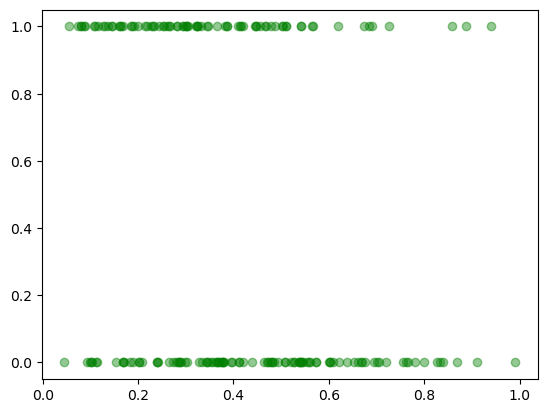

In [8]:
#first, lets check out X and y scatter plot
import matplotlib.pyplot as plt
import pandas as pd

print(X[:180,0].shape,y.shape)

# this plot shows all the 100 people that are affected and 
#80 people that are did not affect pain
plt.scatter(X[:180,0],y,color = 'green',alpha = 0.42)


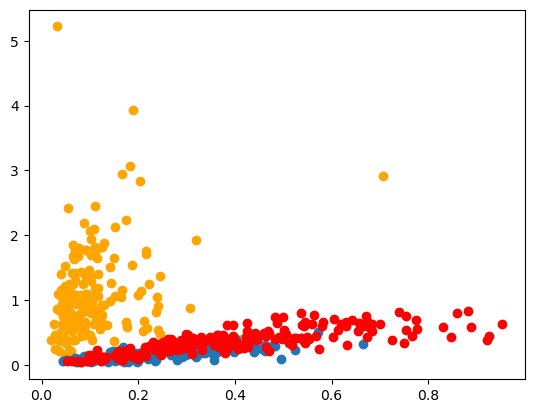

In [13]:
# plotting diff features, to see how closely related they to one another in 2d
plt.scatter(m[100],m[400],color='orange')
plt.scatter(m[200],m[50])
plt.scatter(m[1],m[45],color='red')
#plt.scatter(m[420],m[431],color='pink')
#plt.scatter(m[300],m[347],color='green')

# Mutual entropy gain with SVM

In this section we applied feature selection with mutual information classification. With each feature we calculated a MI score for each feature and only select the 30% percentile.  

In [69]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import VarianceThreshold,mutual_info_classif
from sklearn.feature_selection import SelectKBest,SelectPercentile


In [30]:
#Import libraries
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
import seaborn as sns

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectPercentile
from sklearn.model_selection import GridSearchCV

from datetime import datetime
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
import warnings

warnings.filterwarnings('ignore')

Confusion Matrix:
[[7 3]
 [0 0]]
sensitivity: nan
Specificity: 0.7


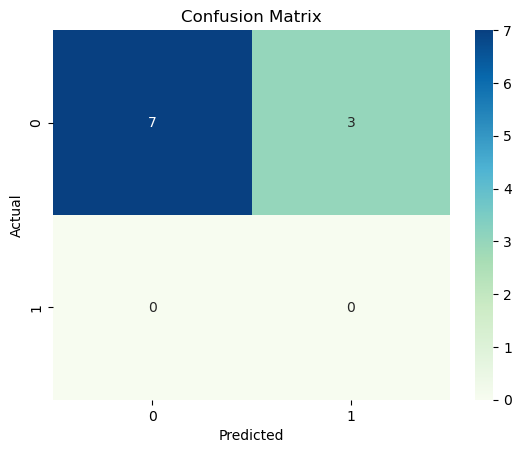

no. of iteration 10 Duration: 0:00:02.605208
Confusion Matrix:
[[10  0]
 [ 0  0]]
sensitivity: nan
Specificity: 1.0


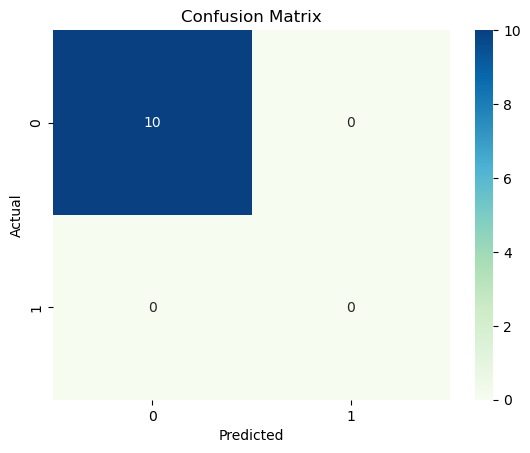

no. of iteration 20 Duration: 0:00:02.682999
Confusion Matrix:
[[10  0]
 [ 0  0]]
sensitivity: nan
Specificity: 1.0


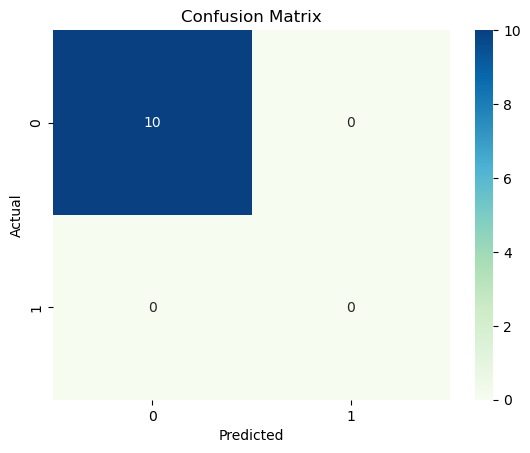

no. of iteration 30 Duration: 0:00:02.737841
Confusion Matrix:
[[8 2]
 [0 0]]
sensitivity: nan
Specificity: 0.8


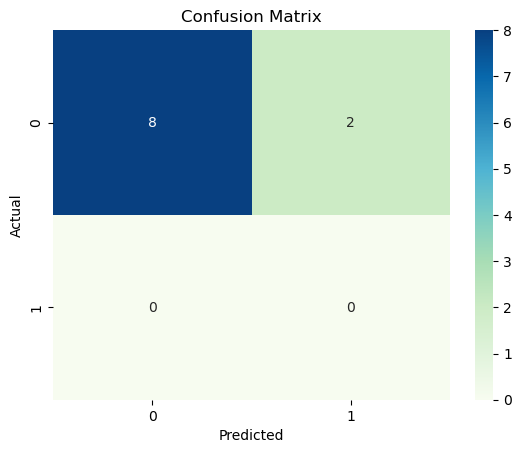

no. of iteration 40 Duration: 0:00:02.315781
Confusion Matrix:
[[9 1]
 [0 0]]
sensitivity: nan
Specificity: 0.9


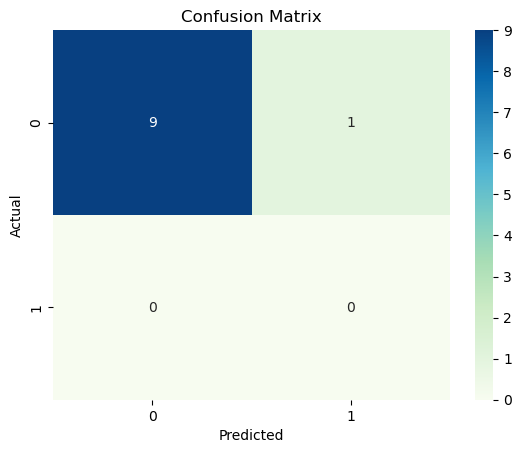

no. of iteration 50 Duration: 0:00:02.208014
Confusion Matrix:
[[9 1]
 [0 0]]
sensitivity: nan
Specificity: 0.9


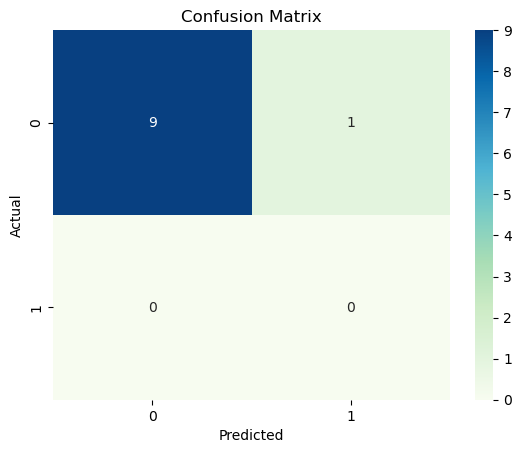

no. of iteration 60 Duration: 0:00:02.267326
Confusion Matrix:
[[8 2]
 [0 0]]
sensitivity: nan
Specificity: 0.8


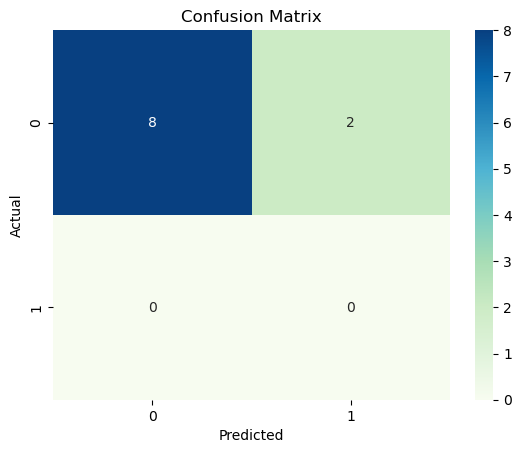

no. of iteration 70 Duration: 0:00:02.389769
Confusion Matrix:
[[8 2]
 [0 0]]
sensitivity: nan
Specificity: 0.8


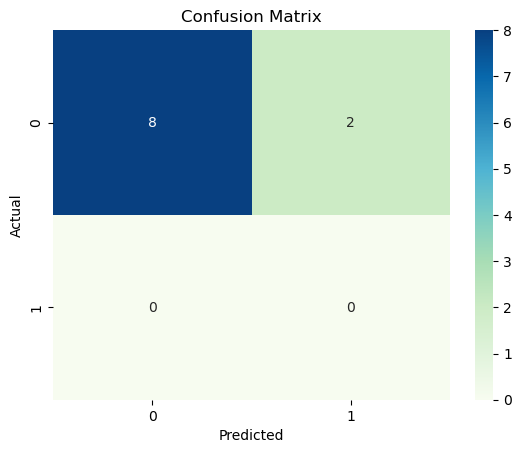

no. of iteration 80 Duration: 0:00:02.780385
Confusion Matrix:
[[10  0]
 [ 0  0]]
sensitivity: nan
Specificity: 1.0


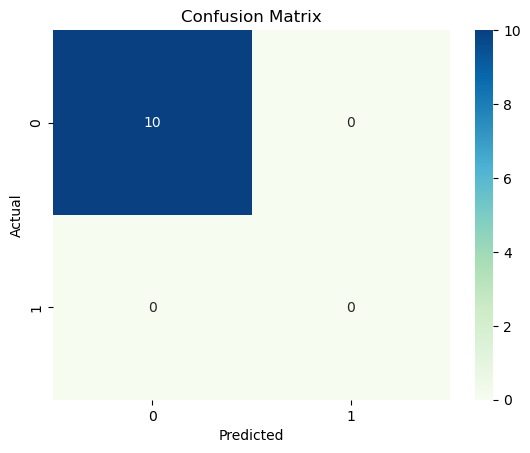

no. of iteration 90 Duration: 0:00:02.265329
Confusion Matrix:
[[9 1]
 [0 0]]
sensitivity: nan
Specificity: 0.9


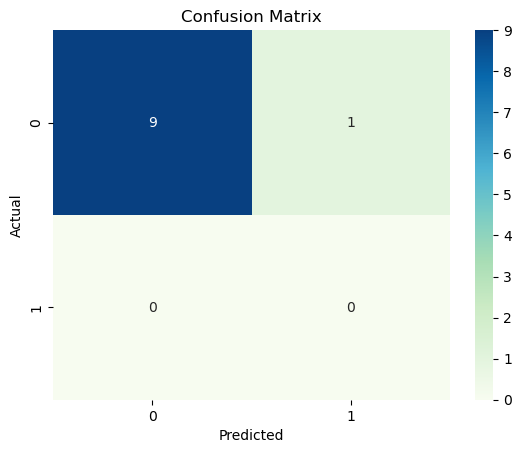

no. of iteration 100 Duration: 0:00:02.525023
Confusion Matrix:
[[ 0  0]
 [ 0 10]]
sensitivity: 1.0
Specificity: nan


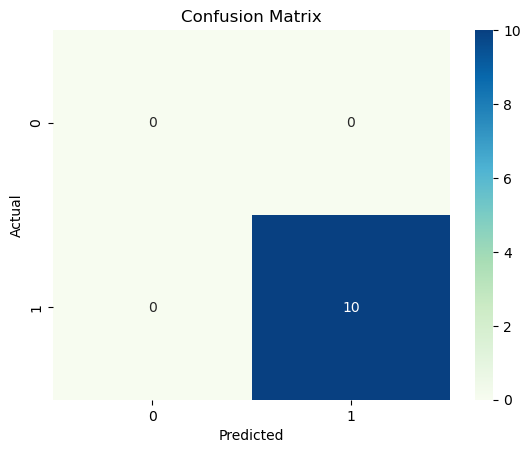

no. of iteration 110 Duration: 0:00:02.493234
Confusion Matrix:
[[0 0]
 [1 9]]
sensitivity: 0.9
Specificity: nan


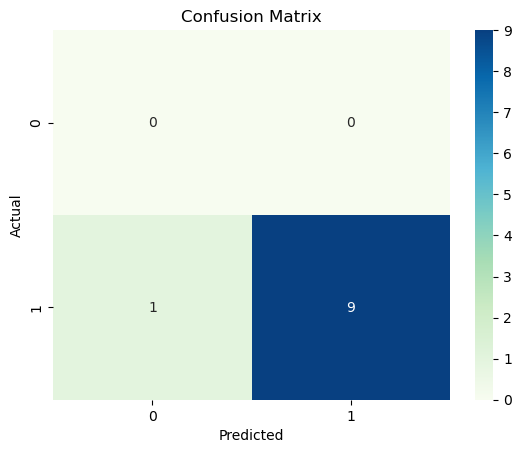

no. of iteration 120 Duration: 0:00:02.490965
Confusion Matrix:
[[0 0]
 [3 7]]
sensitivity: 0.7
Specificity: nan


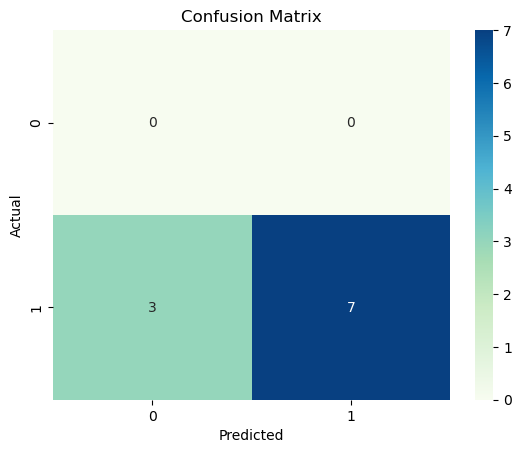

no. of iteration 130 Duration: 0:00:02.748895
Confusion Matrix:
[[0 0]
 [1 9]]
sensitivity: 0.9
Specificity: nan


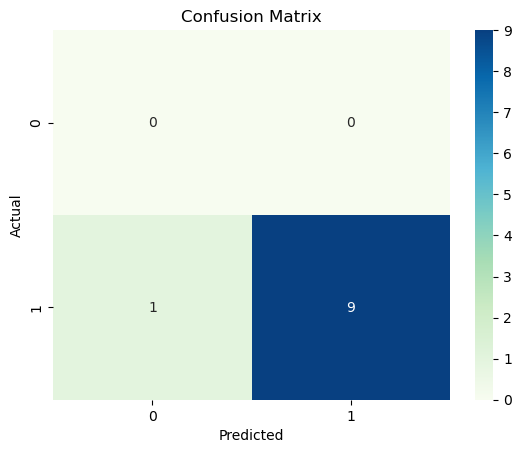

no. of iteration 140 Duration: 0:00:02.857297
Confusion Matrix:
[[ 0  0]
 [ 0 10]]
sensitivity: 1.0
Specificity: nan


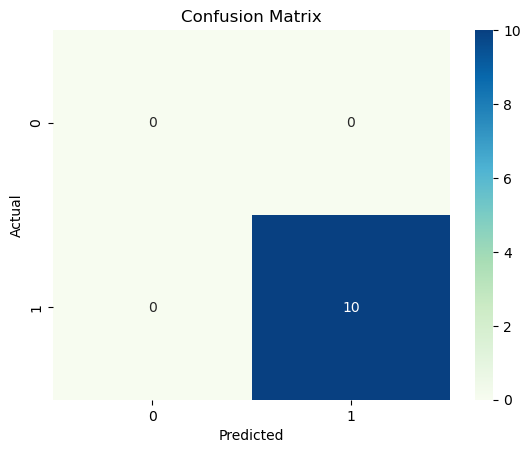

no. of iteration 150 Duration: 0:00:02.634132
Confusion Matrix:
[[0 0]
 [4 6]]
sensitivity: 0.6
Specificity: nan


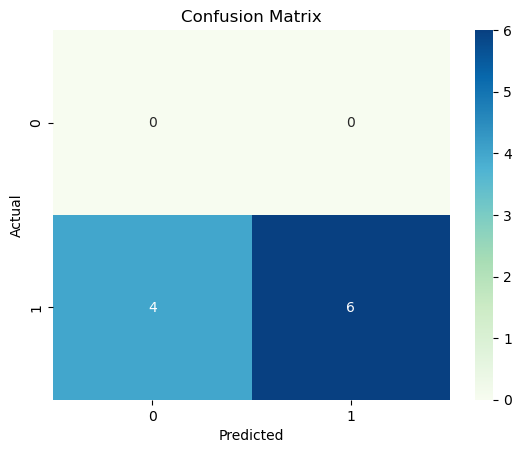

no. of iteration 160 Duration: 0:00:02.550824
Confusion Matrix:
[[ 0  0]
 [ 0 10]]
sensitivity: 1.0
Specificity: nan


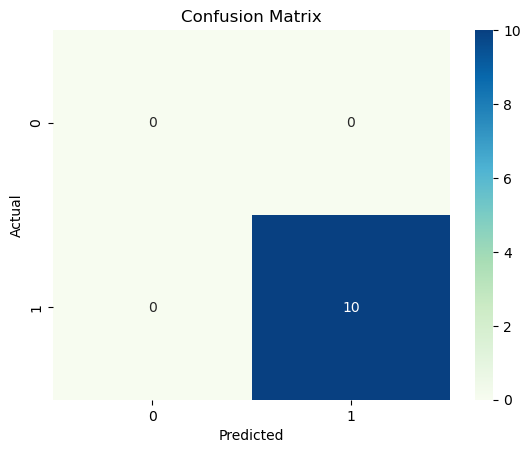

no. of iteration 170 Duration: 0:00:02.587812
Confusion Matrix:
[[ 0  0]
 [ 0 10]]
sensitivity: 1.0
Specificity: nan


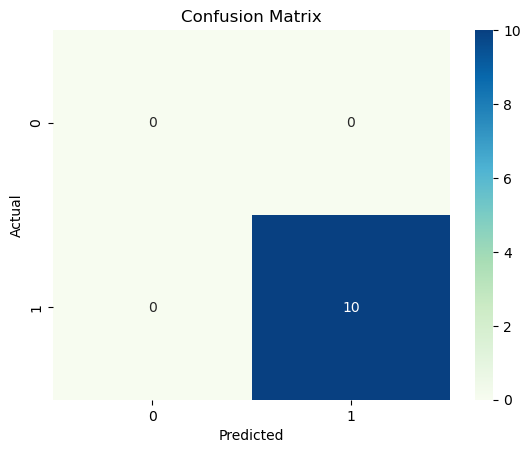

no. of iteration 180 Duration: 0:00:02.457494


<AxesSubplot:>

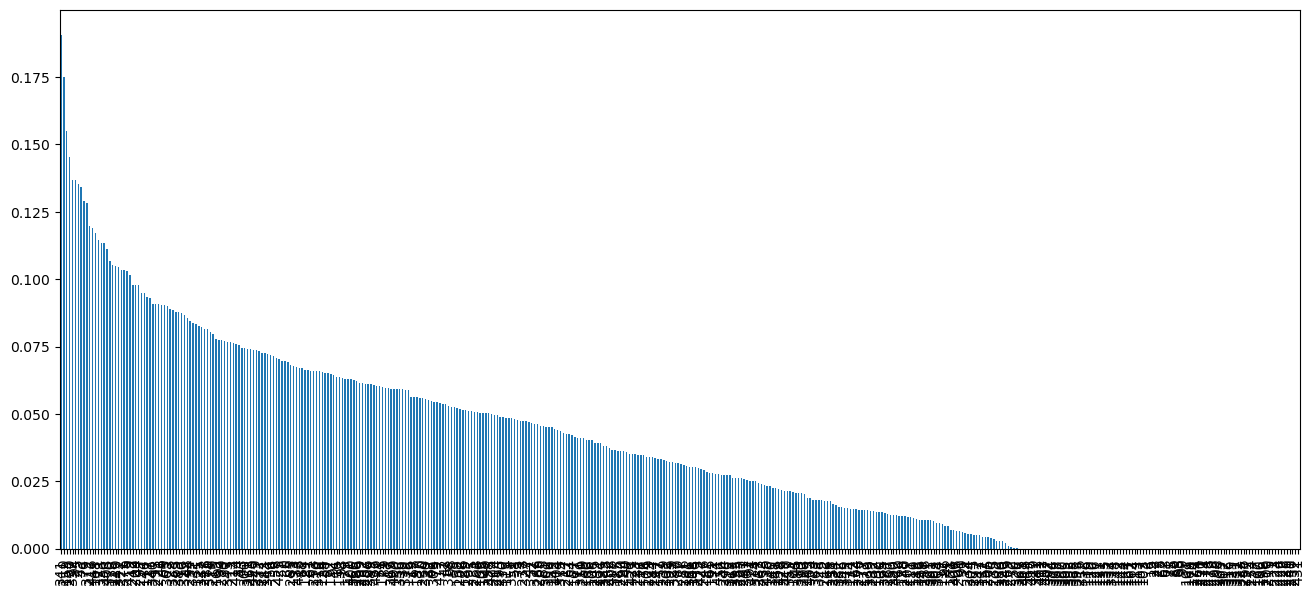

In [76]:
#This block of code reduces the number of features with the MI score and test it with a SVM model. The accuracy, 
# specificity and sensitivity are saved and compared. 

#Performance metric saved in array
svm_accuracy_score = []
svm_specificity = []
svm_sensitivity = []

#This function run the SVM model with new reduced feature sets.
#The performance metric shown above is recorded and printed and put in the report. 
#We will use these performance metric to compare feature engineering method. 
def run_svm(X_tr,X_te,y_tr,y_te):
        global svm_accuracy_score, svm_specificity,svm_sensitivity, start_time
        start_time = datetime.now()
        #SVM hyperparameter to be tested define here:
        param_grid = {'C':[0.1,1,100,1000],'kernel':['linear','rbf','poly','sigmoid'],
              'degree':[1,2,3,4,5,6]}
        
        #Train hyperparameter
        grid = GridSearchCV(SVC(),param_grid)
        
        #Fit model
        grid.fit(X_tr,y_tr.values.ravel())
        y_pred = grid.predict(X_te)
        
        #Calculate confusion matrix. 
        svm_accuracy_score.append(accuracy_score(y_te,y_pred))
        conf_matrix=confusion_matrix(y_te,y_pred,labels=[0,1])
        recall=recall_score(y_te,y_pred)
        precision=precision_score(y_te,y_pred)
        sensitivity = conf_matrix[1,1]/(conf_matrix[1,0]+conf_matrix[1,1])
        specificity = conf_matrix[0,0]/(conf_matrix[0,0]+conf_matrix[0,1])
        
        #Save values in array
        svm_specificity.append(specificity)
        svm_sensitivity.append(sensitivity)
        print("Confusion Matrix:")
        print(conf_matrix)
        print("sensitivity:", sensitivity)
        print("Specificity:", specificity)
        
        #Plot confusion matrix
        sns.heatmap(conf_matrix,cmap="GnBu",annot=True,
        #cbar_kws={"orientation":"vertical","label":"color bar"},
        xticklabels=[0,1],yticklabels=[0,1])
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.title("Confusion Matrix")
        plt.show()

      

#Select features in the 30% percentile
percentiles = 30

#For loop used to apply CV with feature engineering. Score of each CV test are recorded in an array. 
for i in range(0,X.shape[0],10):  
        #For loop applied to allow for CV
        x_test_forcv = X[i:i+10]
        y_test_forcv = y[i:i+10]
        x_train_forcv = np.concatenate((X[:i],X[i+10:]),axis=0)
        y_train_forcv = np.concatenate((y[:i],y[i+10:]),axis=0)
        #Converting numpy to pandasdataframes
        X_train = pd.DataFrame(x_train_forcv)
        X_test = pd.DataFrame(x_test_forcv)
        y_test = pd.DataFrame(y_test_forcv)
        y_train = pd.DataFrame(y_train_forcv)
        #print(i,X_train.shape,y_train_forcv.shape,X_test.shape,y_test_forcv.shape)
        mi_score= mutual_info_classif(x_train_forcv,y_train_forcv)
        mi_score = pd.Series(mi_score)
        mi_score.sort_values(ascending=False,inplace=True)
       
        #Feature reduced with MI score
        sel = SelectPercentile(mutual_info_classif,percentile=percentiles).fit(X_train,y_train.values.ravel())
        X_train.columns[sel.get_support()]# extracting selected feature columns
        X_train_mi_personiout = sel.transform(X_train)
        X_test_mi_personiout = sel.transform(X_test)
        
        #Run SVM with new reduced feature set
        run_svm(X_train_mi_personiout,X_test_mi_personiout,y_train,y_test) 
        end_time = datetime.now()
        print('no. of iteration',i+10,'Duration: {}'.format(end_time - start_time))


#plot for last case only
mi_score.plot.bar(figsize = (16,7))




### The mean accuracy, standard deviation, average specificity and sensivity are printed below

In [77]:
print(np.mean(svm_accuracy_score))

0.8833333333333333


In [78]:
print(np.std(svm_accuracy_score))

0.12133516482134198


In [88]:
#Note: NaN values ignored
print(np.nanmean(svm_specificity))

0.8800000000000001


In [89]:
#Note: NaN values ignored
print(np.nanmean(svm_sensitivity))

0.8875


# Mutual entropy gain with Logistic regression 

Same as previously but we are applying the feature engineering to a logistic regression model. 

In [91]:
#Import libraries. Run if not ran already. 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import VarianceThreshold,mutual_info_classif
from sklearn.feature_selection import f_regression, mutual_info_regression
from sklearn.feature_selection import SelectKBest,SelectPercentile
from sklearn.feature_selection import SelectPercentile
from sklearn.model_selection import GridSearchCV
from datetime import datetime
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Confusion Matrix:
[[8 2]
 [0 0]]
sensitivity: nan
Specificity: 0.8


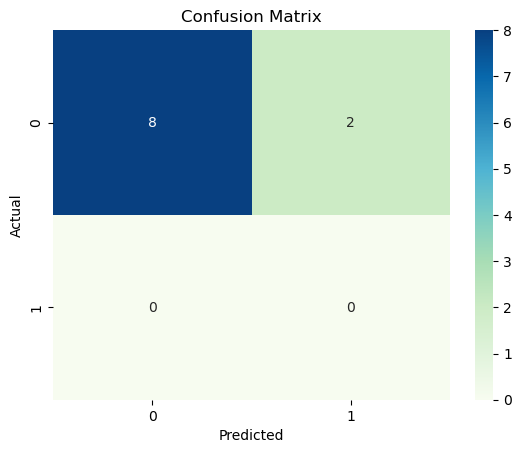

no. of iteration 10 Duration: 0:00:06.458945
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Confusion Matrix:
[[9 1]
 [0 0]]
sensitivity: nan
Specificity: 0.9


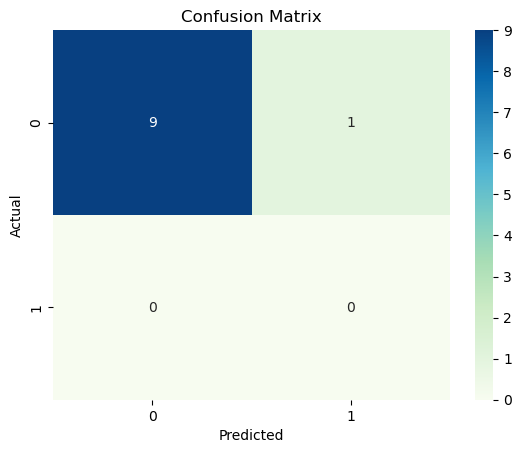

no. of iteration 20 Duration: 0:00:09.611133
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Confusion Matrix:
[[8 2]
 [0 0]]
sensitivity: nan
Specificity: 0.8


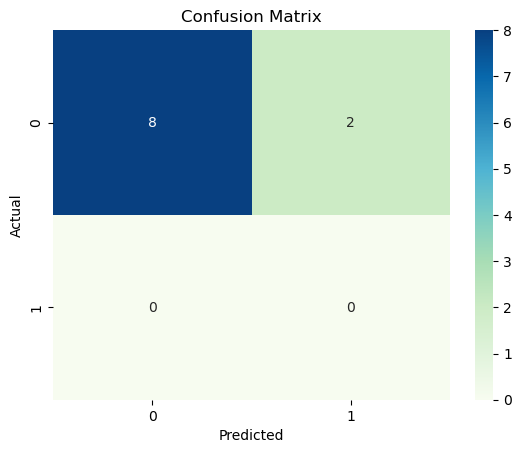

no. of iteration 30 Duration: 0:00:13.316904
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Confusion Matrix:
[[8 2]
 [0 0]]
sensitivity: nan
Specificity: 0.8


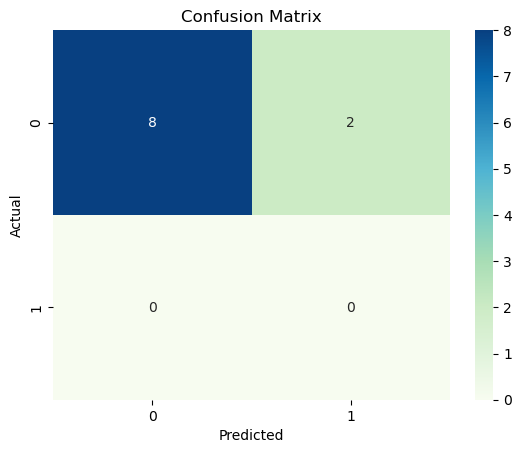

no. of iteration 40 Duration: 0:00:16.787121
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Confusion Matrix:
[[7 3]
 [0 0]]
sensitivity: nan
Specificity: 0.7


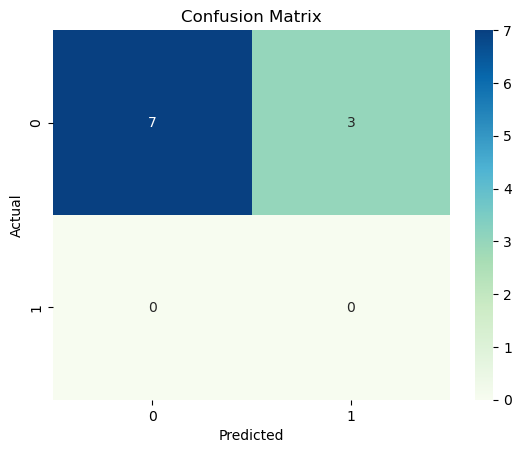

no. of iteration 50 Duration: 0:00:20.106058
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Confusion Matrix:
[[8 2]
 [0 0]]
sensitivity: nan
Specificity: 0.8


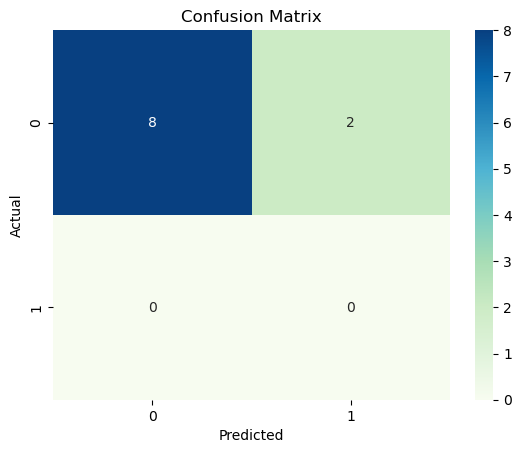

no. of iteration 60 Duration: 0:00:23.463193
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Confusion Matrix:
[[8 2]
 [0 0]]
sensitivity: nan
Specificity: 0.8


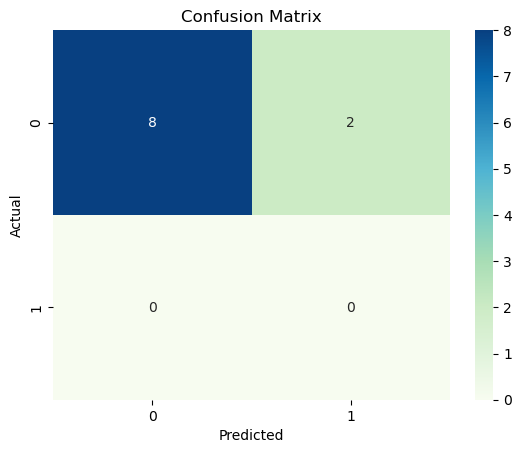

no. of iteration 70 Duration: 0:00:27.104651
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Confusion Matrix:
[[7 3]
 [0 0]]
sensitivity: nan
Specificity: 0.7


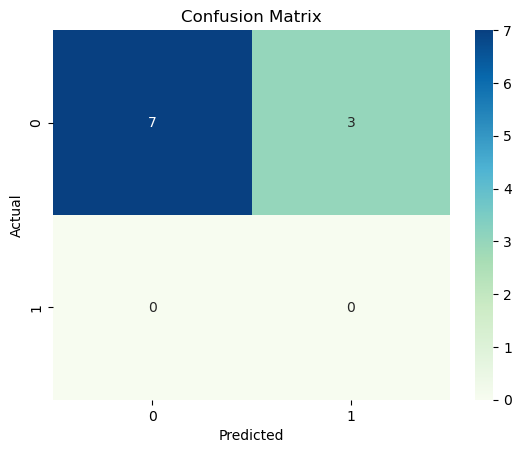

no. of iteration 80 Duration: 0:00:30.341770
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Confusion Matrix:
[[9 1]
 [0 0]]
sensitivity: nan
Specificity: 0.9


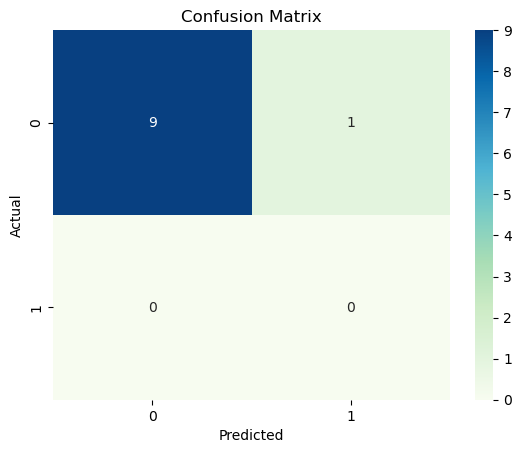

no. of iteration 90 Duration: 0:00:33.406868
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Confusion Matrix:
[[10  0]
 [ 0  0]]
sensitivity: nan
Specificity: 1.0


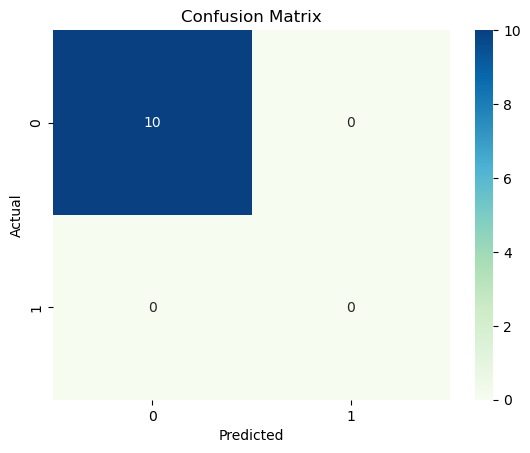

no. of iteration 100 Duration: 0:00:36.471257
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Confusion Matrix:
[[0 0]
 [3 7]]
sensitivity: 0.7
Specificity: nan


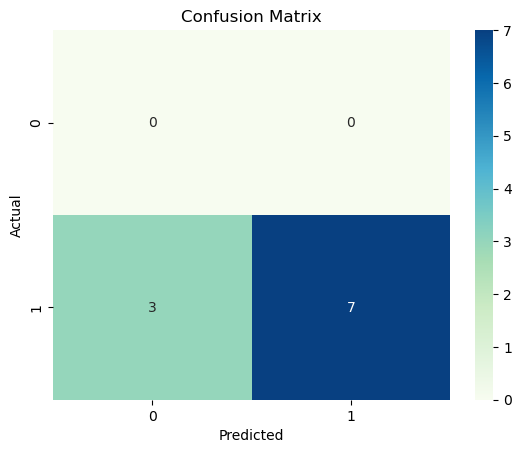

no. of iteration 110 Duration: 0:00:39.919892
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Confusion Matrix:
[[0 0]
 [2 8]]
sensitivity: 0.8
Specificity: nan


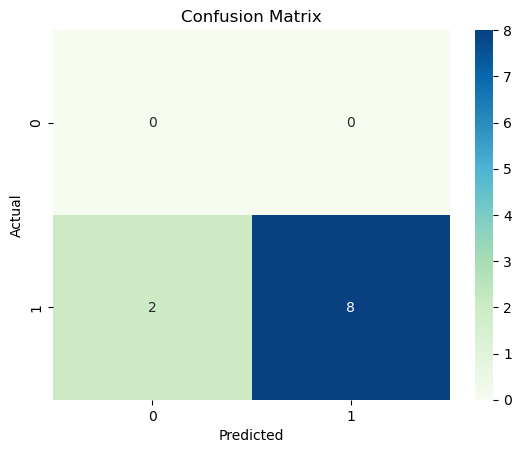

no. of iteration 120 Duration: 0:00:43.222099
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Confusion Matrix:
[[0 0]
 [3 7]]
sensitivity: 0.7
Specificity: nan


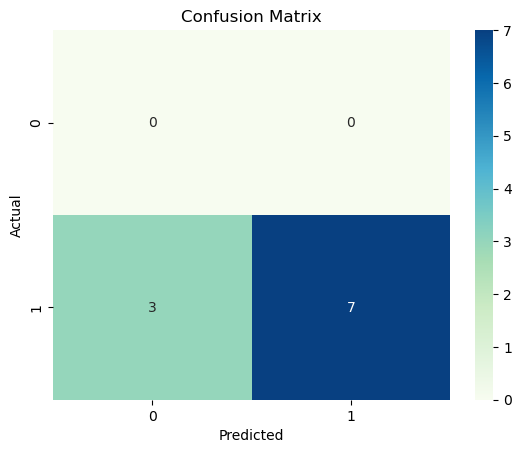

no. of iteration 130 Duration: 0:00:46.279160
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Confusion Matrix:
[[ 0  0]
 [ 0 10]]
sensitivity: 1.0
Specificity: nan


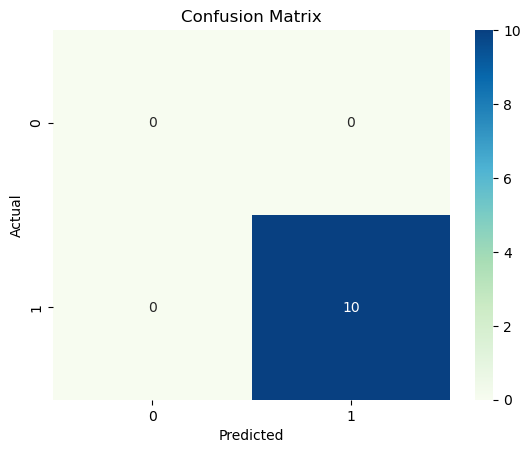

no. of iteration 140 Duration: 0:00:49.510566
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Confusion Matrix:
[[0 0]
 [1 9]]
sensitivity: 0.9
Specificity: nan


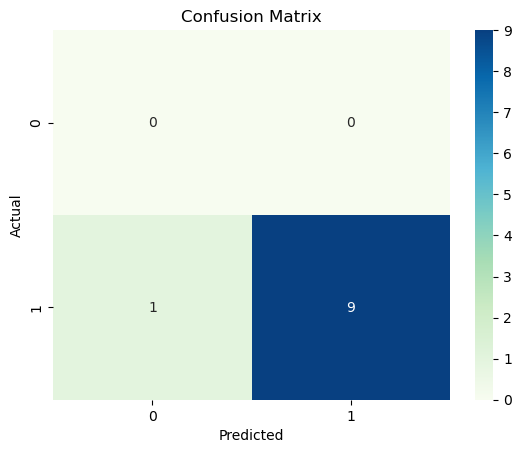

no. of iteration 150 Duration: 0:00:52.923898
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Confusion Matrix:
[[0 0]
 [4 6]]
sensitivity: 0.6
Specificity: nan


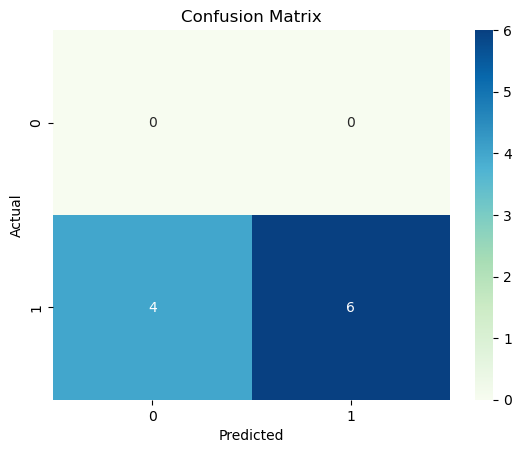

no. of iteration 160 Duration: 0:00:56.308871
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Confusion Matrix:
[[ 0  0]
 [ 0 10]]
sensitivity: 1.0
Specificity: nan


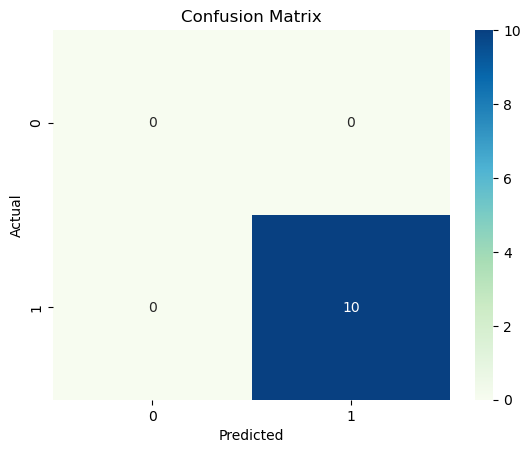

no. of iteration 170 Duration: 0:00:59.784740
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Confusion Matrix:
[[0 0]
 [1 9]]
sensitivity: 0.9
Specificity: nan


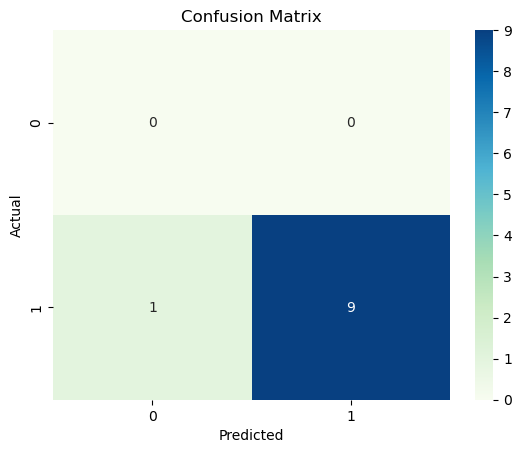

no. of iteration 180 Duration: 0:01:03.339239
Average regression score for the model for considering 5 percentile of the sorted feature set: 0.8222222222222222
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Confusion Matrix:
[[8 2]
 [0 0]]
sensitivity: nan
Specificity: 0.8


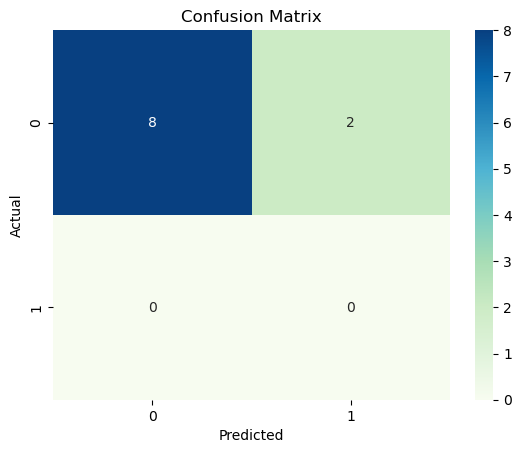

no. of iteration 10 Duration: 0:00:04.625397
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Confusion Matrix:
[[10  0]
 [ 0  0]]
sensitivity: nan
Specificity: 1.0


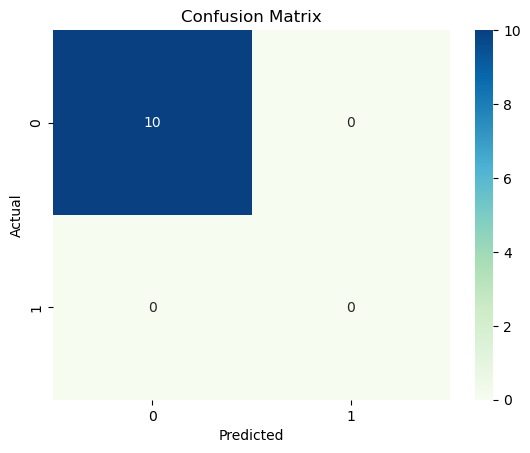

no. of iteration 20 Duration: 0:00:08.953724
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Confusion Matrix:
[[8 2]
 [0 0]]
sensitivity: nan
Specificity: 0.8


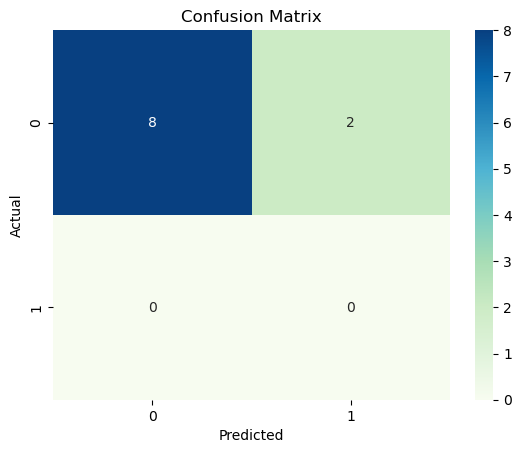

no. of iteration 30 Duration: 0:00:13.884866
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Confusion Matrix:
[[9 1]
 [0 0]]
sensitivity: nan
Specificity: 0.9


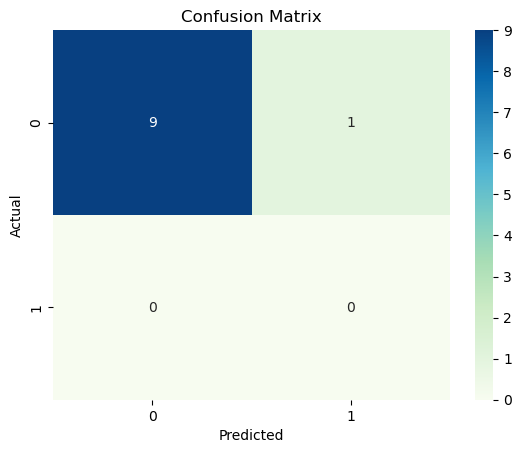

no. of iteration 40 Duration: 0:00:18.325204
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Confusion Matrix:
[[8 2]
 [0 0]]
sensitivity: nan
Specificity: 0.8


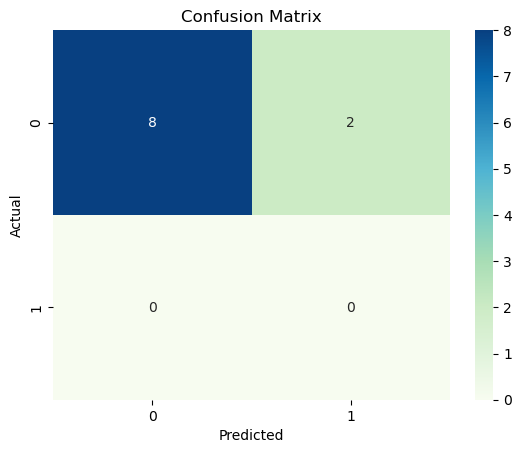

no. of iteration 50 Duration: 0:00:22.671538
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Confusion Matrix:
[[9 1]
 [0 0]]
sensitivity: nan
Specificity: 0.9


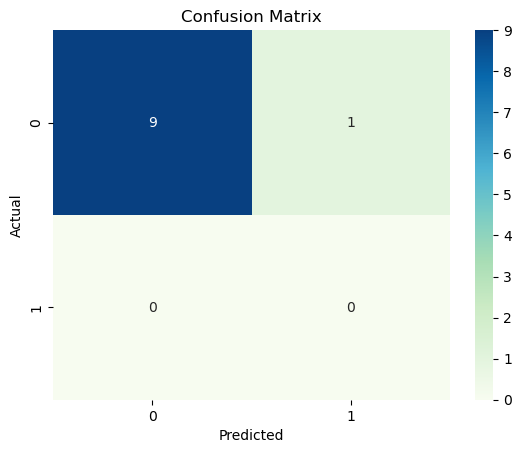

no. of iteration 60 Duration: 0:00:27.517166
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Confusion Matrix:
[[9 1]
 [0 0]]
sensitivity: nan
Specificity: 0.9


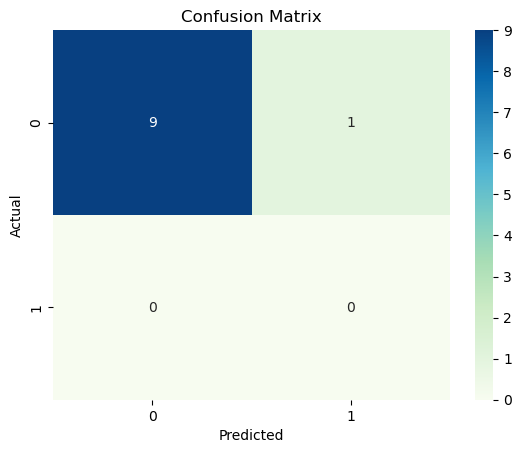

no. of iteration 70 Duration: 0:00:32.345045
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Confusion Matrix:
[[8 2]
 [0 0]]
sensitivity: nan
Specificity: 0.8


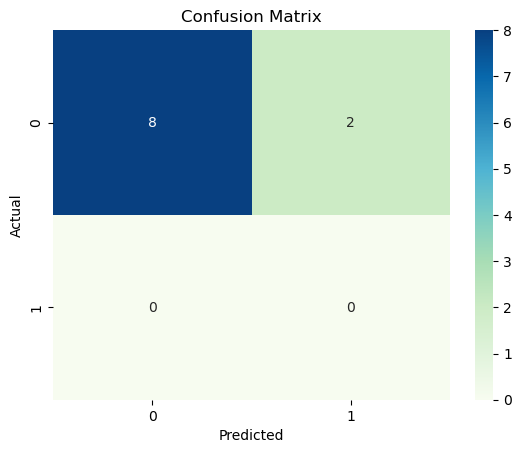

no. of iteration 80 Duration: 0:00:36.688833
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Confusion Matrix:
[[9 1]
 [0 0]]
sensitivity: nan
Specificity: 0.9


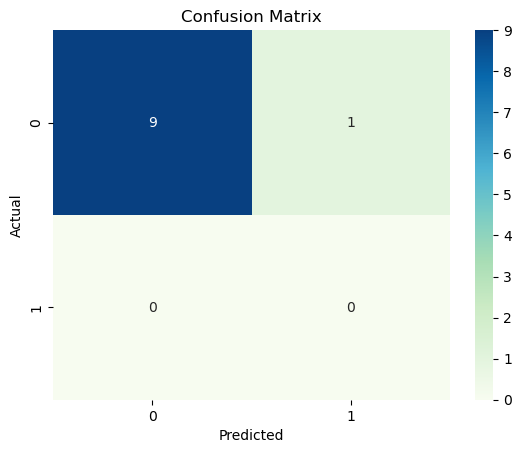

no. of iteration 90 Duration: 0:00:41.413381
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Confusion Matrix:
[[10  0]
 [ 0  0]]
sensitivity: nan
Specificity: 1.0


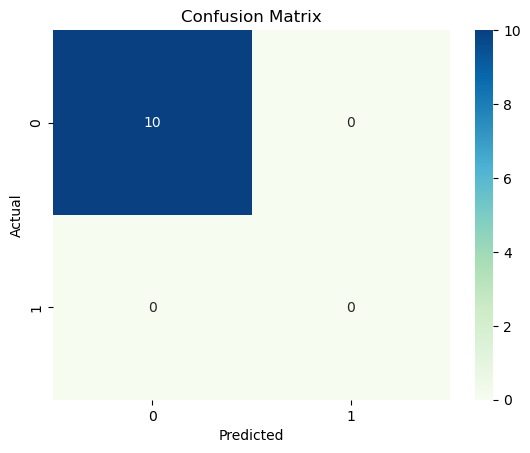

no. of iteration 100 Duration: 0:00:46.082302
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Confusion Matrix:
[[0 0]
 [2 8]]
sensitivity: 0.8
Specificity: nan


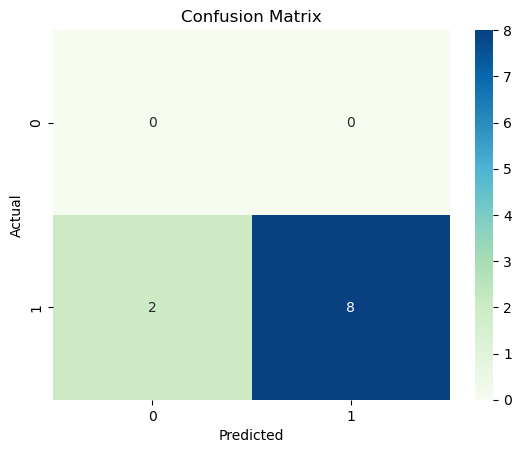

no. of iteration 110 Duration: 0:00:50.363221
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Confusion Matrix:
[[0 0]
 [3 7]]
sensitivity: 0.7
Specificity: nan


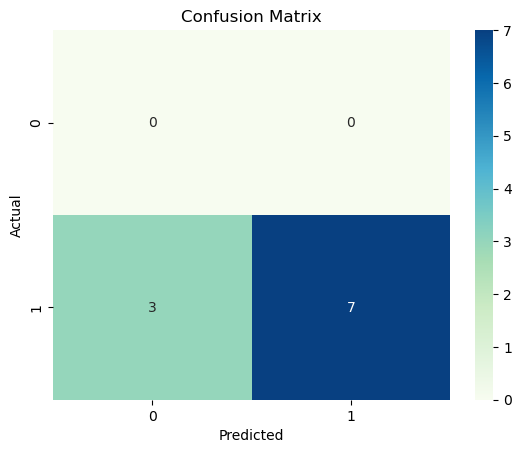

no. of iteration 120 Duration: 0:00:54.840386
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Confusion Matrix:
[[0 0]
 [1 9]]
sensitivity: 0.9
Specificity: nan


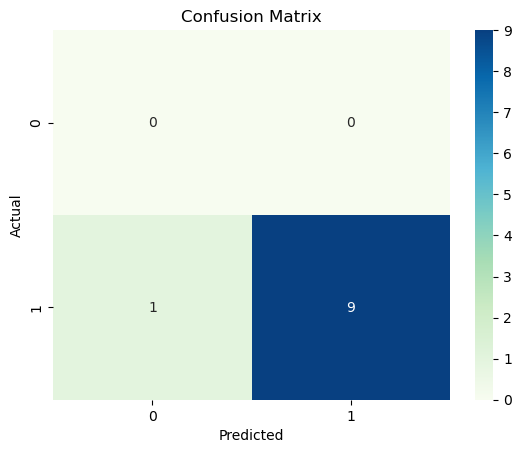

no. of iteration 130 Duration: 0:00:59.679486
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Confusion Matrix:
[[ 0  0]
 [ 0 10]]
sensitivity: 1.0
Specificity: nan


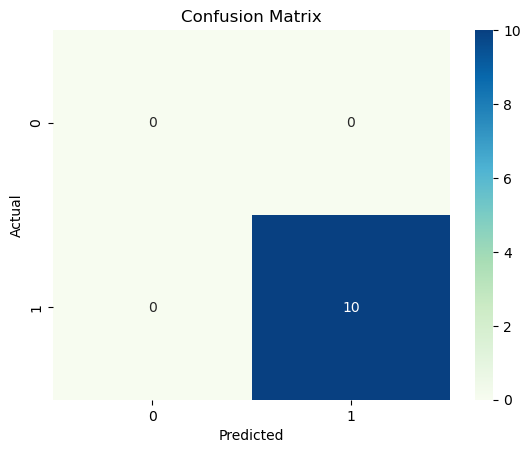

no. of iteration 140 Duration: 0:01:04.169991
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Confusion Matrix:
[[ 0  0]
 [ 0 10]]
sensitivity: 1.0
Specificity: nan


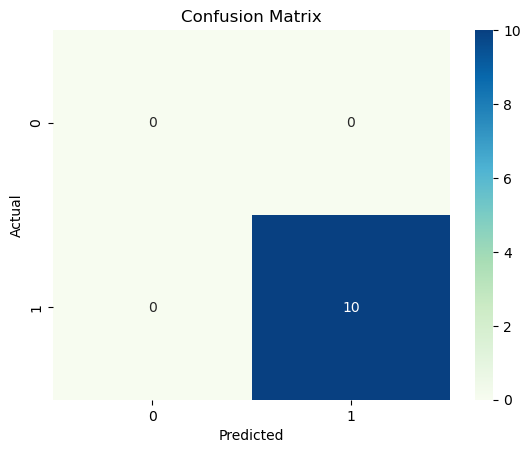

no. of iteration 150 Duration: 0:01:08.426763
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Confusion Matrix:
[[0 0]
 [5 5]]
sensitivity: 0.5
Specificity: nan


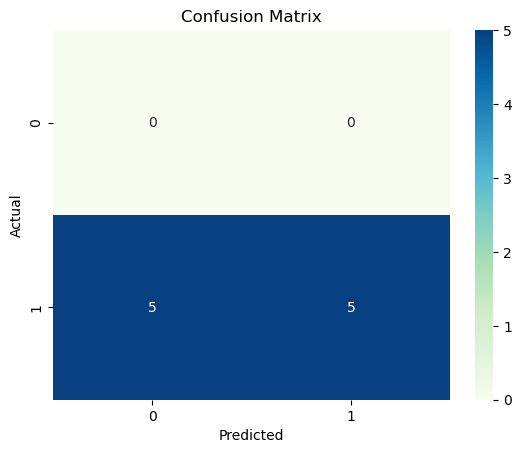

no. of iteration 160 Duration: 0:01:13.080443
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Confusion Matrix:
[[ 0  0]
 [ 0 10]]
sensitivity: 1.0
Specificity: nan


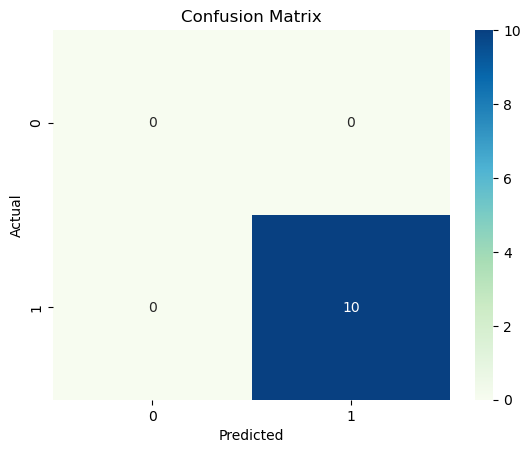

no. of iteration 170 Duration: 0:01:18.084145
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Confusion Matrix:
[[0 0]
 [1 9]]
sensitivity: 0.9
Specificity: nan


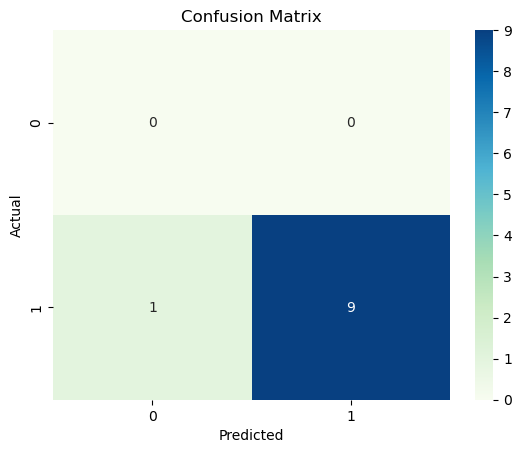

no. of iteration 180 Duration: 0:01:22.626780
Average regression score for the model for considering 10 percentile of the sorted feature set: 0.8666666666666667
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Confusion Matrix:
[[5 5]
 [0 0]]
sensitivity: nan
Specificity: 0.5


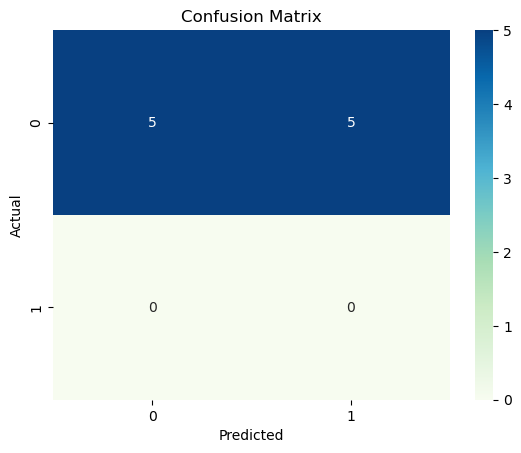

no. of iteration 10 Duration: 0:00:05.380448
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Confusion Matrix:
[[9 1]
 [0 0]]
sensitivity: nan
Specificity: 0.9


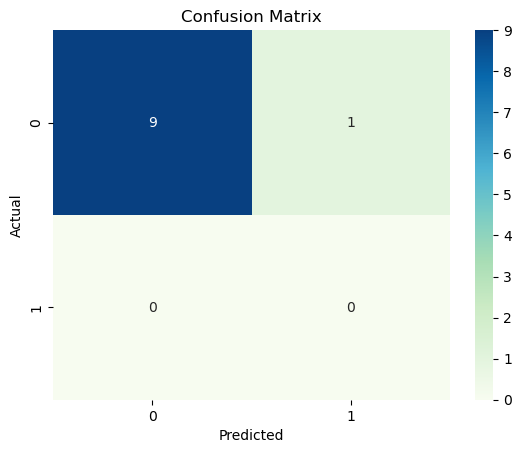

no. of iteration 20 Duration: 0:00:10.898304
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Confusion Matrix:
[[8 2]
 [0 0]]
sensitivity: nan
Specificity: 0.8


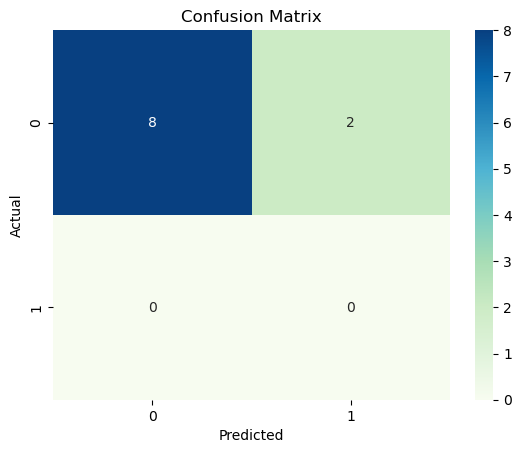

no. of iteration 30 Duration: 0:00:16.279651
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Confusion Matrix:
[[7 3]
 [0 0]]
sensitivity: nan
Specificity: 0.7


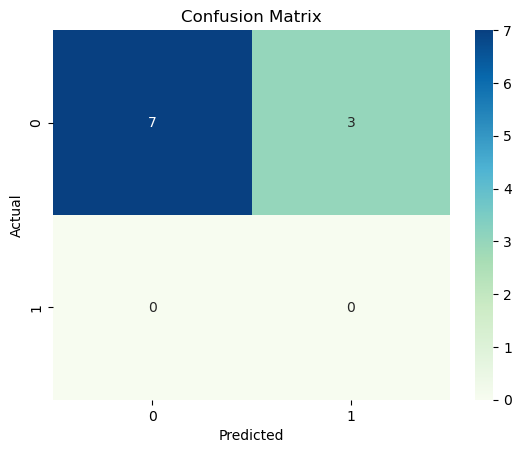

no. of iteration 40 Duration: 0:00:21.502714
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Confusion Matrix:
[[8 2]
 [0 0]]
sensitivity: nan
Specificity: 0.8


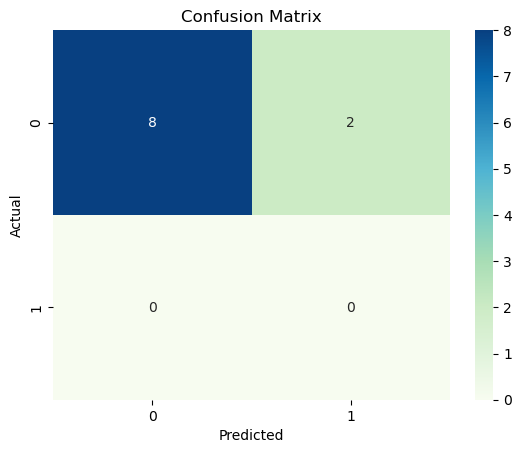

no. of iteration 50 Duration: 0:00:26.865068
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Confusion Matrix:
[[9 1]
 [0 0]]
sensitivity: nan
Specificity: 0.9


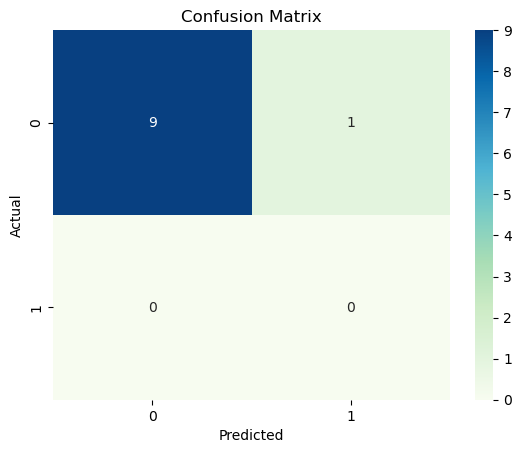

no. of iteration 60 Duration: 0:00:32.324104
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Confusion Matrix:
[[9 1]
 [0 0]]
sensitivity: nan
Specificity: 0.9


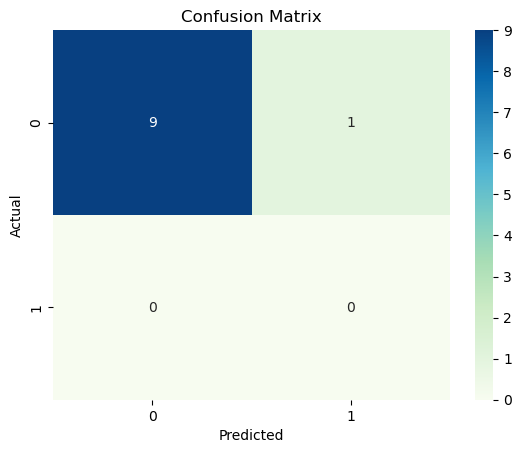

no. of iteration 70 Duration: 0:00:37.710315
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Confusion Matrix:
[[8 2]
 [0 0]]
sensitivity: nan
Specificity: 0.8


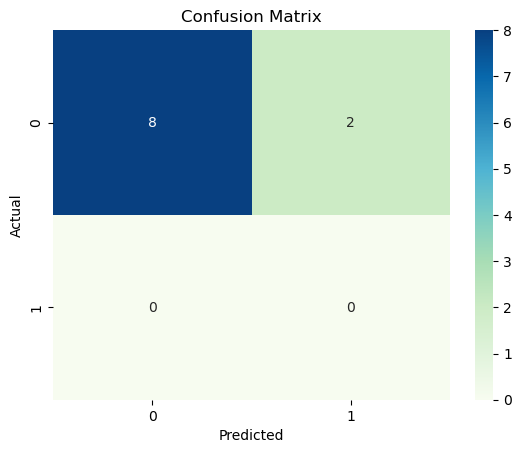

no. of iteration 80 Duration: 0:00:43.355258
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Confusion Matrix:
[[9 1]
 [0 0]]
sensitivity: nan
Specificity: 0.9


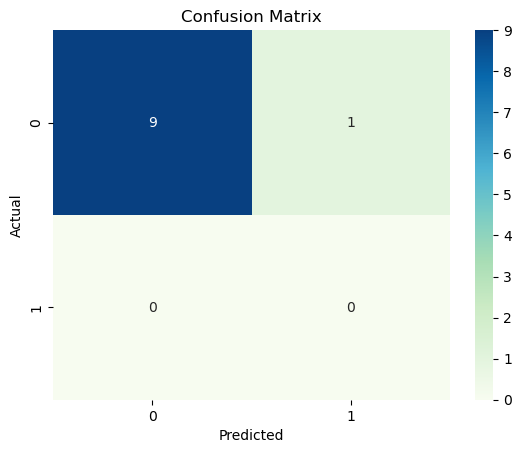

no. of iteration 90 Duration: 0:00:48.714178
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Confusion Matrix:
[[9 1]
 [0 0]]
sensitivity: nan
Specificity: 0.9


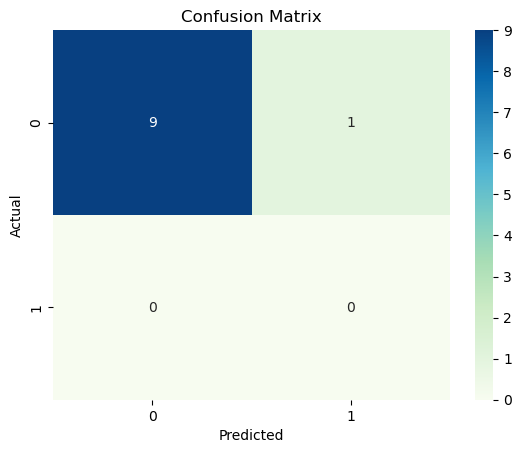

no. of iteration 100 Duration: 0:00:54.002624
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Confusion Matrix:
[[0 0]
 [2 8]]
sensitivity: 0.8
Specificity: nan


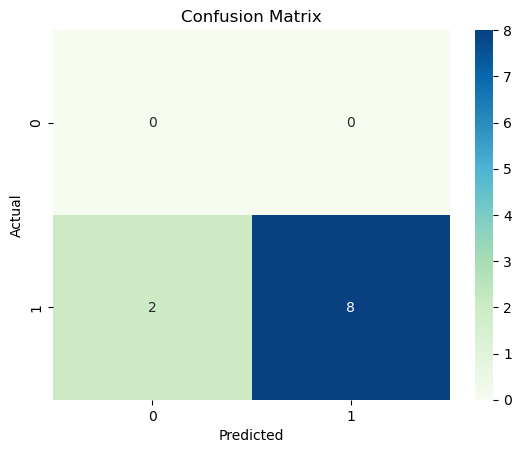

no. of iteration 110 Duration: 0:00:59.535355
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Confusion Matrix:
[[0 0]
 [4 6]]
sensitivity: 0.6
Specificity: nan


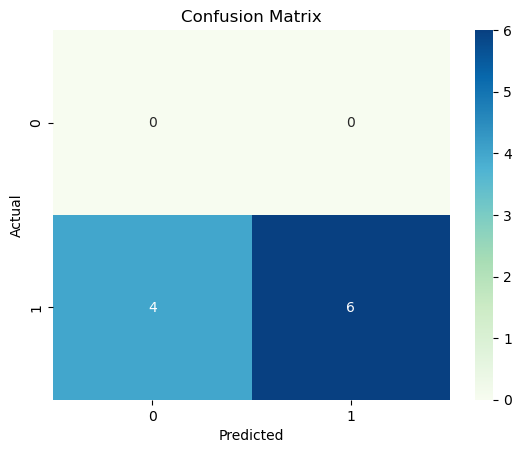

no. of iteration 120 Duration: 0:01:04.745111
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Confusion Matrix:
[[0 0]
 [1 9]]
sensitivity: 0.9
Specificity: nan


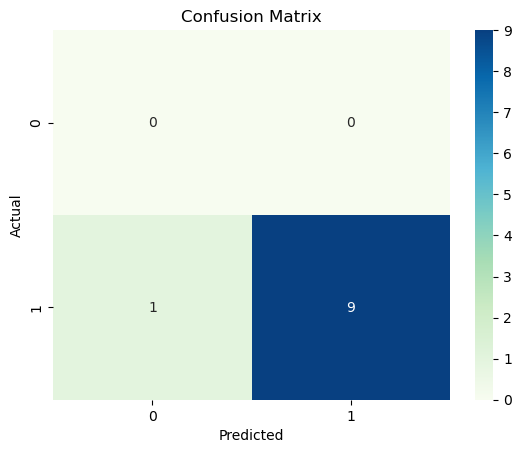

no. of iteration 130 Duration: 0:01:10.522277
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Confusion Matrix:
[[0 0]
 [1 9]]
sensitivity: 0.9
Specificity: nan


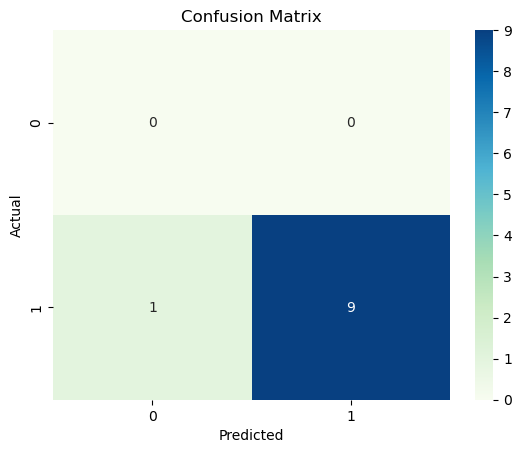

no. of iteration 140 Duration: 0:01:15.866084
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Confusion Matrix:
[[0 0]
 [1 9]]
sensitivity: 0.9
Specificity: nan


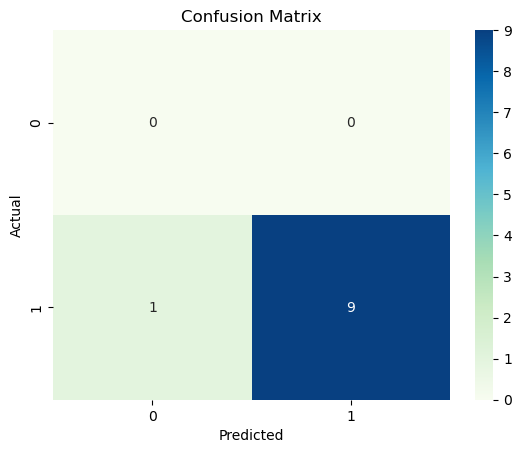

no. of iteration 150 Duration: 0:01:21.459839
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Confusion Matrix:
[[0 0]
 [5 5]]
sensitivity: 0.5
Specificity: nan


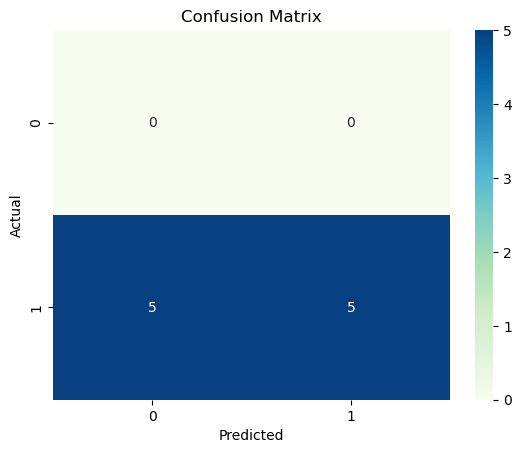

no. of iteration 160 Duration: 0:01:27.229664
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Confusion Matrix:
[[0 0]
 [1 9]]
sensitivity: 0.9
Specificity: nan


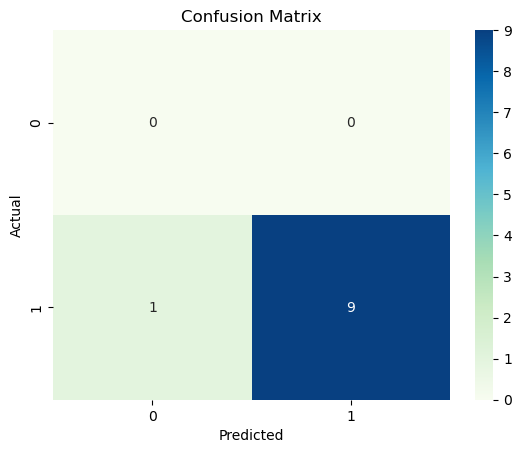

no. of iteration 170 Duration: 0:01:33.198868
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Confusion Matrix:
[[ 0  0]
 [ 0 10]]
sensitivity: 1.0
Specificity: nan


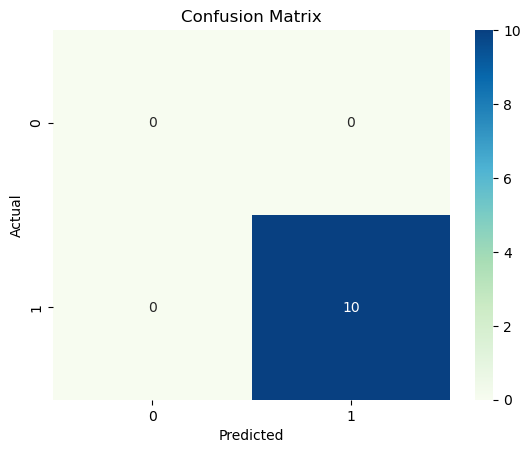

no. of iteration 180 Duration: 0:01:38.798439
Average regression score for the model for considering 15 percentile of the sorted feature set: 0.8111111111111113
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Confusion Matrix:
[[7 3]
 [0 0]]
sensitivity: nan
Specificity: 0.7


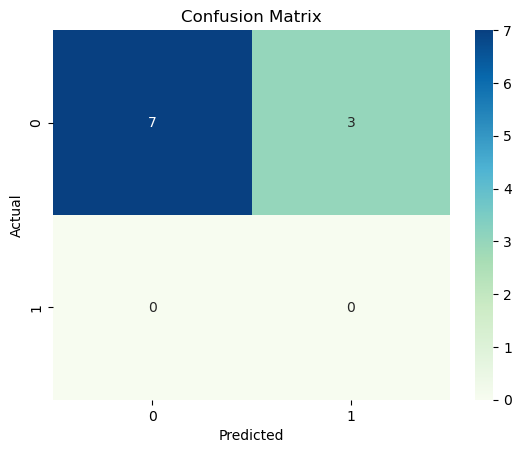

no. of iteration 10 Duration: 0:00:06.510965
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Confusion Matrix:
[[10  0]
 [ 0  0]]
sensitivity: nan
Specificity: 1.0


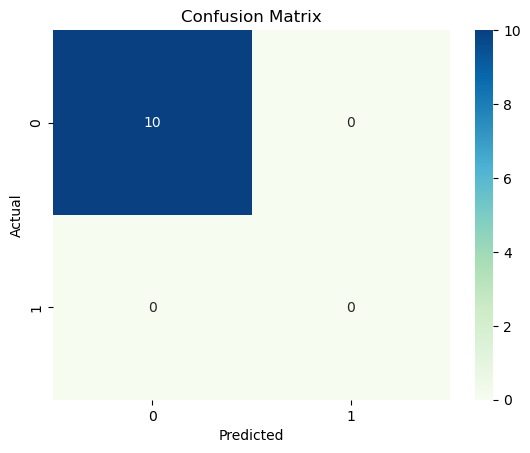

no. of iteration 20 Duration: 0:00:13.085692
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Confusion Matrix:
[[10  0]
 [ 0  0]]
sensitivity: nan
Specificity: 1.0


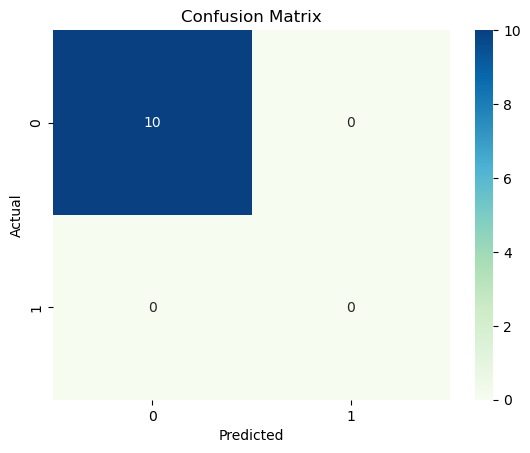

no. of iteration 30 Duration: 0:00:19.735242
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Confusion Matrix:
[[9 1]
 [0 0]]
sensitivity: nan
Specificity: 0.9


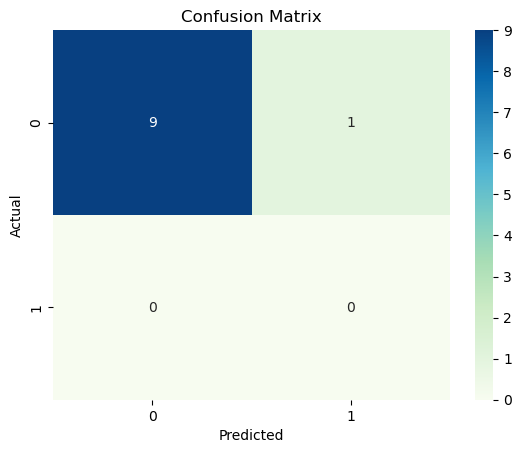

no. of iteration 40 Duration: 0:00:26.609844
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Confusion Matrix:
[[9 1]
 [0 0]]
sensitivity: nan
Specificity: 0.9


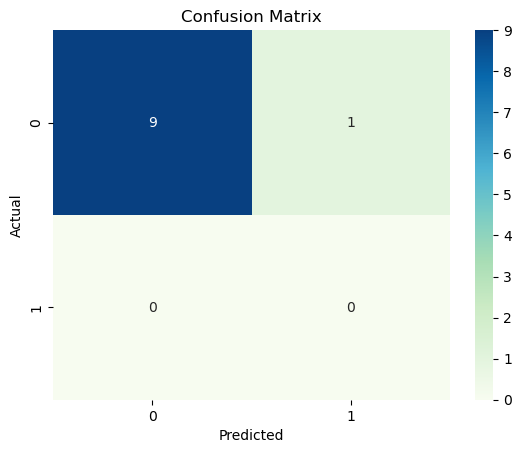

no. of iteration 50 Duration: 0:00:33.395706
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Confusion Matrix:
[[9 1]
 [0 0]]
sensitivity: nan
Specificity: 0.9


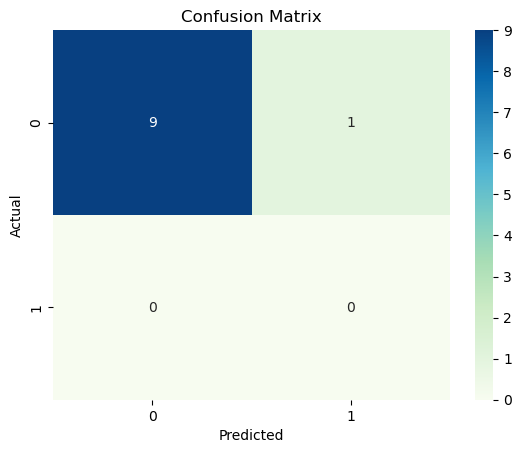

no. of iteration 60 Duration: 0:00:40.032440
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Confusion Matrix:
[[9 1]
 [0 0]]
sensitivity: nan
Specificity: 0.9


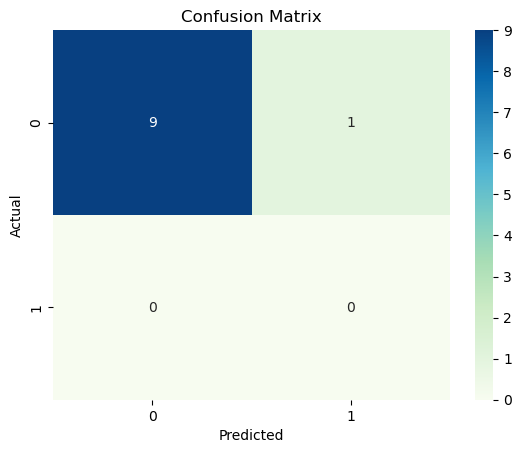

no. of iteration 70 Duration: 0:00:46.776379
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Confusion Matrix:
[[9 1]
 [0 0]]
sensitivity: nan
Specificity: 0.9


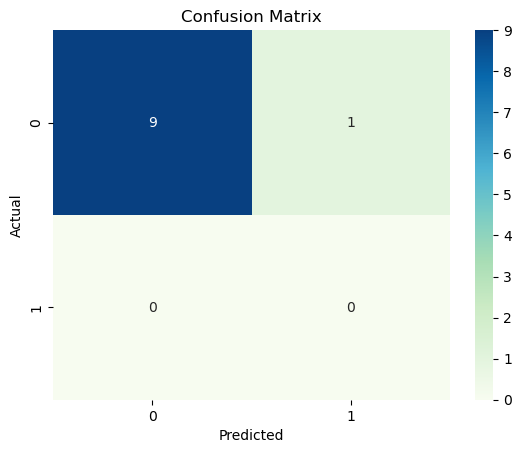

no. of iteration 80 Duration: 0:00:53.527916
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Confusion Matrix:
[[10  0]
 [ 0  0]]
sensitivity: nan
Specificity: 1.0


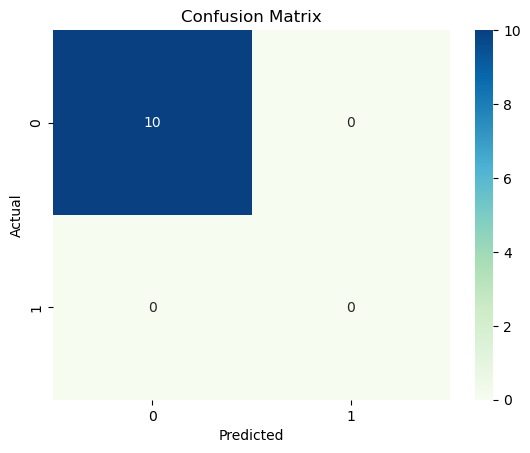

no. of iteration 90 Duration: 0:01:00.199010
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Confusion Matrix:
[[9 1]
 [0 0]]
sensitivity: nan
Specificity: 0.9


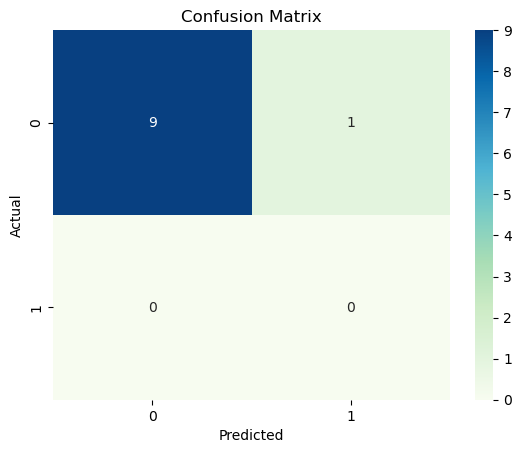

no. of iteration 100 Duration: 0:01:07.147823
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Confusion Matrix:
[[0 0]
 [1 9]]
sensitivity: 0.9
Specificity: nan


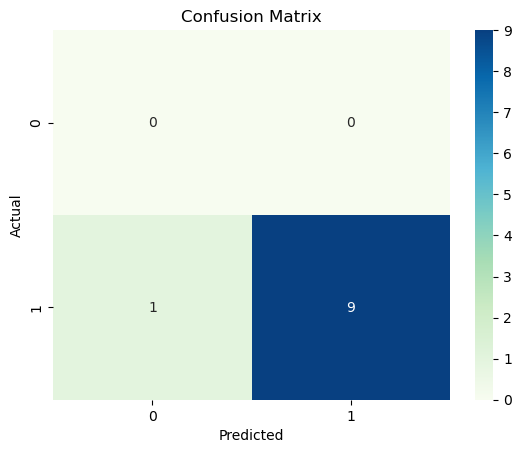

no. of iteration 110 Duration: 0:01:14.487799
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Confusion Matrix:
[[0 0]
 [3 7]]
sensitivity: 0.7
Specificity: nan


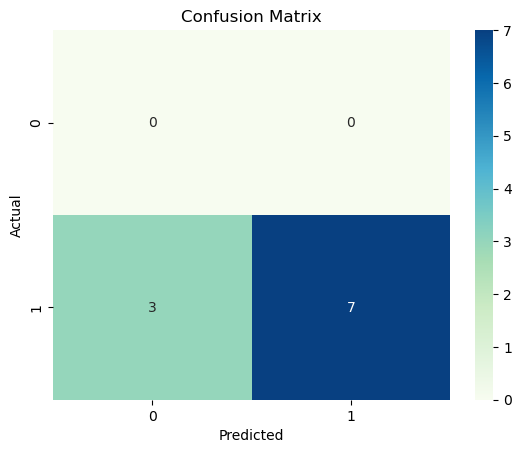

no. of iteration 120 Duration: 0:01:21.016748
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Confusion Matrix:
[[0 0]
 [1 9]]
sensitivity: 0.9
Specificity: nan


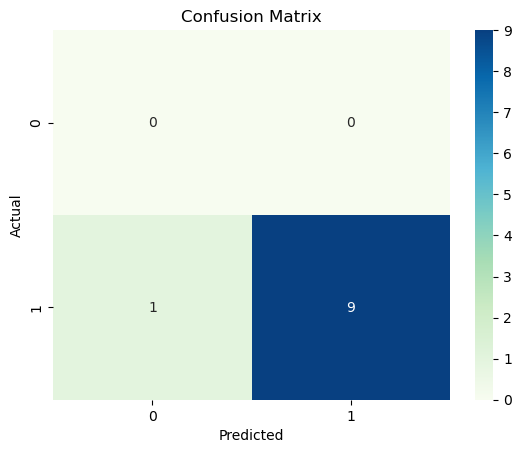

no. of iteration 130 Duration: 0:01:28.319445
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Confusion Matrix:
[[ 0  0]
 [ 0 10]]
sensitivity: 1.0
Specificity: nan


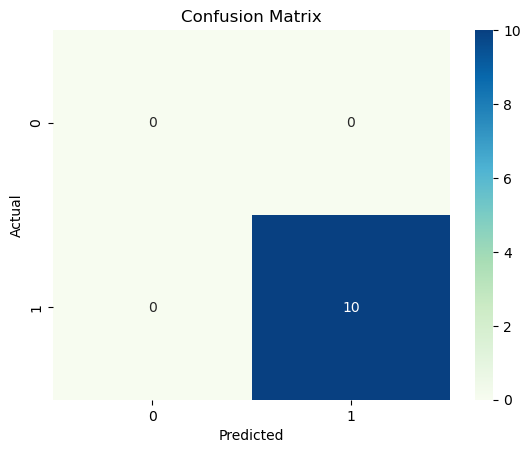

no. of iteration 140 Duration: 0:01:35.175873
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Confusion Matrix:
[[0 0]
 [1 9]]
sensitivity: 0.9
Specificity: nan


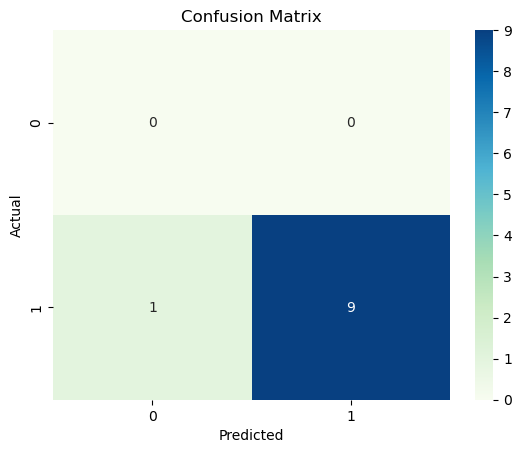

no. of iteration 150 Duration: 0:01:41.897714
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Confusion Matrix:
[[0 0]
 [4 6]]
sensitivity: 0.6
Specificity: nan


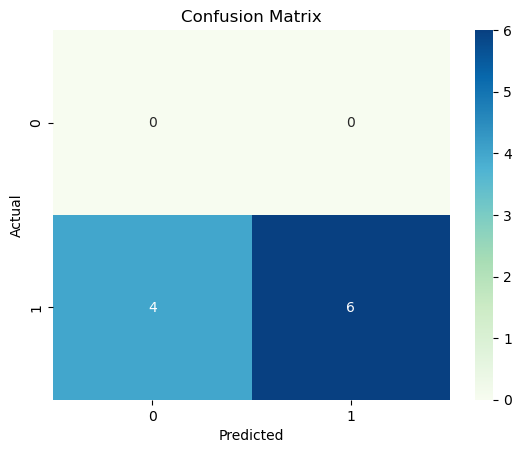

no. of iteration 160 Duration: 0:01:49.134319
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Confusion Matrix:
[[0 0]
 [1 9]]
sensitivity: 0.9
Specificity: nan


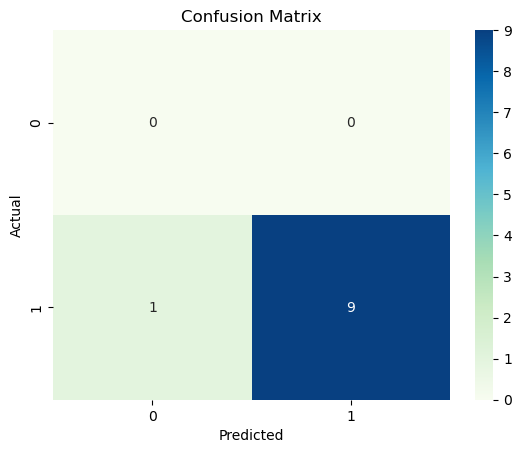

no. of iteration 170 Duration: 0:01:56.447876
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Confusion Matrix:
[[0 0]
 [2 8]]
sensitivity: 0.8
Specificity: nan


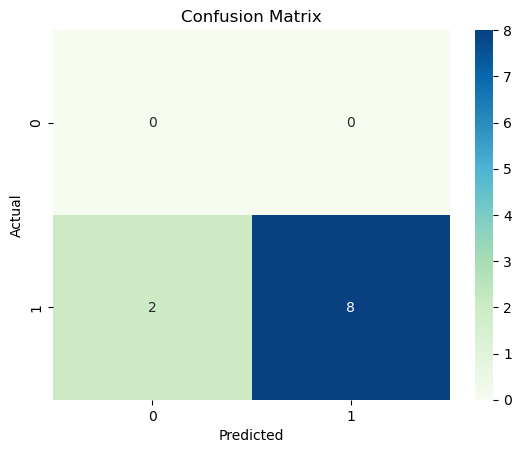

no. of iteration 180 Duration: 0:02:03.448426
Average regression score for the model for considering 20 percentile of the sorted feature set: 0.8777777777777779
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Confusion Matrix:
[[6 4]
 [0 0]]
sensitivity: nan
Specificity: 0.6


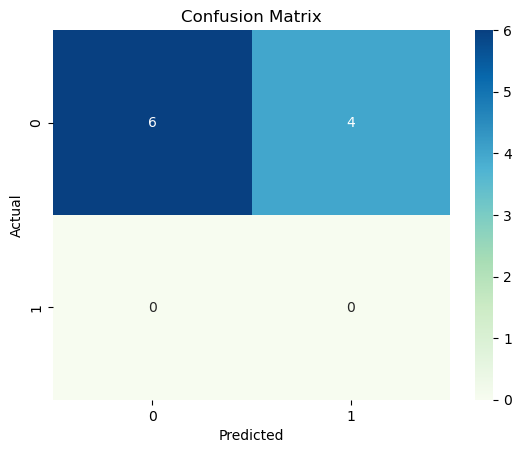

no. of iteration 10 Duration: 0:00:07.810431
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Confusion Matrix:
[[10  0]
 [ 0  0]]
sensitivity: nan
Specificity: 1.0


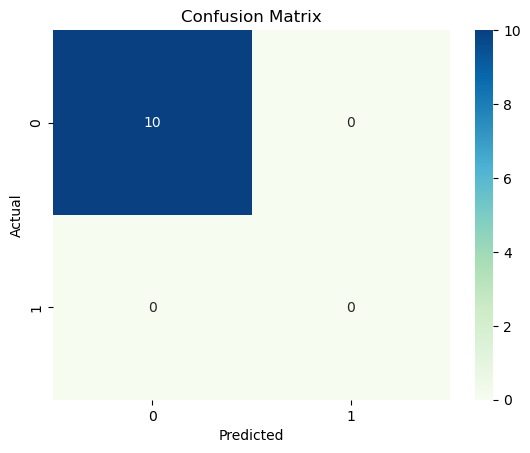

no. of iteration 20 Duration: 0:00:15.610231
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Confusion Matrix:
[[10  0]
 [ 0  0]]
sensitivity: nan
Specificity: 1.0


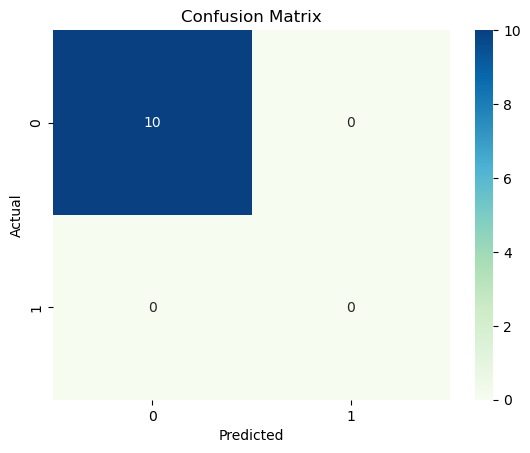

no. of iteration 30 Duration: 0:00:22.980826
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Confusion Matrix:
[[8 2]
 [0 0]]
sensitivity: nan
Specificity: 0.8


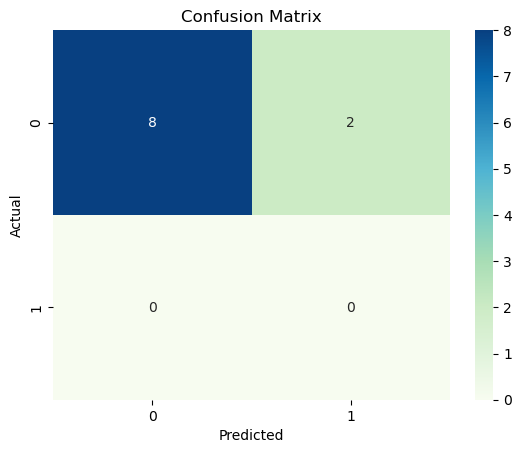

no. of iteration 40 Duration: 0:00:30.854370
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Confusion Matrix:
[[7 3]
 [0 0]]
sensitivity: nan
Specificity: 0.7


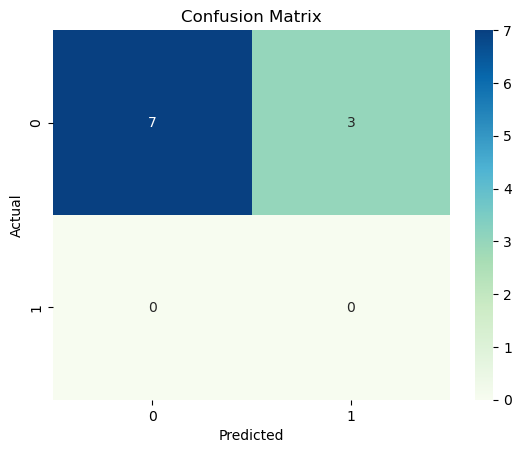

no. of iteration 50 Duration: 0:00:38.342700
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Confusion Matrix:
[[9 1]
 [0 0]]
sensitivity: nan
Specificity: 0.9


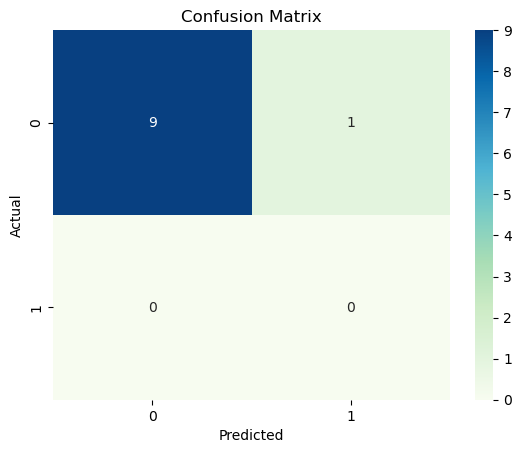

no. of iteration 60 Duration: 0:00:45.946090
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Confusion Matrix:
[[9 1]
 [0 0]]
sensitivity: nan
Specificity: 0.9


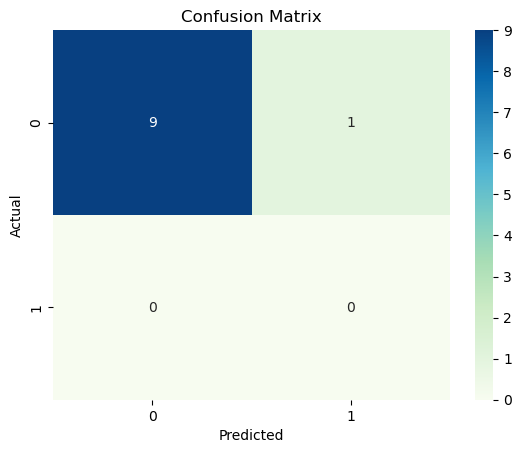

no. of iteration 70 Duration: 0:00:53.430664
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Confusion Matrix:
[[9 1]
 [0 0]]
sensitivity: nan
Specificity: 0.9


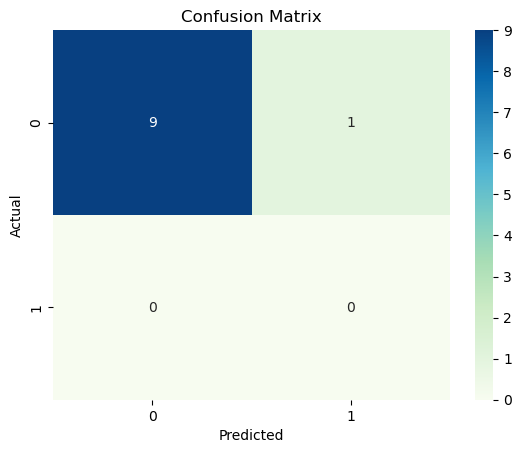

no. of iteration 80 Duration: 0:01:00.791052
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Confusion Matrix:
[[10  0]
 [ 0  0]]
sensitivity: nan
Specificity: 1.0


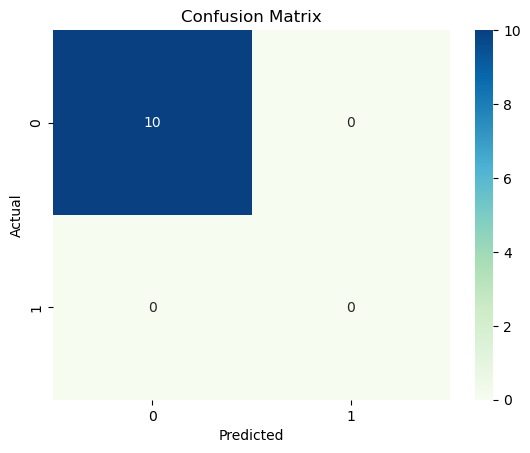

no. of iteration 90 Duration: 0:01:07.856209
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Confusion Matrix:
[[10  0]
 [ 0  0]]
sensitivity: nan
Specificity: 1.0


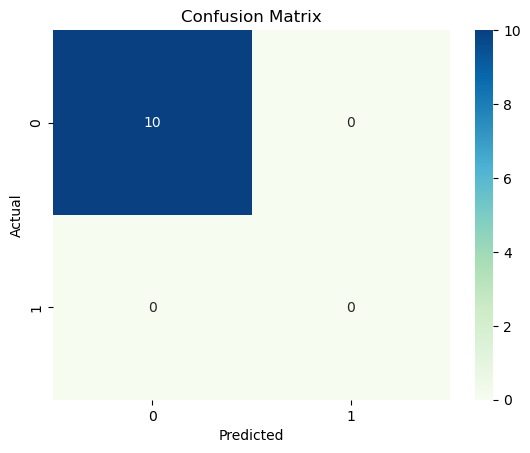

no. of iteration 100 Duration: 0:01:15.306585
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Confusion Matrix:
[[ 0  0]
 [ 0 10]]
sensitivity: 1.0
Specificity: nan


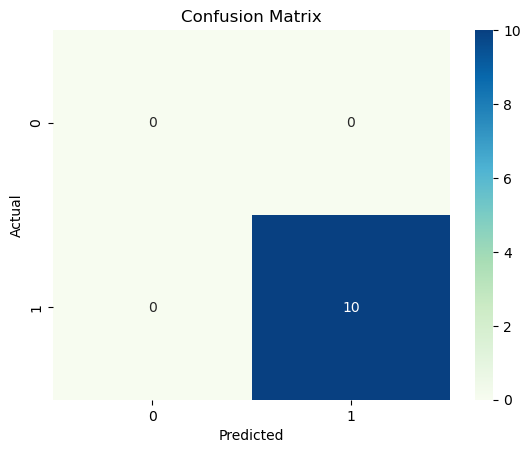

no. of iteration 110 Duration: 0:01:22.664129
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Confusion Matrix:
[[0 0]
 [3 7]]
sensitivity: 0.7
Specificity: nan


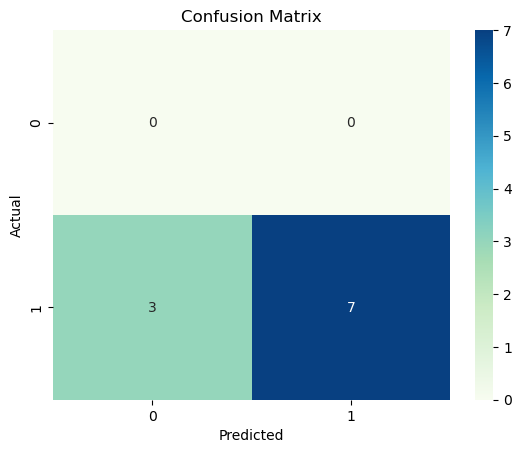

no. of iteration 120 Duration: 0:01:30.130875
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Confusion Matrix:
[[0 0]
 [1 9]]
sensitivity: 0.9
Specificity: nan


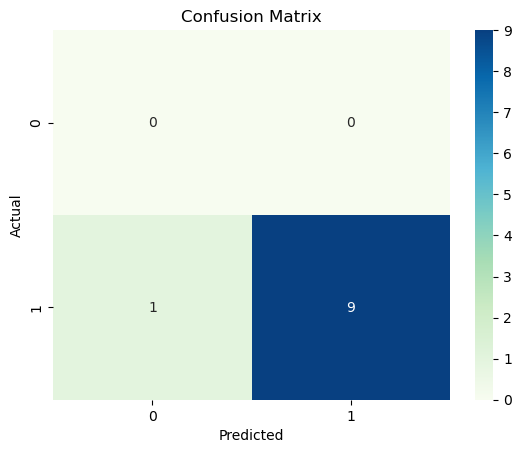

no. of iteration 130 Duration: 0:01:37.690846
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Confusion Matrix:
[[ 0  0]
 [ 0 10]]
sensitivity: 1.0
Specificity: nan


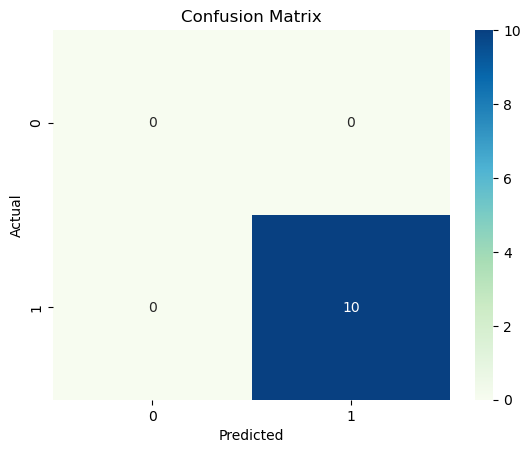

no. of iteration 140 Duration: 0:01:44.984280
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Confusion Matrix:
[[ 0  0]
 [ 0 10]]
sensitivity: 1.0
Specificity: nan


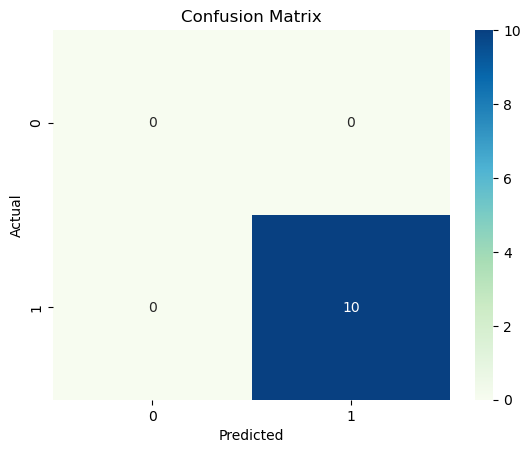

no. of iteration 150 Duration: 0:01:52.748173
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Confusion Matrix:
[[0 0]
 [3 7]]
sensitivity: 0.7
Specificity: nan


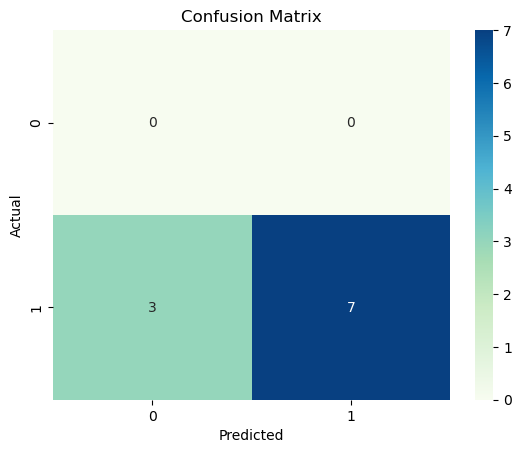

no. of iteration 160 Duration: 0:02:00.502604
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Confusion Matrix:
[[ 0  0]
 [ 0 10]]
sensitivity: 1.0
Specificity: nan


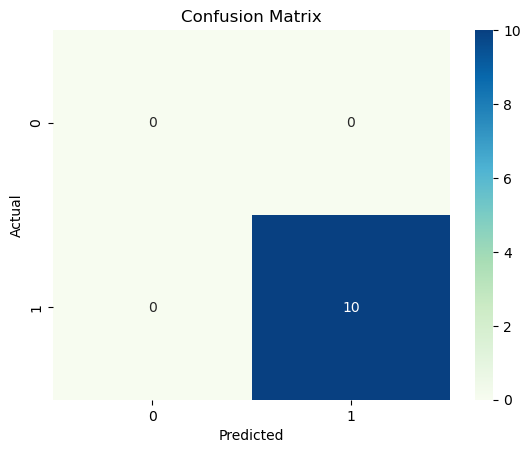

no. of iteration 170 Duration: 0:02:08.423896
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Confusion Matrix:
[[0 0]
 [2 8]]
sensitivity: 0.8
Specificity: nan


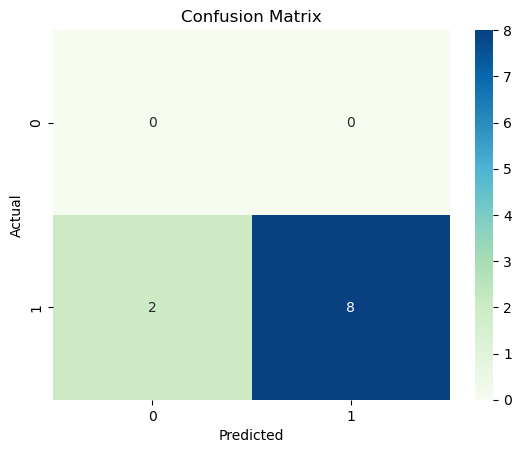

no. of iteration 180 Duration: 0:02:15.881095
Average regression score for the model for considering 25 percentile of the sorted feature set: 0.8833333333333333
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Confusion Matrix:
[[6 4]
 [0 0]]
sensitivity: nan
Specificity: 0.6


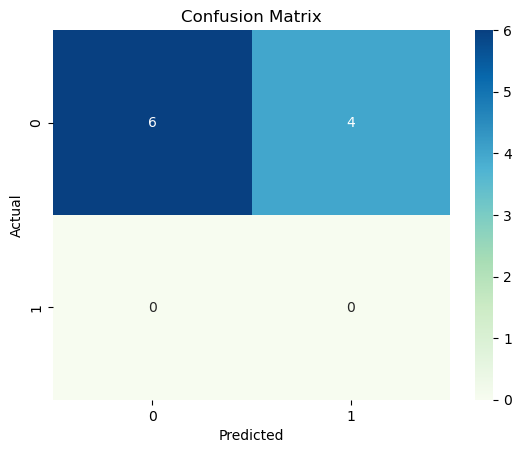

no. of iteration 10 Duration: 0:00:08.573152
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Confusion Matrix:
[[10  0]
 [ 0  0]]
sensitivity: nan
Specificity: 1.0


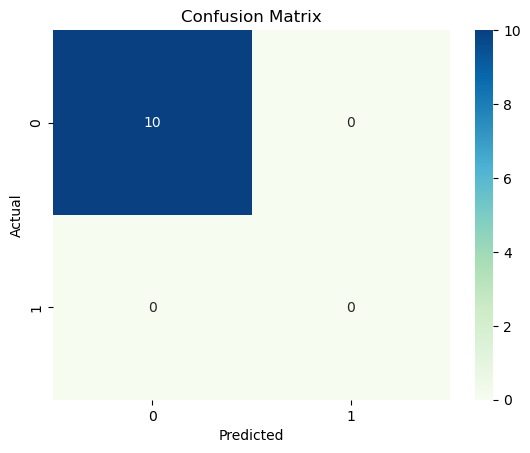

no. of iteration 20 Duration: 0:00:16.723004
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Confusion Matrix:
[[10  0]
 [ 0  0]]
sensitivity: nan
Specificity: 1.0


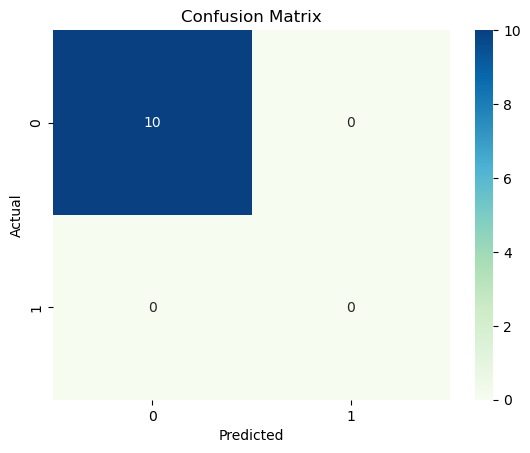

no. of iteration 30 Duration: 0:00:25.138594
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Confusion Matrix:
[[9 1]
 [0 0]]
sensitivity: nan
Specificity: 0.9


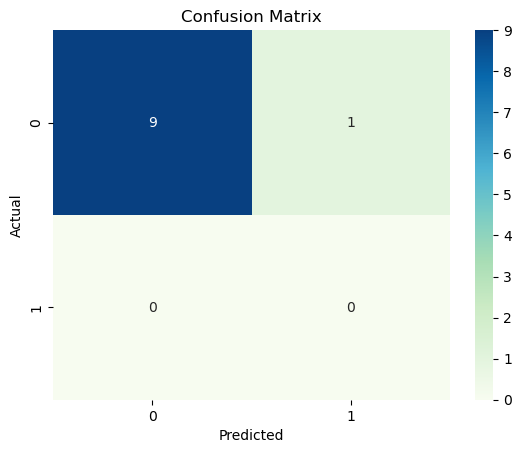

no. of iteration 40 Duration: 0:00:33.177732
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Confusion Matrix:
[[9 1]
 [0 0]]
sensitivity: nan
Specificity: 0.9


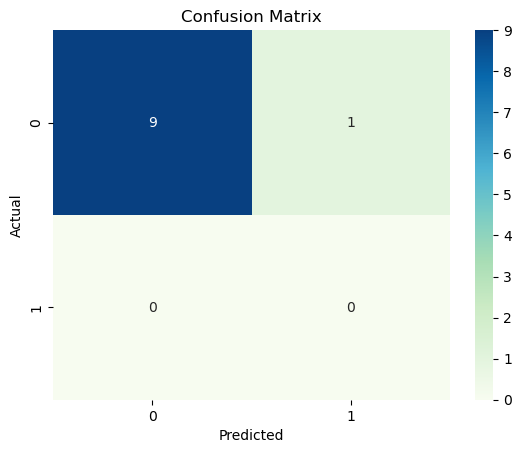

no. of iteration 50 Duration: 0:00:41.450119
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Confusion Matrix:
[[10  0]
 [ 0  0]]
sensitivity: nan
Specificity: 1.0


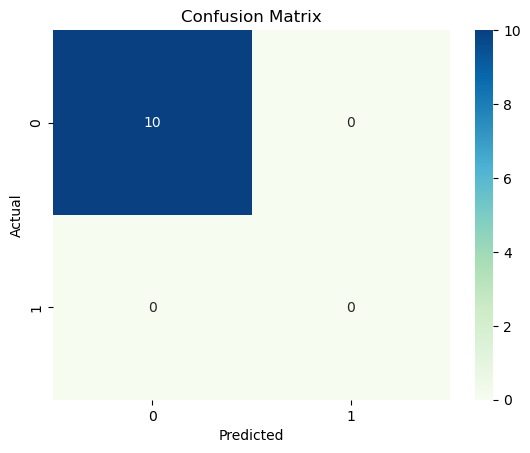

no. of iteration 60 Duration: 0:00:49.547302
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Confusion Matrix:
[[9 1]
 [0 0]]
sensitivity: nan
Specificity: 0.9


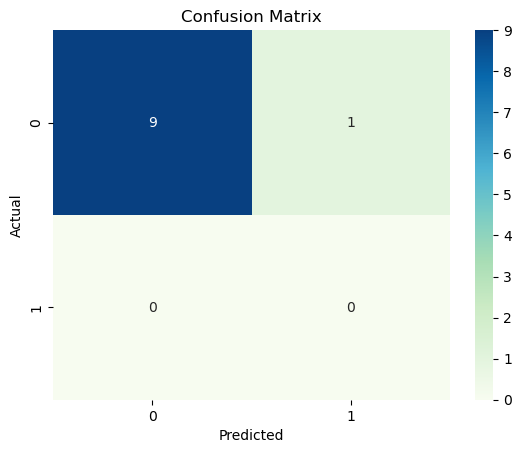

no. of iteration 70 Duration: 0:00:58.189233
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Confusion Matrix:
[[9 1]
 [0 0]]
sensitivity: nan
Specificity: 0.9


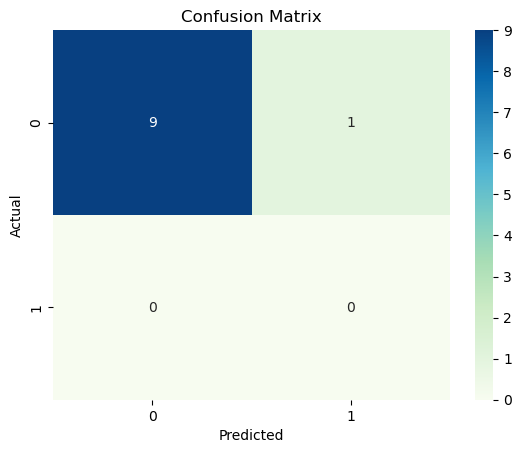

no. of iteration 80 Duration: 0:01:06.561055
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Confusion Matrix:
[[10  0]
 [ 0  0]]
sensitivity: nan
Specificity: 1.0


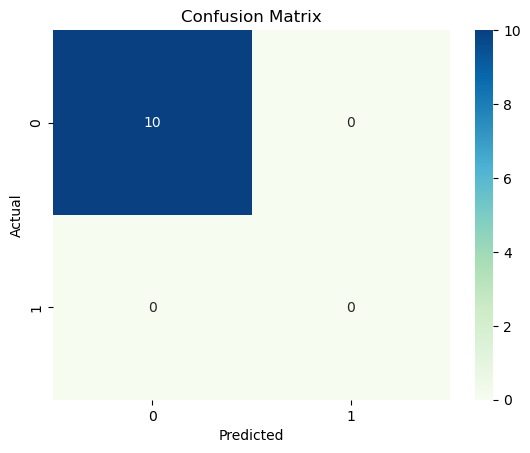

no. of iteration 90 Duration: 0:01:14.948268
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Confusion Matrix:
[[8 2]
 [0 0]]
sensitivity: nan
Specificity: 0.8


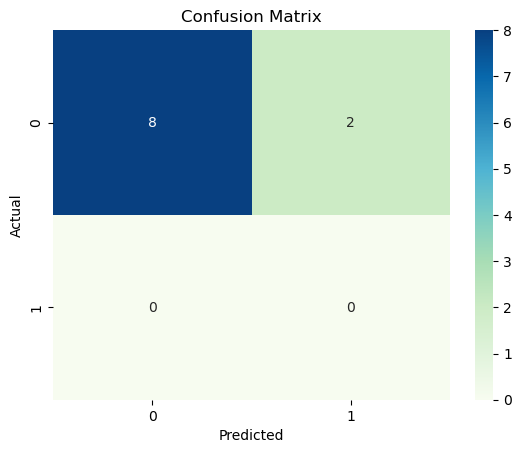

no. of iteration 100 Duration: 0:01:23.395409
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Confusion Matrix:
[[0 0]
 [1 9]]
sensitivity: 0.9
Specificity: nan


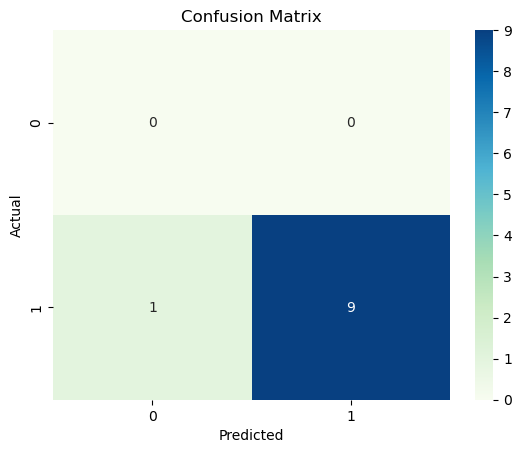

no. of iteration 110 Duration: 0:01:32.026080
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Confusion Matrix:
[[0 0]
 [2 8]]
sensitivity: 0.8
Specificity: nan


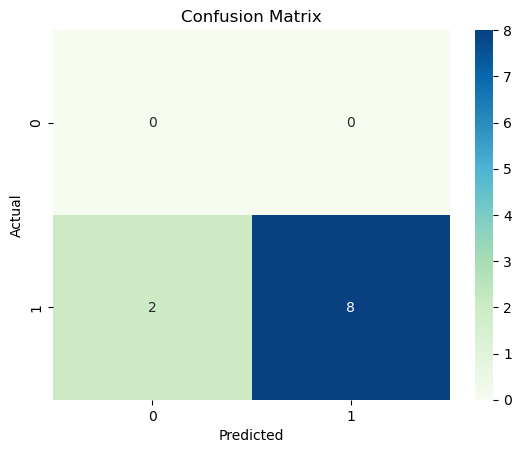

no. of iteration 120 Duration: 0:01:41.062380
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Confusion Matrix:
[[0 0]
 [2 8]]
sensitivity: 0.8
Specificity: nan


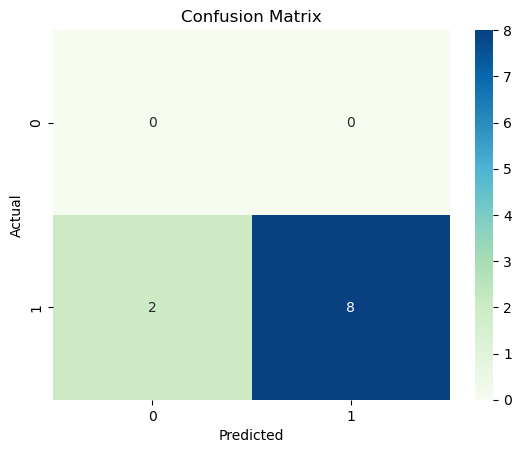

no. of iteration 130 Duration: 0:01:49.909421
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Confusion Matrix:
[[ 0  0]
 [ 0 10]]
sensitivity: 1.0
Specificity: nan


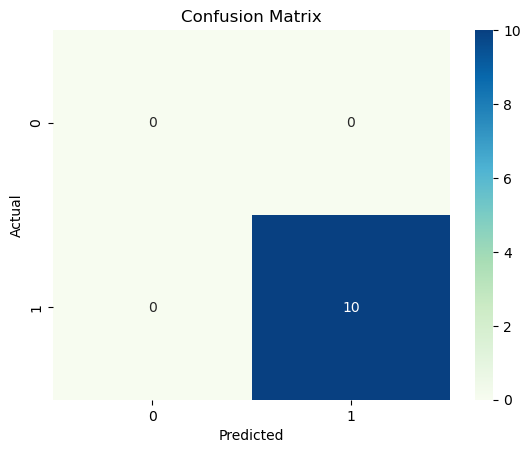

no. of iteration 140 Duration: 0:01:59.630501
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Confusion Matrix:
[[ 0  0]
 [ 0 10]]
sensitivity: 1.0
Specificity: nan


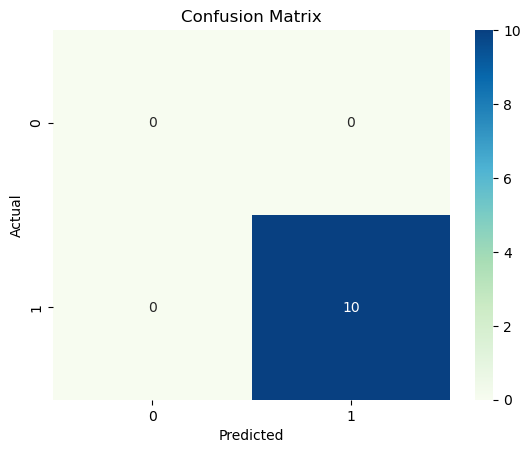

no. of iteration 150 Duration: 0:02:08.069056
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Confusion Matrix:
[[0 0]
 [4 6]]
sensitivity: 0.6
Specificity: nan


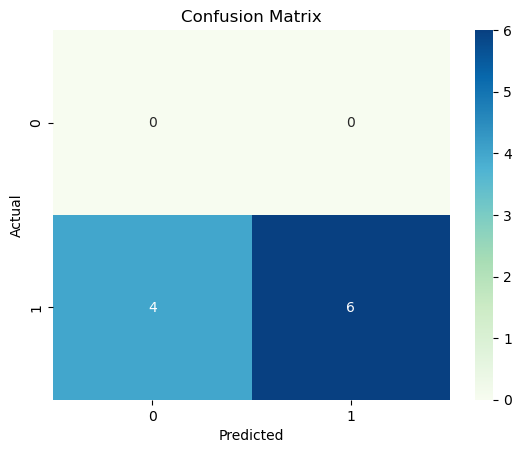

no. of iteration 160 Duration: 0:02:16.633035
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Confusion Matrix:
[[ 0  0]
 [ 0 10]]
sensitivity: 1.0
Specificity: nan


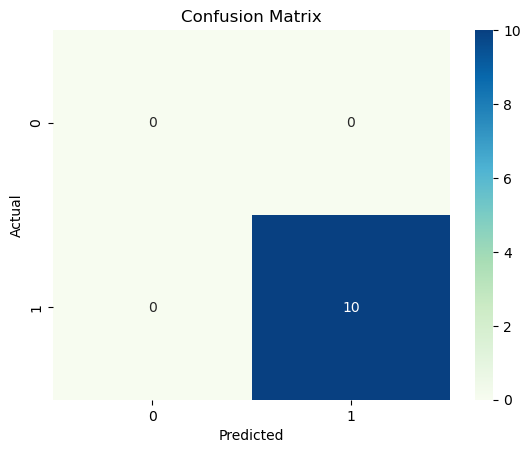

no. of iteration 170 Duration: 0:02:25.518088
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Confusion Matrix:
[[0 0]
 [2 8]]
sensitivity: 0.8
Specificity: nan


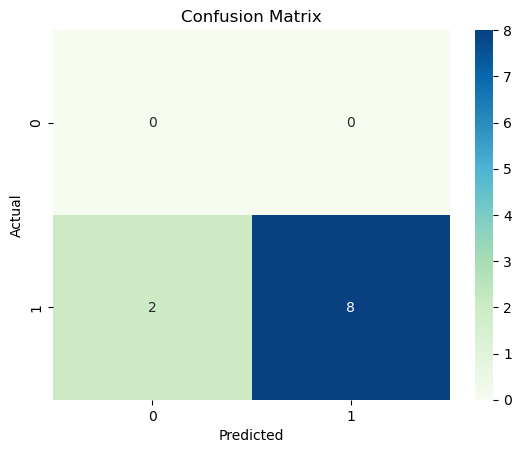

no. of iteration 180 Duration: 0:02:34.468507
Average regression score for the model for considering 30 percentile of the sorted feature set: 0.8833333333333335
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Confusion Matrix:
[[6 4]
 [0 0]]
sensitivity: nan
Specificity: 0.6


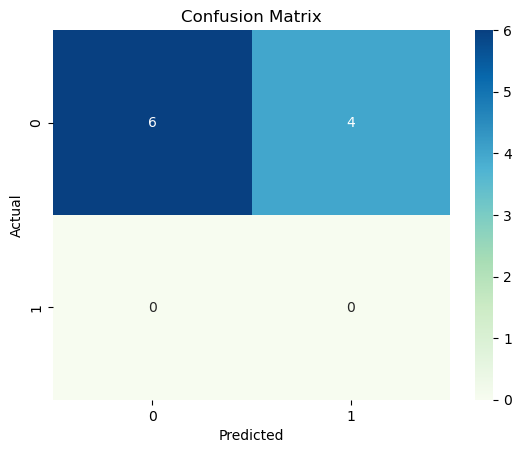

no. of iteration 10 Duration: 0:00:09.655625
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Confusion Matrix:
[[10  0]
 [ 0  0]]
sensitivity: nan
Specificity: 1.0


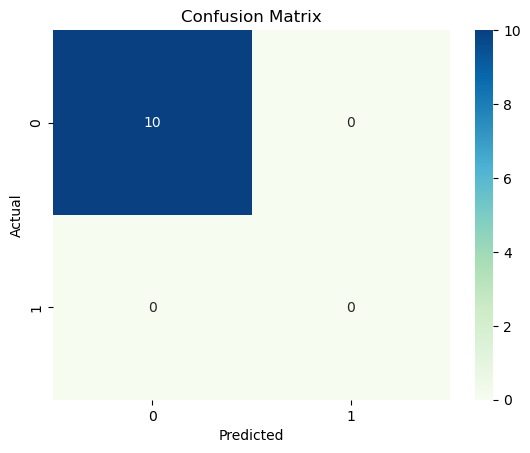

no. of iteration 20 Duration: 0:00:19.410145
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Confusion Matrix:
[[10  0]
 [ 0  0]]
sensitivity: nan
Specificity: 1.0


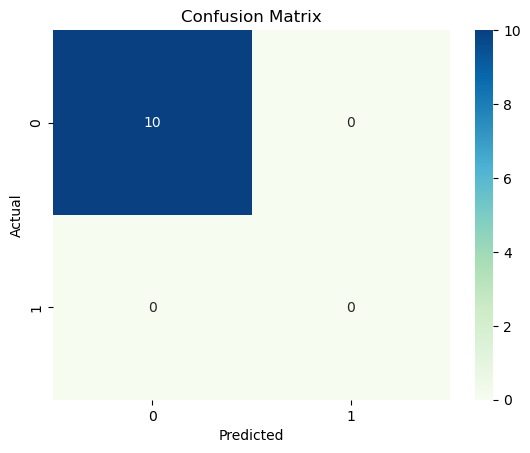

no. of iteration 30 Duration: 0:00:29.257091
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Confusion Matrix:
[[7 3]
 [0 0]]
sensitivity: nan
Specificity: 0.7


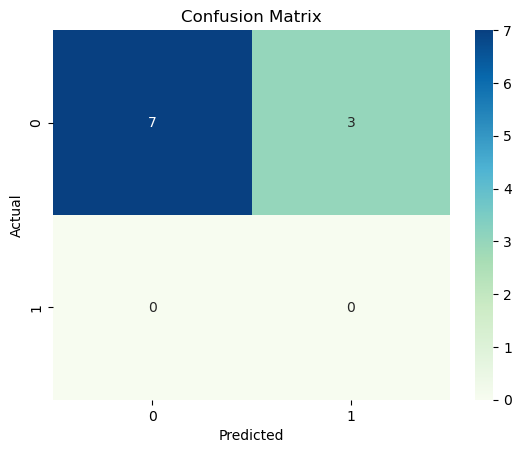

no. of iteration 40 Duration: 0:00:38.997863
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Confusion Matrix:
[[9 1]
 [0 0]]
sensitivity: nan
Specificity: 0.9


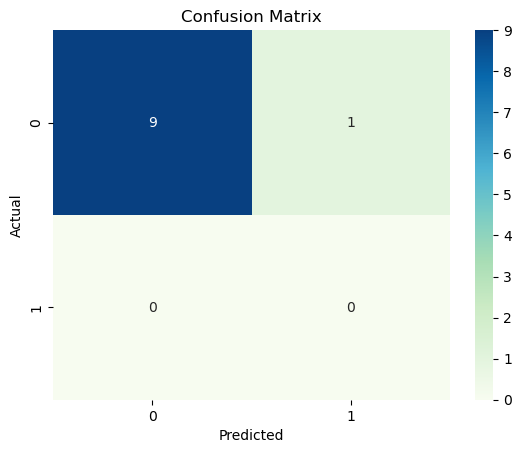

no. of iteration 50 Duration: 0:00:48.629171
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Confusion Matrix:
[[9 1]
 [0 0]]
sensitivity: nan
Specificity: 0.9


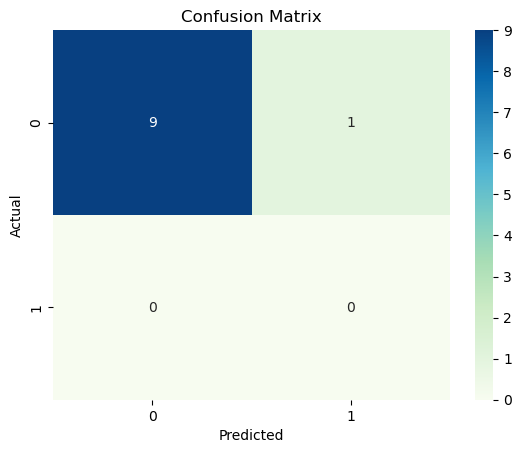

no. of iteration 60 Duration: 0:00:58.612494
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Confusion Matrix:
[[9 1]
 [0 0]]
sensitivity: nan
Specificity: 0.9


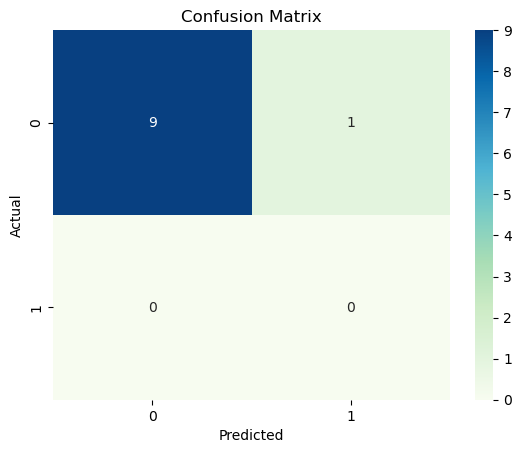

no. of iteration 70 Duration: 0:01:08.282384
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Confusion Matrix:
[[9 1]
 [0 0]]
sensitivity: nan
Specificity: 0.9


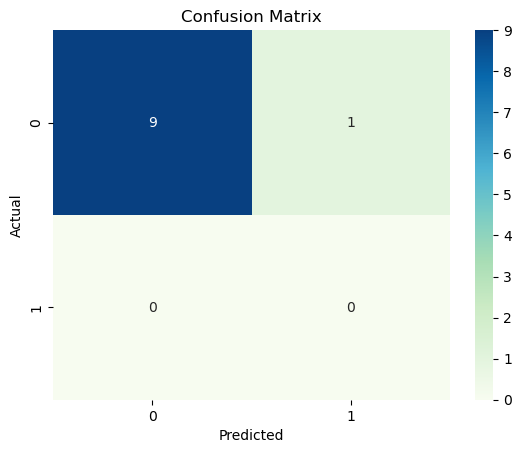

no. of iteration 80 Duration: 0:01:18.273162
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Confusion Matrix:
[[10  0]
 [ 0  0]]
sensitivity: nan
Specificity: 1.0


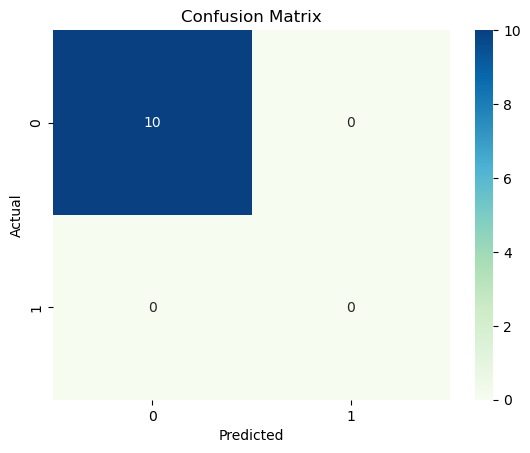

no. of iteration 90 Duration: 0:01:27.768291
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Confusion Matrix:
[[9 1]
 [0 0]]
sensitivity: nan
Specificity: 0.9


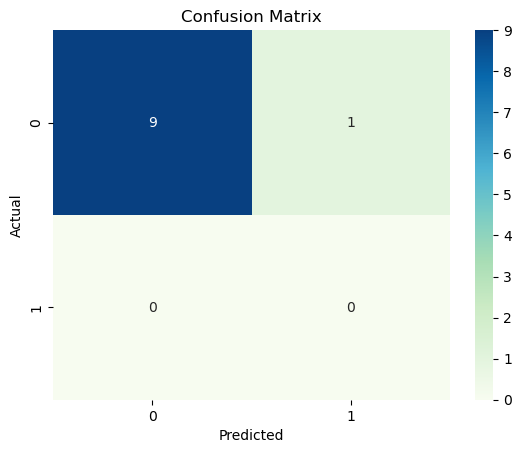

no. of iteration 100 Duration: 0:01:37.170148
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Confusion Matrix:
[[0 0]
 [1 9]]
sensitivity: 0.9
Specificity: nan


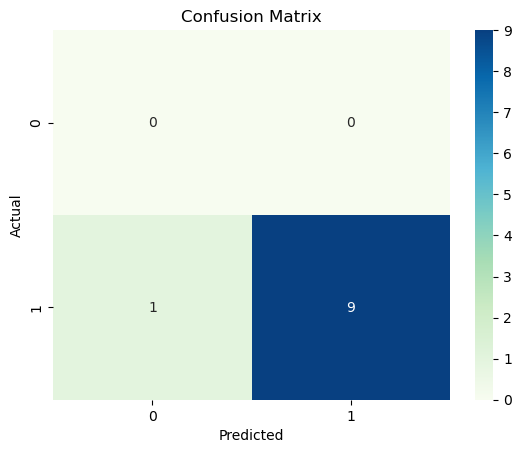

no. of iteration 110 Duration: 0:01:46.447675
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Confusion Matrix:
[[0 0]
 [1 9]]
sensitivity: 0.9
Specificity: nan


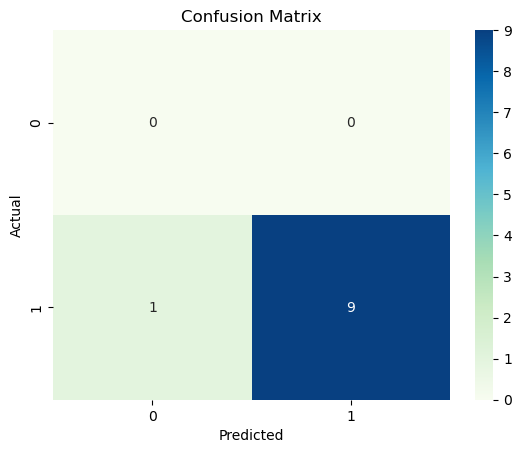

no. of iteration 120 Duration: 0:01:56.370843
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Confusion Matrix:
[[0 0]
 [1 9]]
sensitivity: 0.9
Specificity: nan


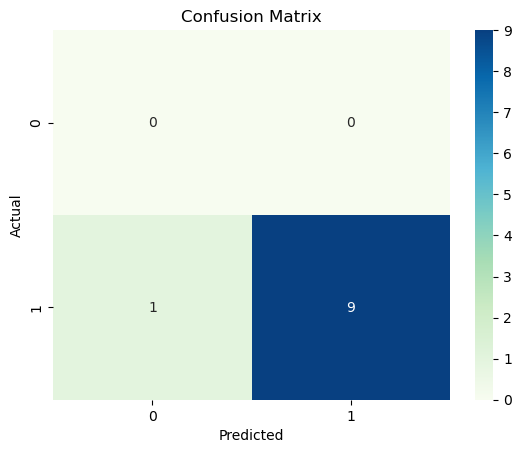

no. of iteration 130 Duration: 0:02:06.043108
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Confusion Matrix:
[[0 0]
 [2 8]]
sensitivity: 0.8
Specificity: nan


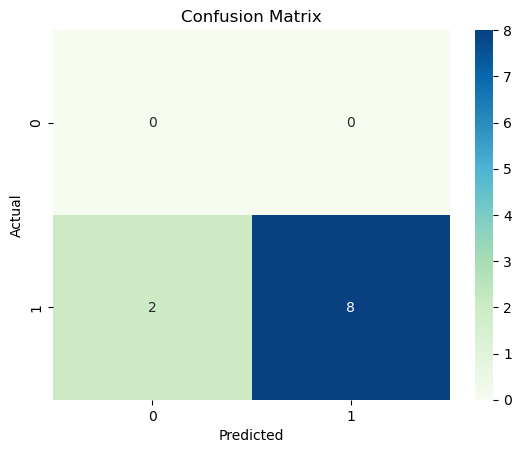

no. of iteration 140 Duration: 0:02:15.795718
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Confusion Matrix:
[[0 0]
 [1 9]]
sensitivity: 0.9
Specificity: nan


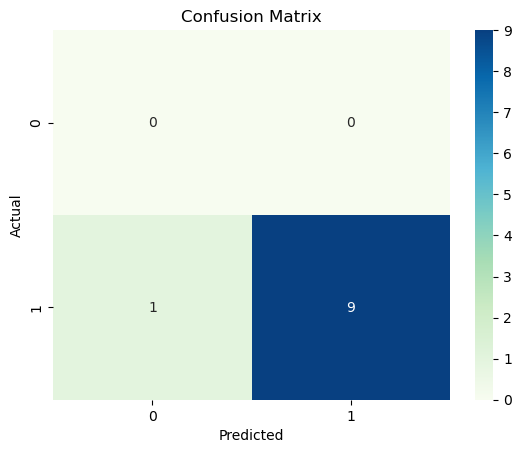

no. of iteration 150 Duration: 0:02:25.376042
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Confusion Matrix:
[[0 0]
 [2 8]]
sensitivity: 0.8
Specificity: nan


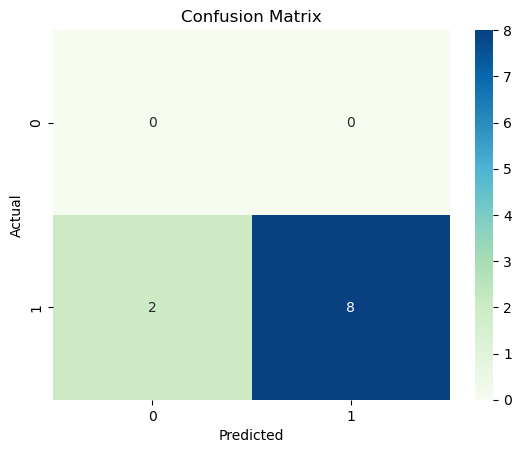

no. of iteration 160 Duration: 0:02:35.669042
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Confusion Matrix:
[[0 0]
 [1 9]]
sensitivity: 0.9
Specificity: nan


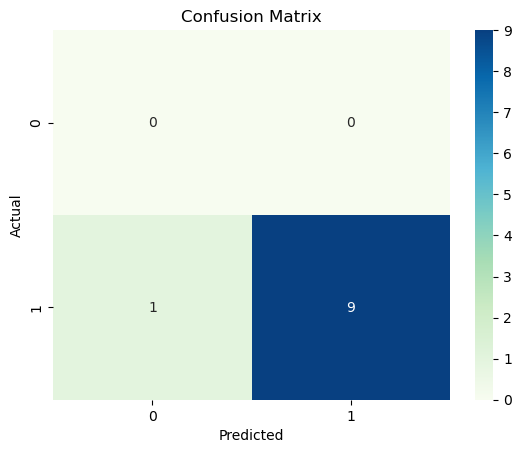

no. of iteration 170 Duration: 0:02:45.631885
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Confusion Matrix:
[[0 0]
 [2 8]]
sensitivity: 0.8
Specificity: nan


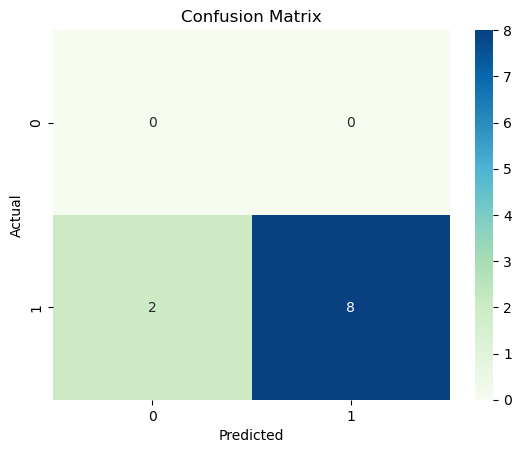

no. of iteration 180 Duration: 0:02:55.778156
Average regression score for the model for considering 35 percentile of the sorted feature set: 0.8722222222222225
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Confusion Matrix:
[[7 3]
 [0 0]]
sensitivity: nan
Specificity: 0.7


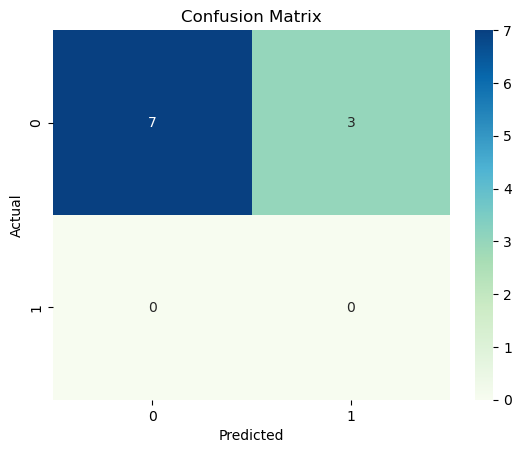

no. of iteration 10 Duration: 0:00:10.783534
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Confusion Matrix:
[[10  0]
 [ 0  0]]
sensitivity: nan
Specificity: 1.0


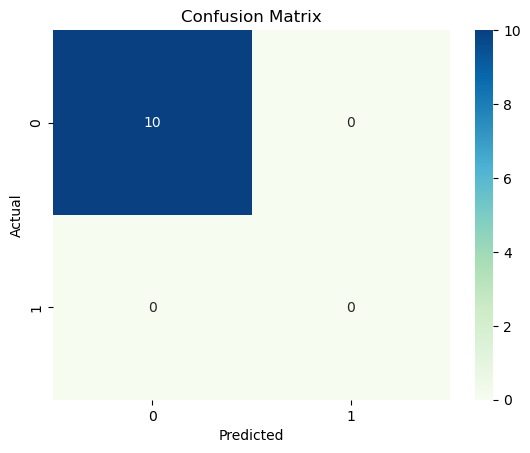

no. of iteration 20 Duration: 0:00:21.207606
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Confusion Matrix:
[[10  0]
 [ 0  0]]
sensitivity: nan
Specificity: 1.0


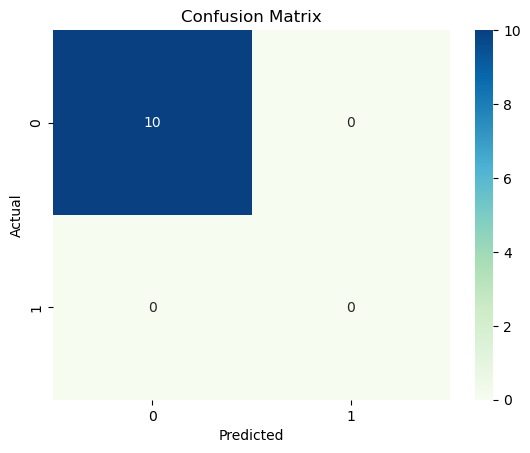

no. of iteration 30 Duration: 0:00:31.748723
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Confusion Matrix:
[[8 2]
 [0 0]]
sensitivity: nan
Specificity: 0.8


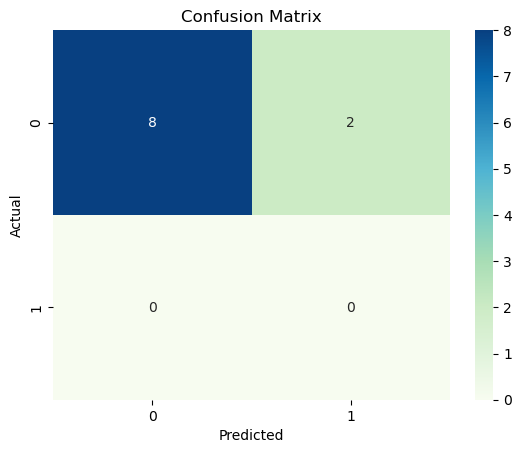

no. of iteration 40 Duration: 0:00:42.370766
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Confusion Matrix:
[[8 2]
 [0 0]]
sensitivity: nan
Specificity: 0.8


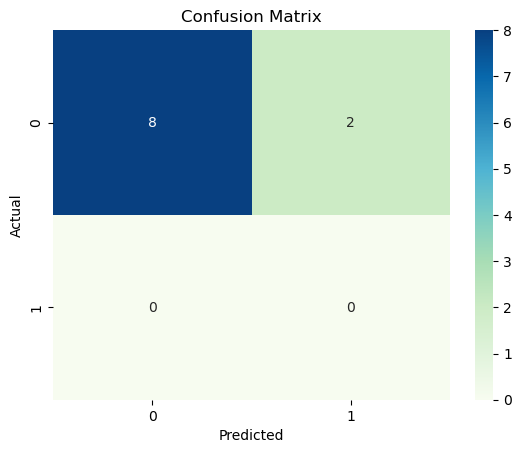

no. of iteration 50 Duration: 0:00:54.021937
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Confusion Matrix:
[[10  0]
 [ 0  0]]
sensitivity: nan
Specificity: 1.0


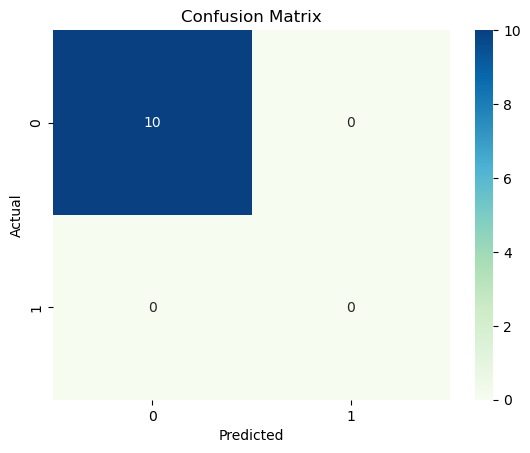

no. of iteration 60 Duration: 0:01:05.596657
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Confusion Matrix:
[[9 1]
 [0 0]]
sensitivity: nan
Specificity: 0.9


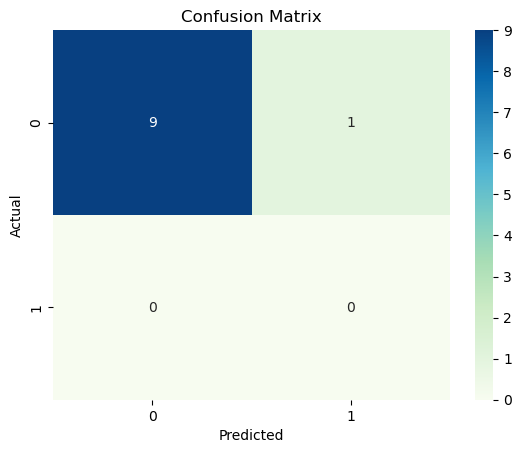

no. of iteration 70 Duration: 0:01:16.895114
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Confusion Matrix:
[[8 2]
 [0 0]]
sensitivity: nan
Specificity: 0.8


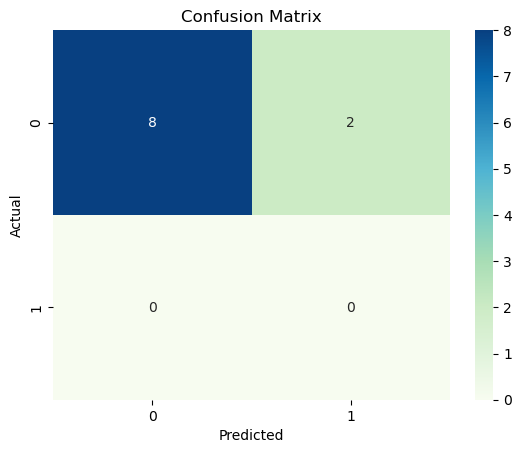

no. of iteration 80 Duration: 0:01:27.080876
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Confusion Matrix:
[[10  0]
 [ 0  0]]
sensitivity: nan
Specificity: 1.0


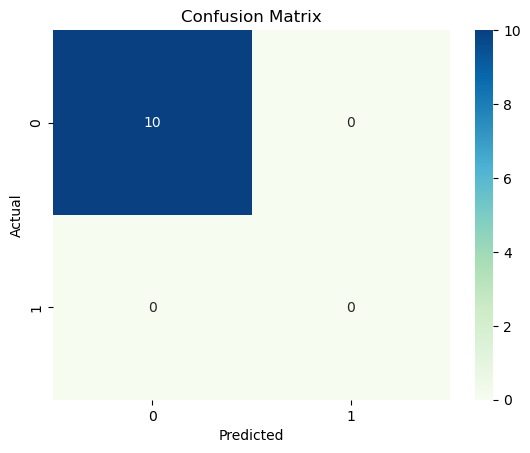

no. of iteration 90 Duration: 0:01:37.830431
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Confusion Matrix:
[[9 1]
 [0 0]]
sensitivity: nan
Specificity: 0.9


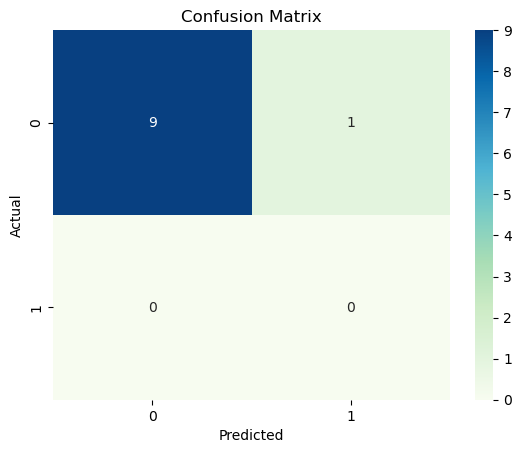

no. of iteration 100 Duration: 0:01:48.161645
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Confusion Matrix:
[[0 0]
 [1 9]]
sensitivity: 0.9
Specificity: nan


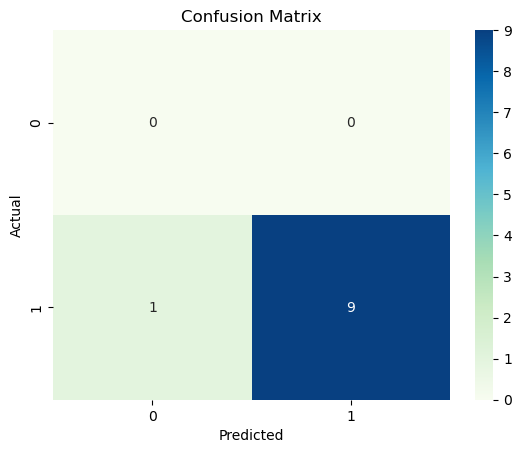

no. of iteration 110 Duration: 0:01:59.019657
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Confusion Matrix:
[[0 0]
 [1 9]]
sensitivity: 0.9
Specificity: nan


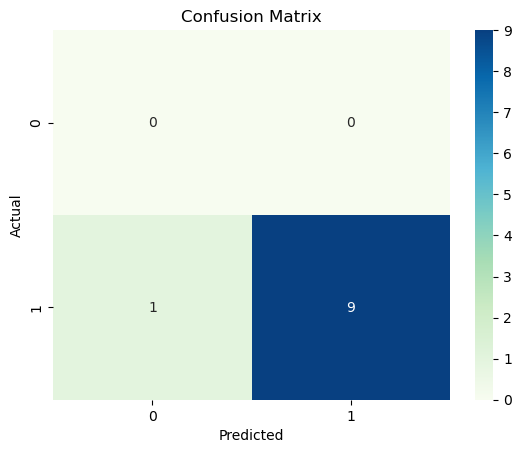

no. of iteration 120 Duration: 0:02:09.955716
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Confusion Matrix:
[[ 0  0]
 [ 0 10]]
sensitivity: 1.0
Specificity: nan


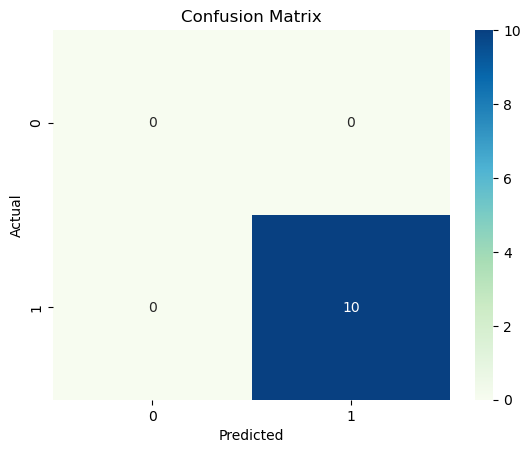

no. of iteration 130 Duration: 0:02:21.070496
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Confusion Matrix:
[[ 0  0]
 [ 0 10]]
sensitivity: 1.0
Specificity: nan


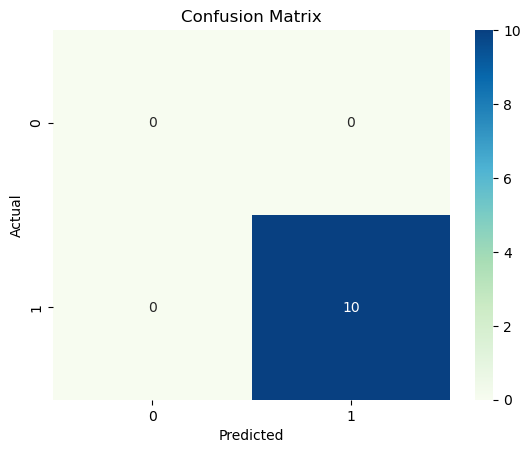

no. of iteration 140 Duration: 0:02:31.307606
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Confusion Matrix:
[[ 0  0]
 [ 0 10]]
sensitivity: 1.0
Specificity: nan


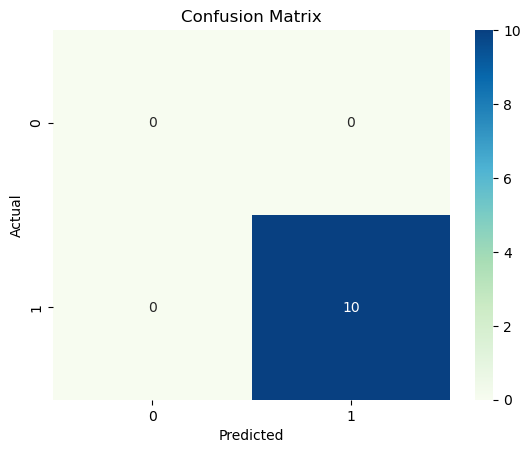

no. of iteration 150 Duration: 0:02:41.608925
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Confusion Matrix:
[[0 0]
 [4 6]]
sensitivity: 0.6
Specificity: nan


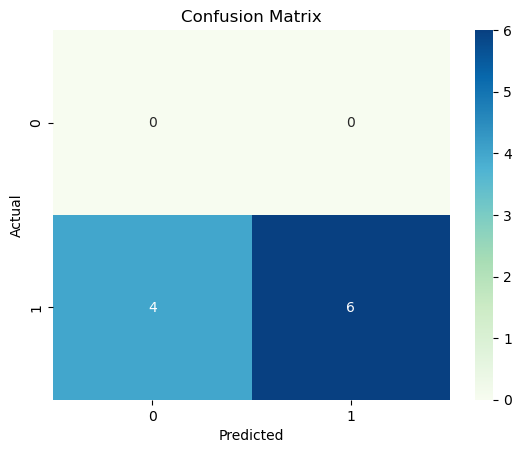

no. of iteration 160 Duration: 0:02:51.963462
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Confusion Matrix:
[[0 0]
 [2 8]]
sensitivity: 0.8
Specificity: nan


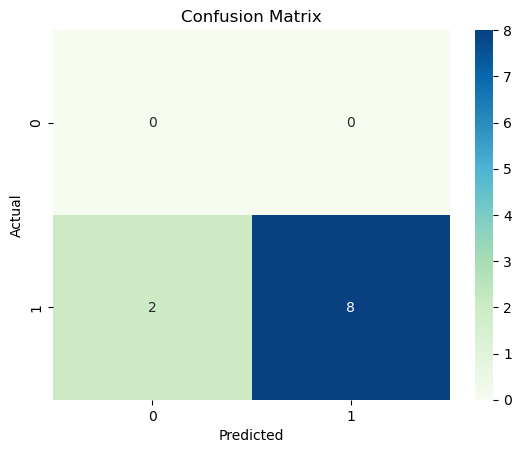

no. of iteration 170 Duration: 0:03:02.437853
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Confusion Matrix:
[[0 0]
 [2 8]]
sensitivity: 0.8
Specificity: nan


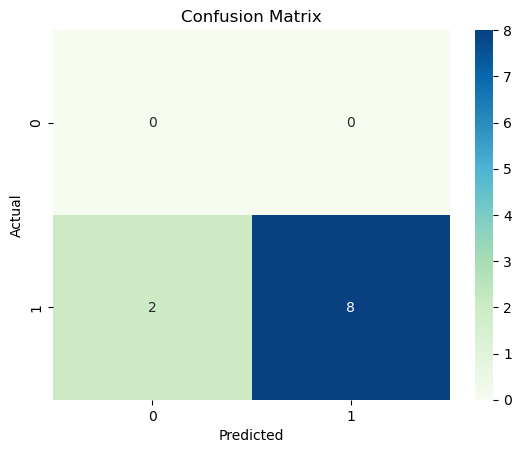

no. of iteration 180 Duration: 0:03:12.846372
Average regression score for the model for considering 40 percentile of the sorted feature set: 0.8833333333333334
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Confusion Matrix:
[[8 2]
 [0 0]]
sensitivity: nan
Specificity: 0.8


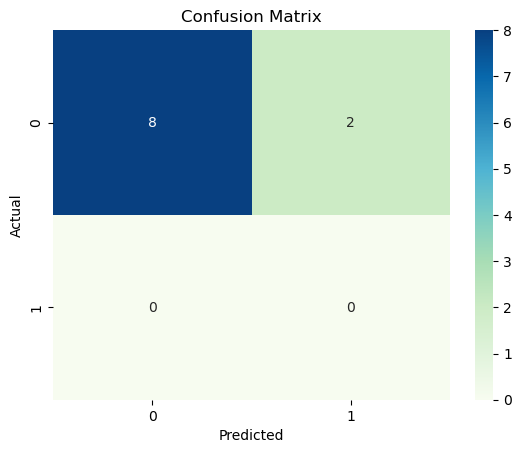

no. of iteration 10 Duration: 0:00:11.190604
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Confusion Matrix:
[[10  0]
 [ 0  0]]
sensitivity: nan
Specificity: 1.0


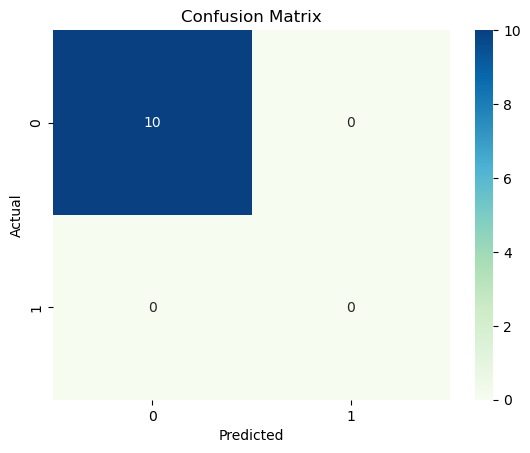

no. of iteration 20 Duration: 0:00:23.260967
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Confusion Matrix:
[[10  0]
 [ 0  0]]
sensitivity: nan
Specificity: 1.0


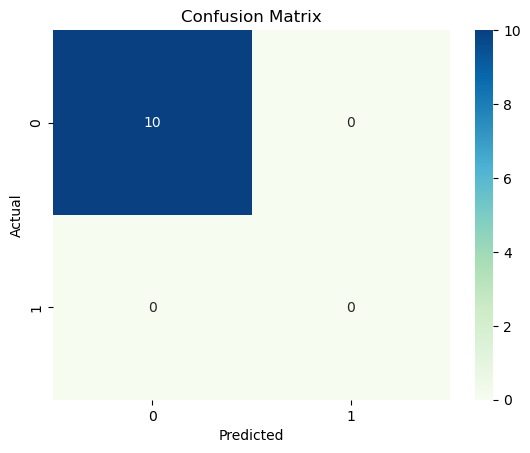

no. of iteration 30 Duration: 0:00:34.587495
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Confusion Matrix:
[[8 2]
 [0 0]]
sensitivity: nan
Specificity: 0.8


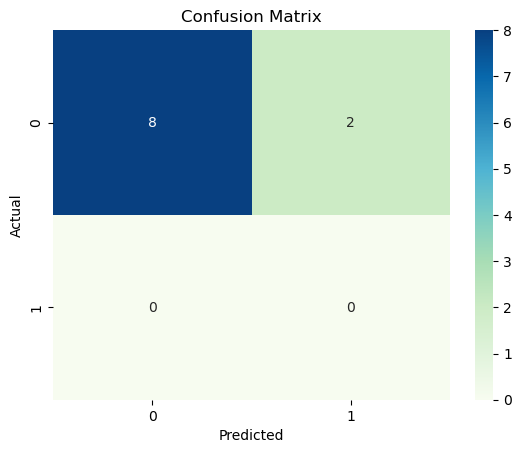

no. of iteration 40 Duration: 0:00:45.871106
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Confusion Matrix:
[[8 2]
 [0 0]]
sensitivity: nan
Specificity: 0.8


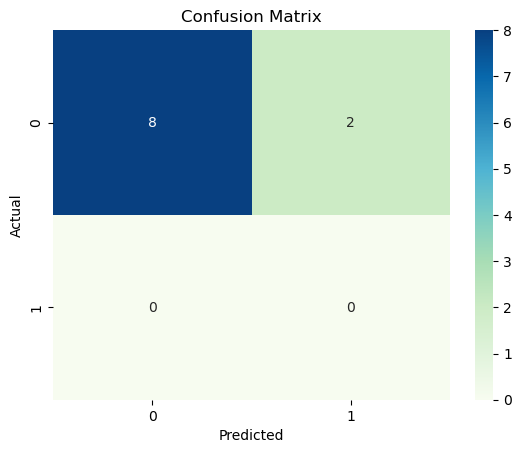

no. of iteration 50 Duration: 0:00:57.272175
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Confusion Matrix:
[[8 2]
 [0 0]]
sensitivity: nan
Specificity: 0.8


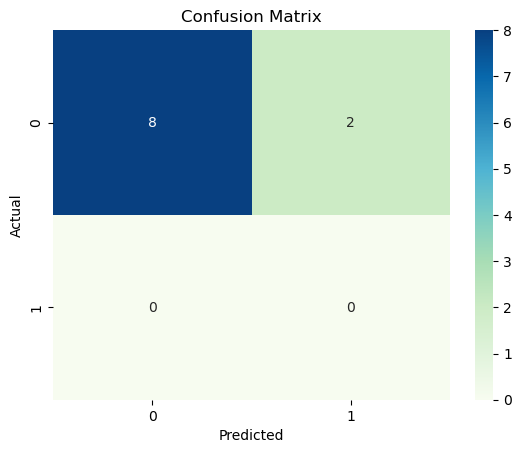

no. of iteration 60 Duration: 0:01:08.767485
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Confusion Matrix:
[[9 1]
 [0 0]]
sensitivity: nan
Specificity: 0.9


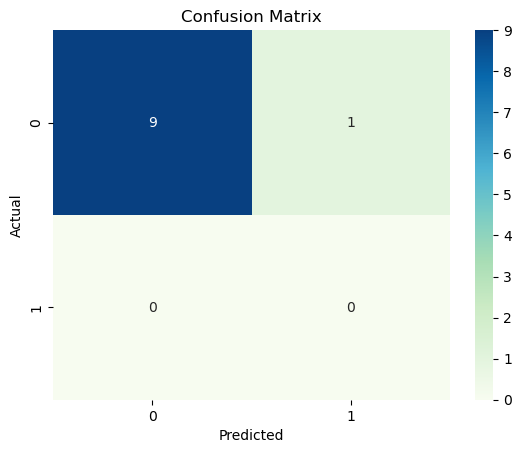

no. of iteration 70 Duration: 0:01:21.135528
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Confusion Matrix:
[[9 1]
 [0 0]]
sensitivity: nan
Specificity: 0.9


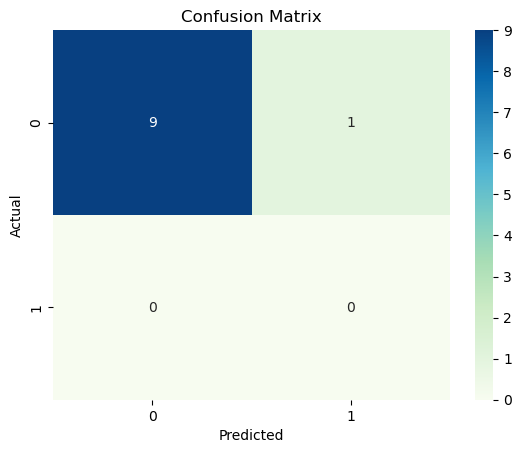

no. of iteration 80 Duration: 0:01:32.983995
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Confusion Matrix:
[[10  0]
 [ 0  0]]
sensitivity: nan
Specificity: 1.0


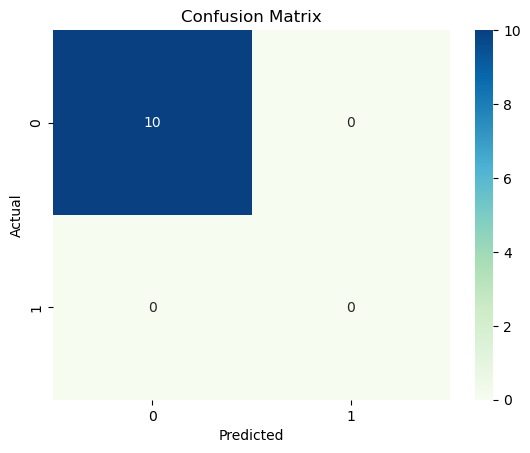

no. of iteration 90 Duration: 0:01:44.621523
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Confusion Matrix:
[[8 2]
 [0 0]]
sensitivity: nan
Specificity: 0.8


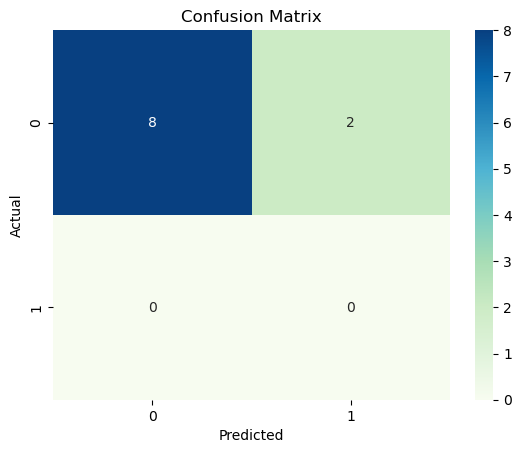

no. of iteration 100 Duration: 0:01:56.419692
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Confusion Matrix:
[[ 0  0]
 [ 0 10]]
sensitivity: 1.0
Specificity: nan


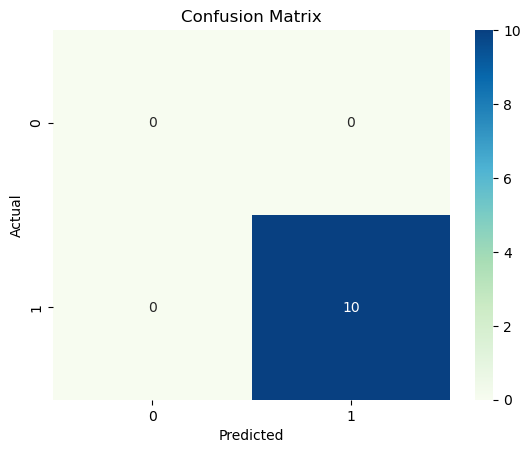

no. of iteration 110 Duration: 0:02:07.984213
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Confusion Matrix:
[[0 0]
 [1 9]]
sensitivity: 0.9
Specificity: nan


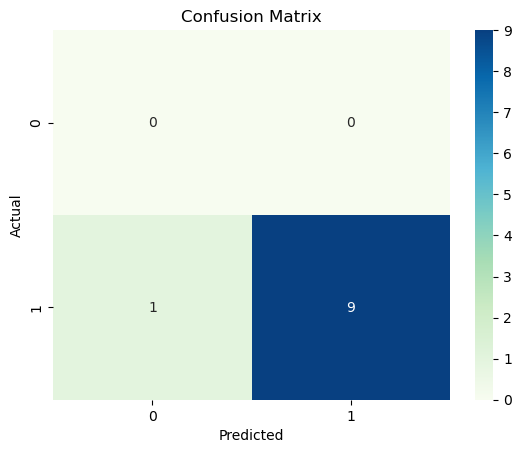

no. of iteration 120 Duration: 0:02:19.714220
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Confusion Matrix:
[[ 0  0]
 [ 0 10]]
sensitivity: 1.0
Specificity: nan


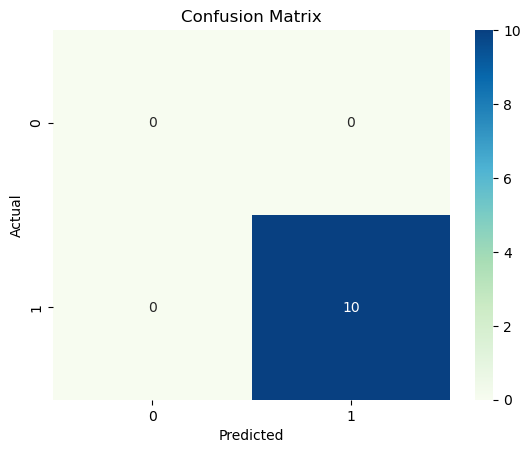

no. of iteration 130 Duration: 0:02:30.804054
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Confusion Matrix:
[[0 0]
 [2 8]]
sensitivity: 0.8
Specificity: nan


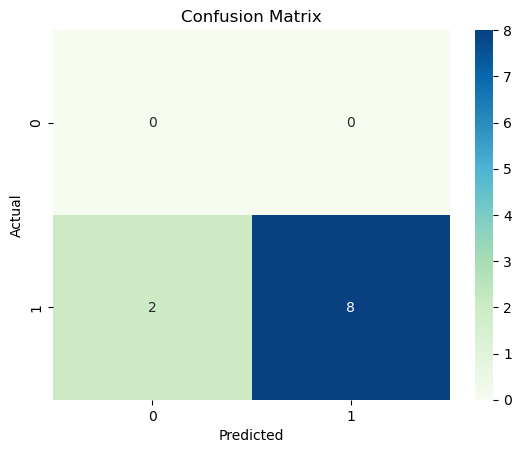

no. of iteration 140 Duration: 0:02:41.517514
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Confusion Matrix:
[[0 0]
 [1 9]]
sensitivity: 0.9
Specificity: nan


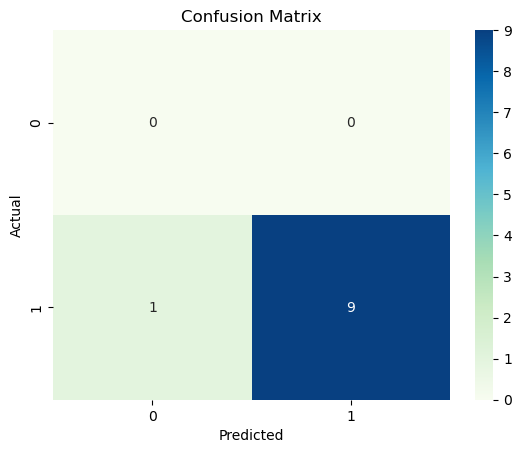

no. of iteration 150 Duration: 0:02:52.445257
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Confusion Matrix:
[[0 0]
 [2 8]]
sensitivity: 0.8
Specificity: nan


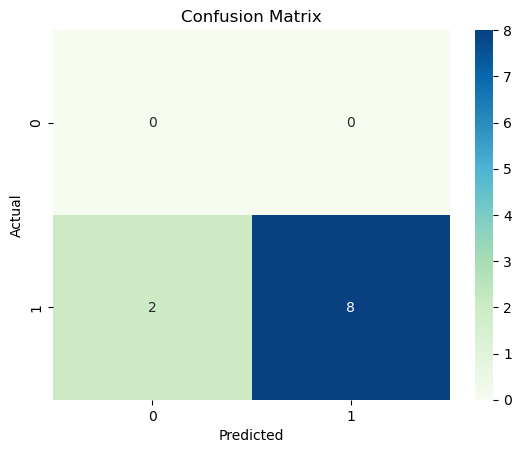

no. of iteration 160 Duration: 0:03:03.660645
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Confusion Matrix:
[[0 0]
 [1 9]]
sensitivity: 0.9
Specificity: nan


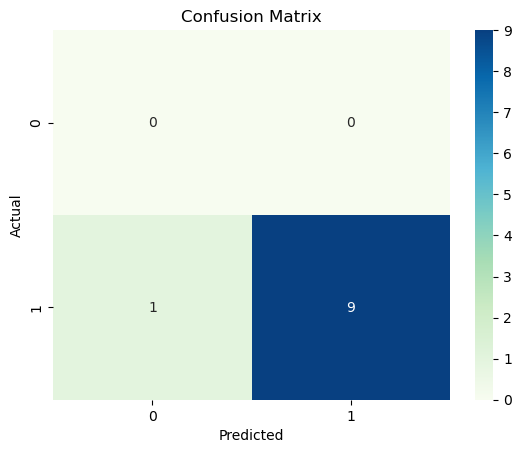

no. of iteration 170 Duration: 0:03:15.236909
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Confusion Matrix:
[[0 0]
 [2 8]]
sensitivity: 0.8
Specificity: nan


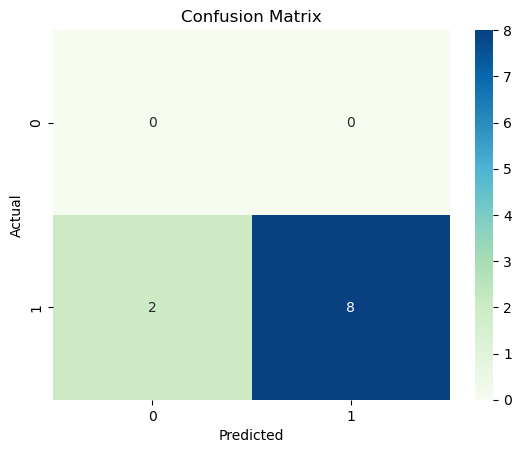

no. of iteration 180 Duration: 0:03:27.258526
Average regression score for the model for considering 45 percentile of the sorted feature set: 0.8833333333333335
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Confusion Matrix:
[[8 2]
 [0 0]]
sensitivity: nan
Specificity: 0.8


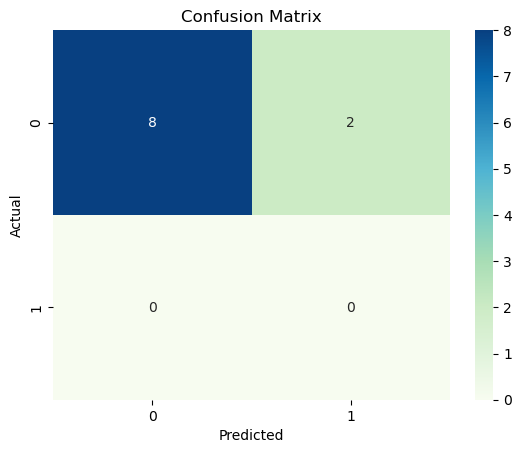

no. of iteration 10 Duration: 0:00:12.693325
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Confusion Matrix:
[[10  0]
 [ 0  0]]
sensitivity: nan
Specificity: 1.0


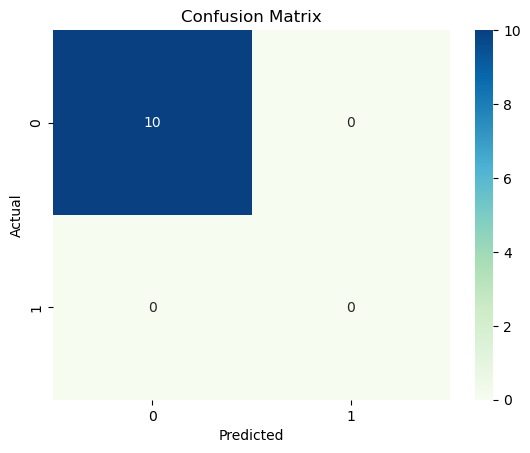

no. of iteration 20 Duration: 0:00:25.182703
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Confusion Matrix:
[[10  0]
 [ 0  0]]
sensitivity: nan
Specificity: 1.0


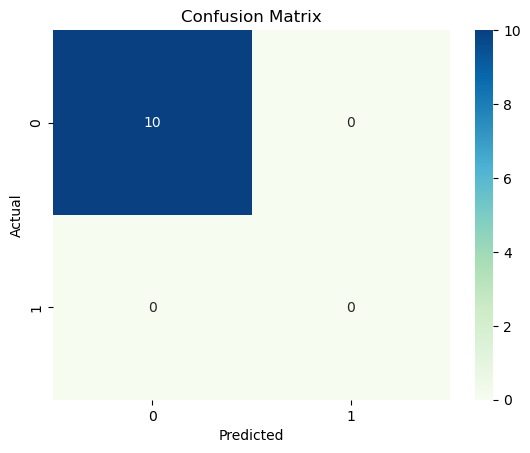

no. of iteration 30 Duration: 0:00:37.178119
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Confusion Matrix:
[[10  0]
 [ 0  0]]
sensitivity: nan
Specificity: 1.0


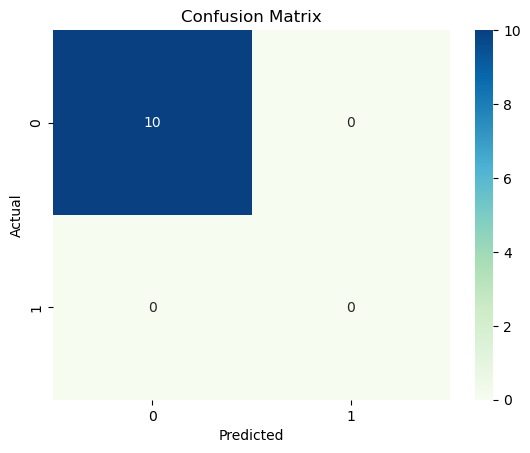

no. of iteration 40 Duration: 0:00:50.072422
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Confusion Matrix:
[[10  0]
 [ 0  0]]
sensitivity: nan
Specificity: 1.0


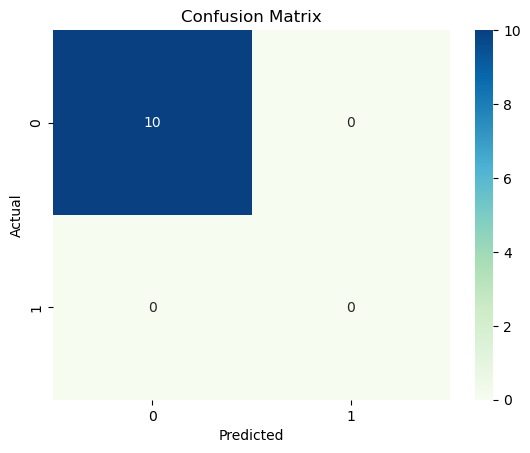

no. of iteration 50 Duration: 0:01:03.303780
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Confusion Matrix:
[[8 2]
 [0 0]]
sensitivity: nan
Specificity: 0.8


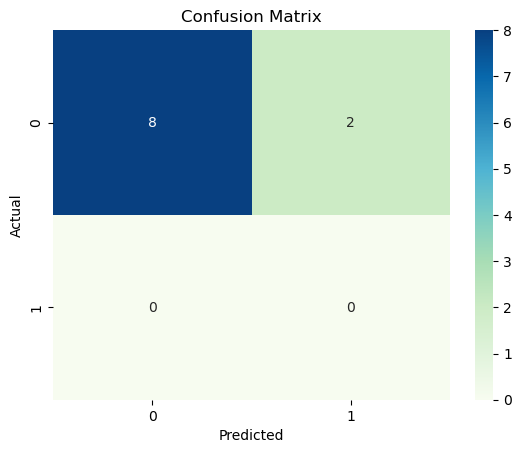

no. of iteration 60 Duration: 0:01:16.247817
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Confusion Matrix:
[[9 1]
 [0 0]]
sensitivity: nan
Specificity: 0.9


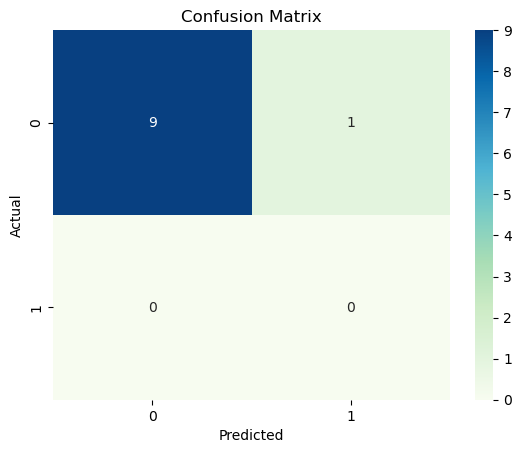

no. of iteration 70 Duration: 0:01:28.881506
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Confusion Matrix:
[[8 2]
 [0 0]]
sensitivity: nan
Specificity: 0.8


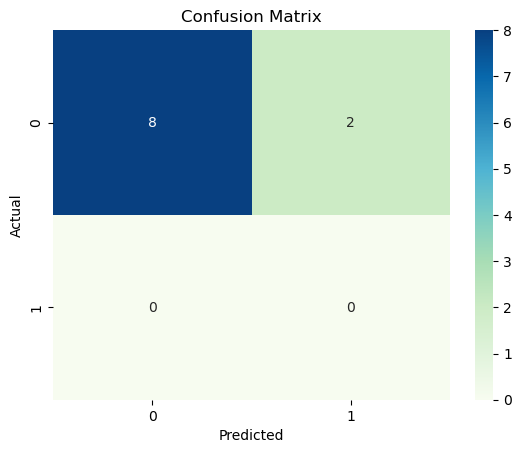

no. of iteration 80 Duration: 0:01:40.969110
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Confusion Matrix:
[[10  0]
 [ 0  0]]
sensitivity: nan
Specificity: 1.0


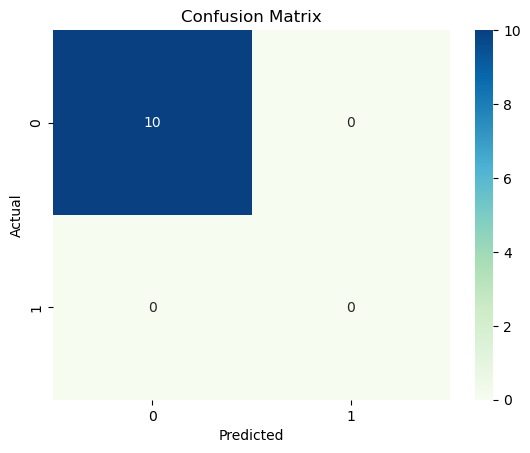

no. of iteration 90 Duration: 0:01:53.117007
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Confusion Matrix:
[[8 2]
 [0 0]]
sensitivity: nan
Specificity: 0.8


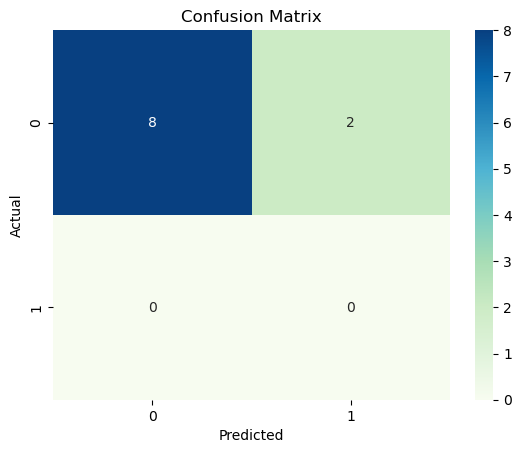

no. of iteration 100 Duration: 0:02:05.476071
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Confusion Matrix:
[[ 0  0]
 [ 0 10]]
sensitivity: 1.0
Specificity: nan


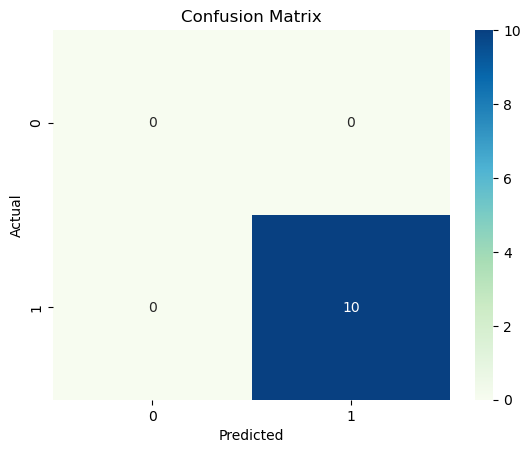

no. of iteration 110 Duration: 0:02:17.567902
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Confusion Matrix:
[[0 0]
 [1 9]]
sensitivity: 0.9
Specificity: nan


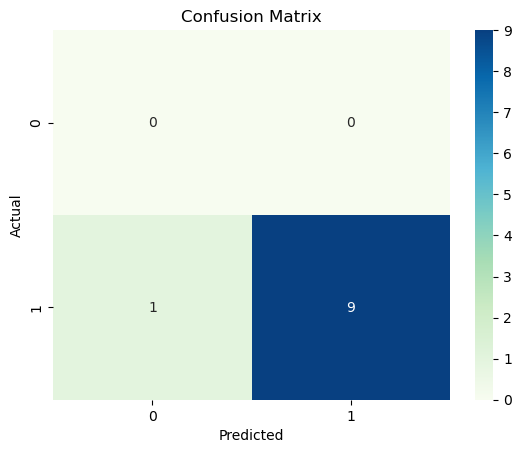

no. of iteration 120 Duration: 0:02:29.848942
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Confusion Matrix:
[[0 0]
 [1 9]]
sensitivity: 0.9
Specificity: nan


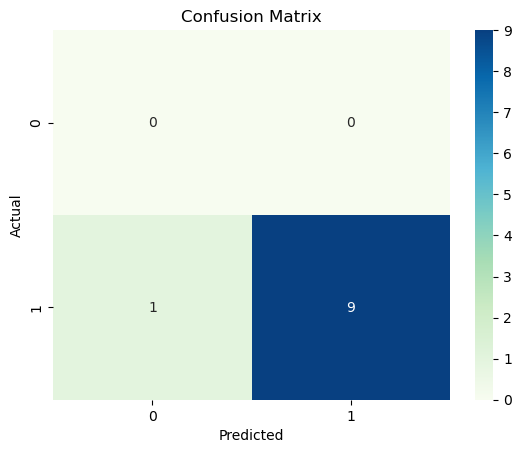

no. of iteration 130 Duration: 0:02:43.280554
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Confusion Matrix:
[[ 0  0]
 [ 0 10]]
sensitivity: 1.0
Specificity: nan


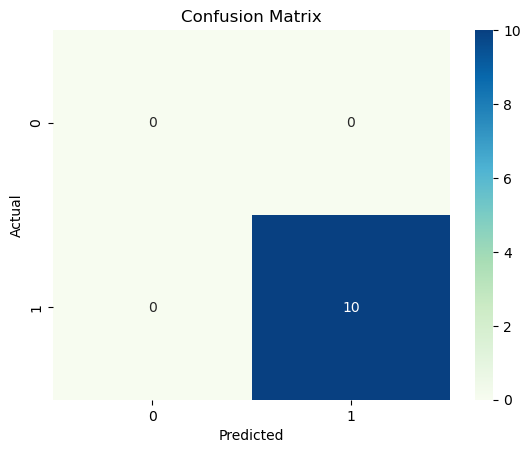

no. of iteration 140 Duration: 0:02:55.908669
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Confusion Matrix:
[[0 0]
 [2 8]]
sensitivity: 0.8
Specificity: nan


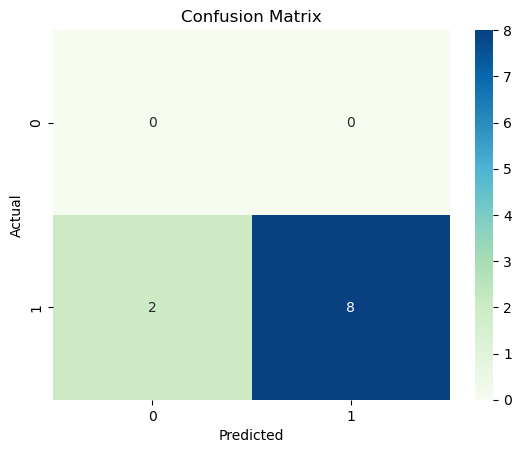

no. of iteration 150 Duration: 0:03:08.589061
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Confusion Matrix:
[[0 0]
 [2 8]]
sensitivity: 0.8
Specificity: nan


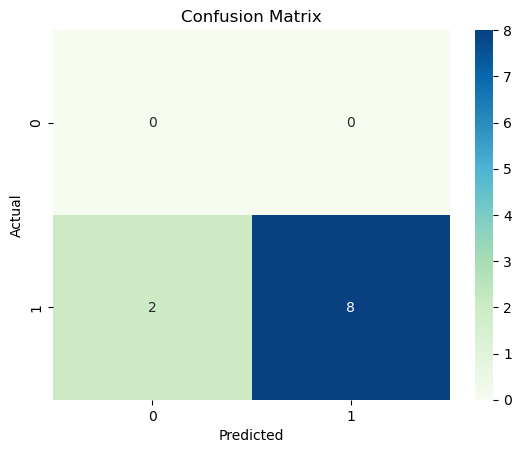

no. of iteration 160 Duration: 0:03:21.304860
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Confusion Matrix:
[[0 0]
 [1 9]]
sensitivity: 0.9
Specificity: nan


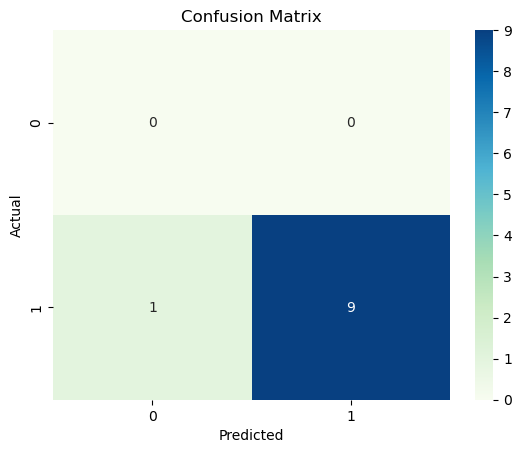

no. of iteration 170 Duration: 0:03:33.920513
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Confusion Matrix:
[[0 0]
 [2 8]]
sensitivity: 0.8
Specificity: nan


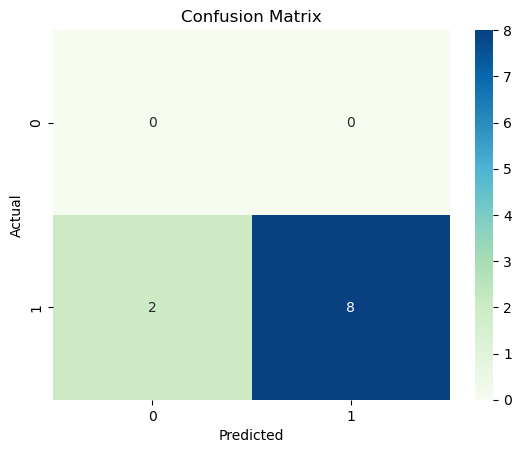

no. of iteration 180 Duration: 0:03:46.310643
Average regression score for the model for considering 50 percentile of the sorted feature set: 0.9000000000000001
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Confusion Matrix:
[[8 2]
 [0 0]]
sensitivity: nan
Specificity: 0.8


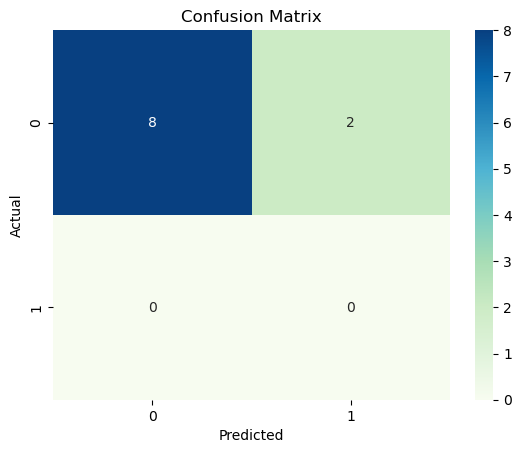

no. of iteration 10 Duration: 0:00:13.286972
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Confusion Matrix:
[[10  0]
 [ 0  0]]
sensitivity: nan
Specificity: 1.0


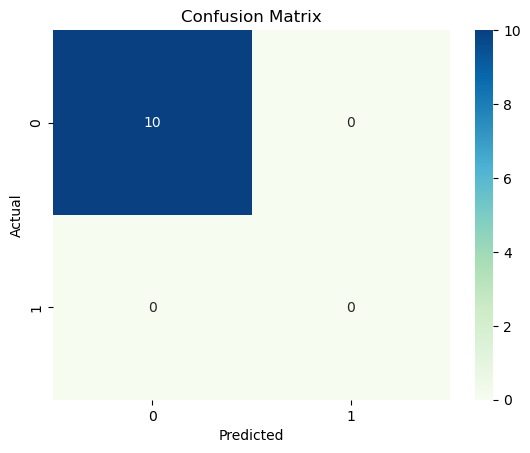

no. of iteration 20 Duration: 0:00:26.905221
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Confusion Matrix:
[[10  0]
 [ 0  0]]
sensitivity: nan
Specificity: 1.0


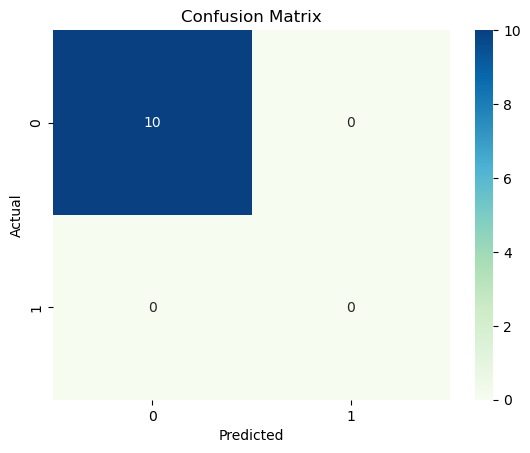

no. of iteration 30 Duration: 0:00:40.400958
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Confusion Matrix:
[[9 1]
 [0 0]]
sensitivity: nan
Specificity: 0.9


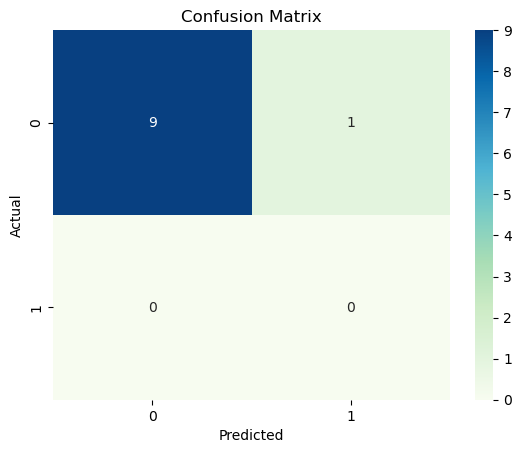

no. of iteration 40 Duration: 0:00:53.659526
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Confusion Matrix:
[[9 1]
 [0 0]]
sensitivity: nan
Specificity: 0.9


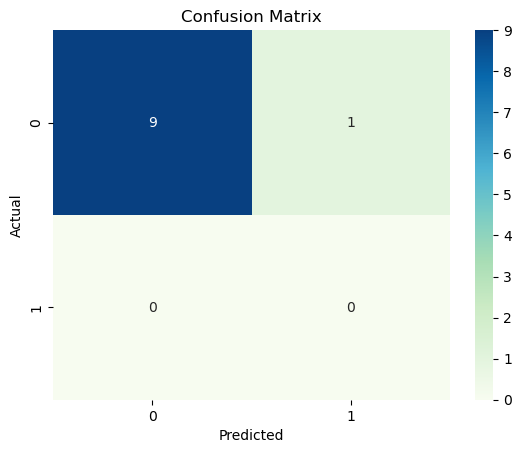

no. of iteration 50 Duration: 0:01:07.614710
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Confusion Matrix:
[[7 3]
 [0 0]]
sensitivity: nan
Specificity: 0.7


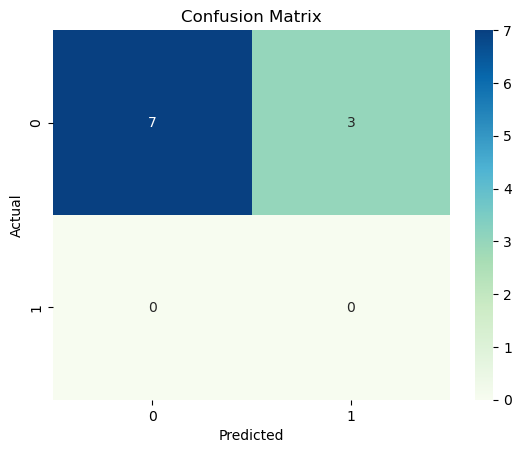

no. of iteration 60 Duration: 0:01:21.737712
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Confusion Matrix:
[[9 1]
 [0 0]]
sensitivity: nan
Specificity: 0.9


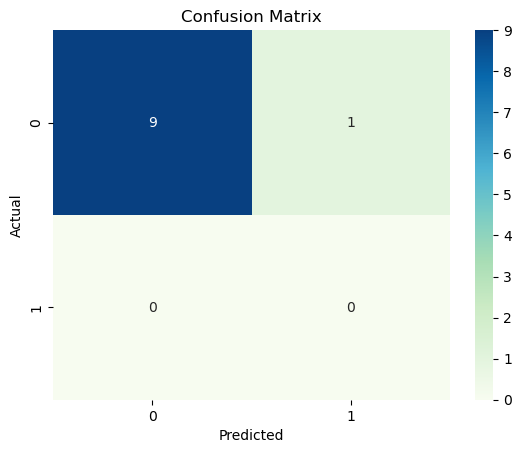

no. of iteration 70 Duration: 0:01:35.800449
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Confusion Matrix:
[[8 2]
 [0 0]]
sensitivity: nan
Specificity: 0.8


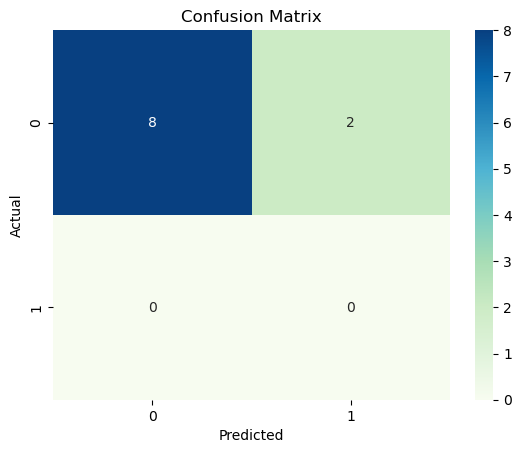

no. of iteration 80 Duration: 0:01:49.037073
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Confusion Matrix:
[[10  0]
 [ 0  0]]
sensitivity: nan
Specificity: 1.0


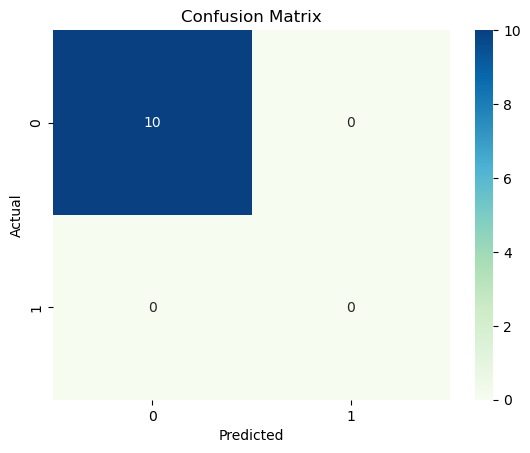

no. of iteration 90 Duration: 0:02:02.819553
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Confusion Matrix:
[[8 2]
 [0 0]]
sensitivity: nan
Specificity: 0.8


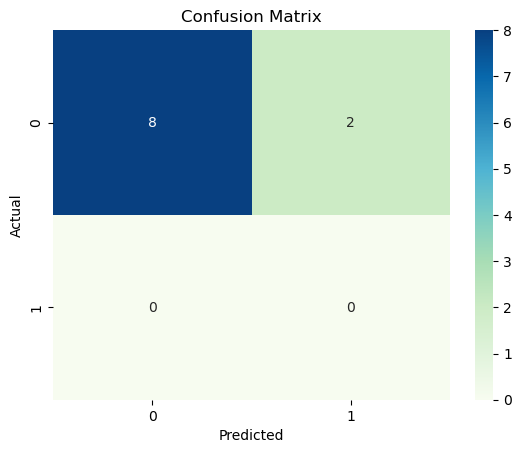

no. of iteration 100 Duration: 0:02:17.194921
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Confusion Matrix:
[[0 0]
 [2 8]]
sensitivity: 0.8
Specificity: nan


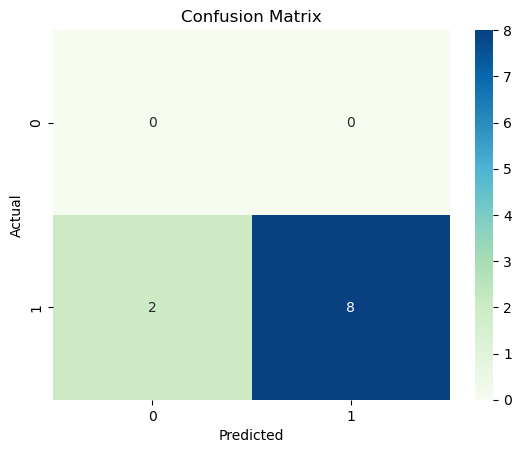

no. of iteration 110 Duration: 0:02:30.961719
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Confusion Matrix:
[[0 0]
 [1 9]]
sensitivity: 0.9
Specificity: nan


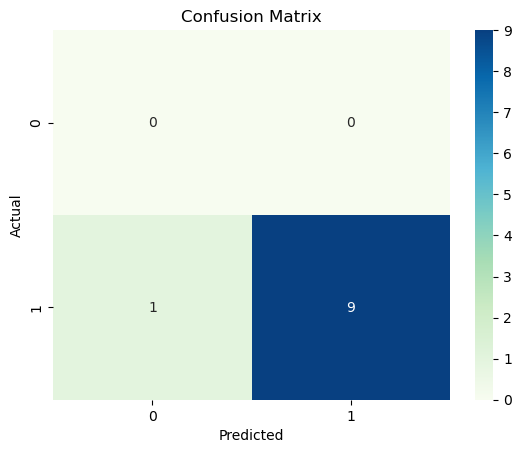

no. of iteration 120 Duration: 0:02:44.659823
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Confusion Matrix:
[[ 0  0]
 [ 0 10]]
sensitivity: 1.0
Specificity: nan


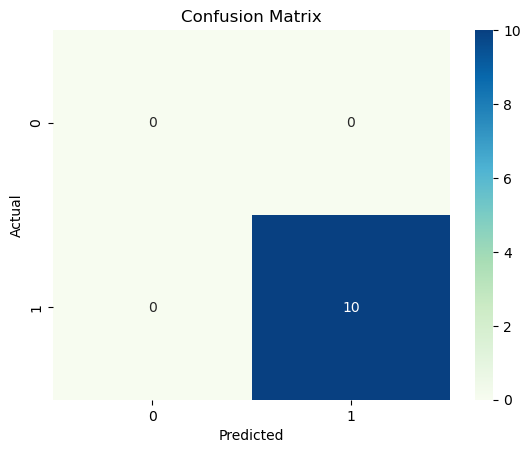

no. of iteration 130 Duration: 0:02:58.016743
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Confusion Matrix:
[[0 0]
 [1 9]]
sensitivity: 0.9
Specificity: nan


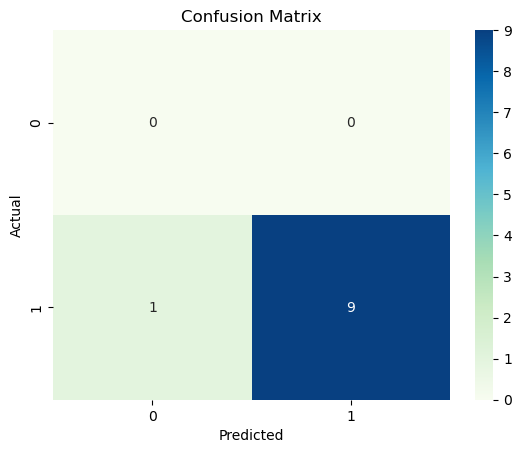

no. of iteration 140 Duration: 0:03:12.120945
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Confusion Matrix:
[[0 0]
 [1 9]]
sensitivity: 0.9
Specificity: nan


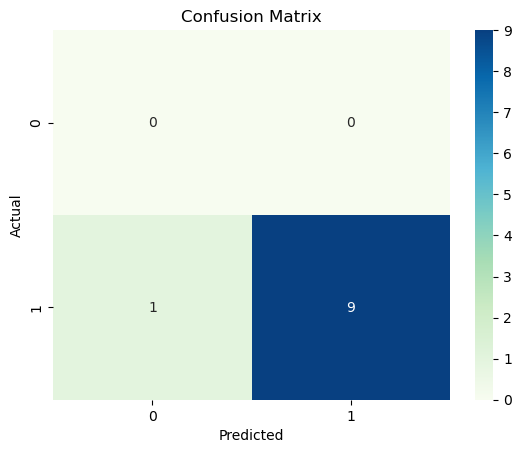

no. of iteration 150 Duration: 0:03:25.894648
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Confusion Matrix:
[[0 0]
 [2 8]]
sensitivity: 0.8
Specificity: nan


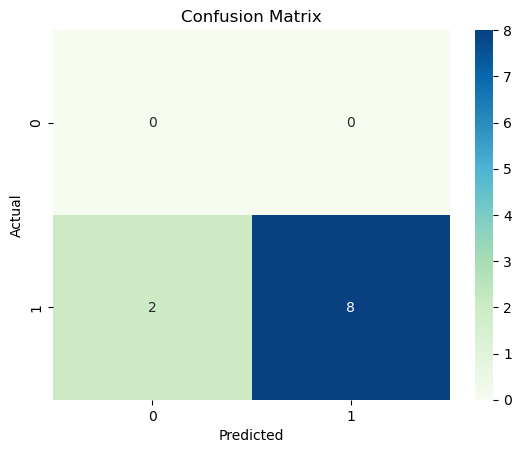

no. of iteration 160 Duration: 0:03:39.101969
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Confusion Matrix:
[[0 0]
 [1 9]]
sensitivity: 0.9
Specificity: nan


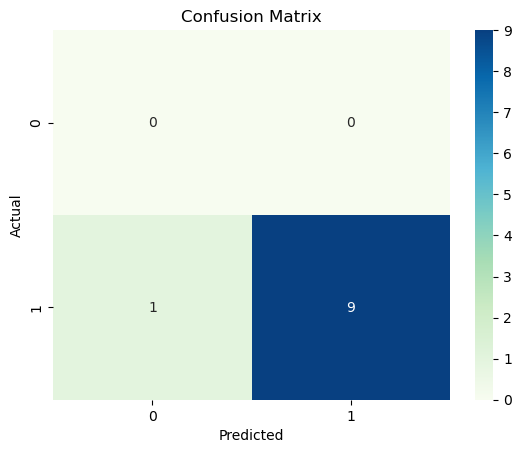

no. of iteration 170 Duration: 0:03:52.488581
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Confusion Matrix:
[[0 0]
 [3 7]]
sensitivity: 0.7
Specificity: nan


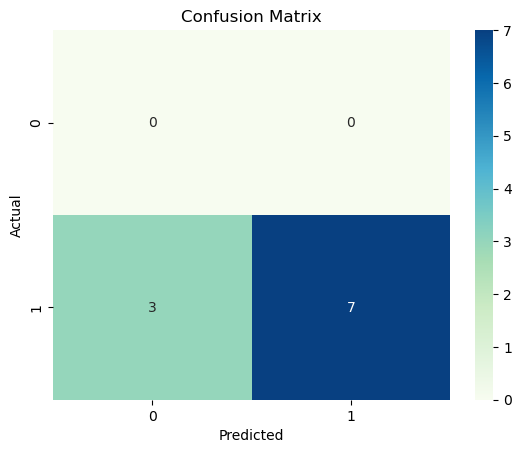

no. of iteration 180 Duration: 0:04:05.902195
Average regression score for the model for considering 55 percentile of the sorted feature set: 0.8722222222222223


<AxesSubplot:>

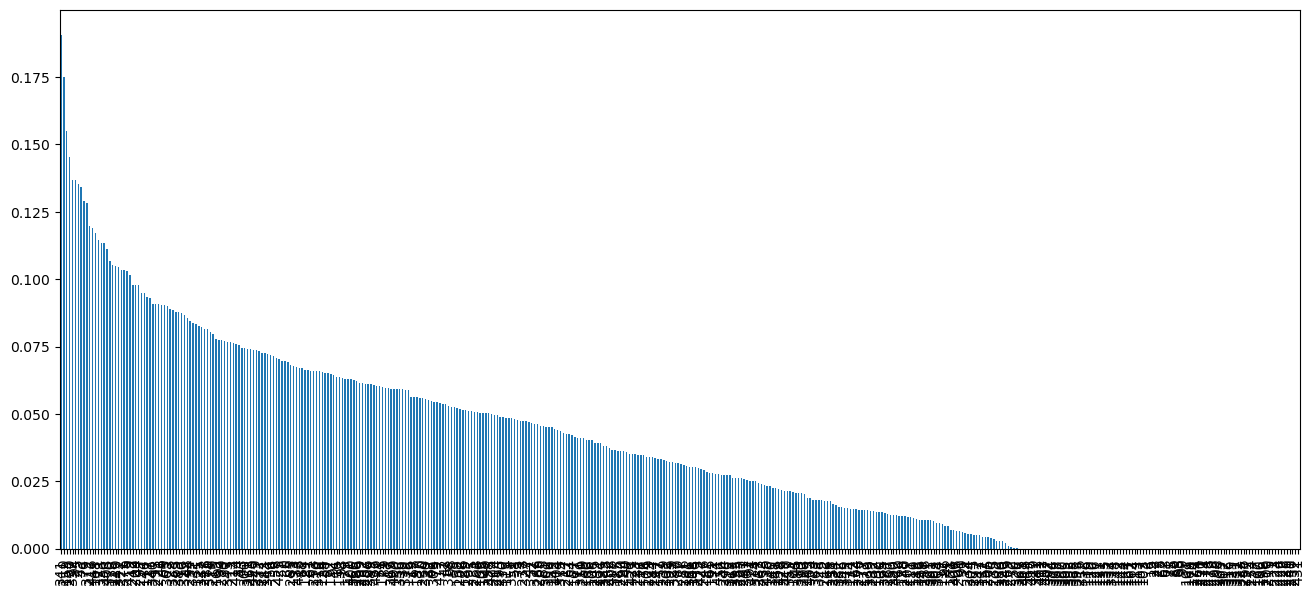

In [94]:
#This block of code reduces the number of features with the MI score and test it with a logistic regression model. 
#The accuracy, specificity and sensitivity are saved and compared. 

#Performance metric saved in array
average_accuracy_score_lr = 0
LR_accuracy_score = []
LR_specificity = []
LR_sensitivity = []

#This function run the SVM model with new reduced feature sets.
#The performance metric shown above is recorded and printed and put in the report. 
#We will use these performance metric to compare feature engineering method. 
def run_models(X_tr,X_te,y_tr,y_te,i):

        #Global variable that are saved
        global average_accuracy_score_lr, LR_accuracy_score, LR_specificity, LR_sensitivity
        
        #Hyper parameter train when tested the model
        param_grid_lr = [{'penalty' : ['l2'],#, 'elasticnet', 'none','l1',]
               'C' : np.logspace(-4, 4, 20),
               'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
                'max_iter' : [100, 1000]#,2500, 5000]
               }]

        #Model trained with CV to use the best hyper parameter
        grid_lr = GridSearchCV(LogisticRegression(),
                              param_grid_lr,verbose=True,n_jobs=-1)

        #Fit model and predict LR
        grid_lr.fit(X_tr,y_tr.values.ravel())
        y_pred_lr = grid_lr.predict(X_te)
        
        #The code below calculates the accuracy and the confusion matrix. 
        average_accuracy_score_lr = average_accuracy_score_lr + (accuracy_score(y_te,y_pred_lr))
        LR_accuracy_score.append(accuracy_score(y_te,y_pred_lr))
        #Calculate sensivity and specificity
        conf_matrix=confusion_matrix(y_te,y_pred_lr,labels=[0,1])
        sensitivity = conf_matrix[1,1]/(conf_matrix[1,0]+conf_matrix[1,1])
        specificity = conf_matrix[0,0]/(conf_matrix[0,0]+conf_matrix[0,1])
        #Save values as an array
        LR_sensitivity.append(sensitivity)
        LR_specificity.append(specificity)
        
        #Print and plot confusion matrix
        print("Confusion Matrix:")
        print(conf_matrix)
        print("sensitivity:", sensitivity)
        print("Specificity:", specificity)
        sns.heatmap(conf_matrix,cmap="GnBu",annot=True,
        #cbar_kws={"orientation":"vertical","label":"color bar"},
        xticklabels=[0,1],yticklabels=[0,1])
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.title("Confusion Matrix")
        plt.show()
                                 
accuracy_score_list_lr = []

#For loop used to apply CV with feature engineering. Score of each CV test are recorded in an array. 
for j in range(5,60,5):
    percentiles = j
    start_time = datetime.now()
    for i in range(0,X.shape[0],10):
    #For loop applied to allow for CV

        x_test_forcv = X[i:i+10]
        y_test_forcv = y[i:i+10]
        x_train_forcv = np.concatenate((X[:i],X[i+10:]),axis=0)
        y_train_forcv = np.concatenate((y[:i],y[i+10:]),axis=0)
        #print(i,x_test_forcv.shape,y_test_forcv.shape,x_train_forcv.shape,y_train_forcv.shape)
        X_train = pd.DataFrame(x_train_forcv)
        X_test = pd.DataFrame(x_test_forcv)
        y_test = pd.DataFrame(y_test_forcv)
        y_train = pd.DataFrame(y_train_forcv)
        #print(i,X_train.shape,y_train_forcv.shape,X_test.shape,y_test_forcv.shape)
        mi_score_lr= mutual_info_regression(x_train_forcv,y_train_forcv)
        mi_score_lr = pd.Series(mi_score_lr)
        mi_score_lr.sort_values(ascending=False,inplace=True)
        #Feature reduced with MI score
        sel = SelectPercentile(mutual_info_classif,percentile=percentiles).fit(X_train,y_train.values.ravel())
        X_train.columns[sel.get_support()]# extracting selected feature columns
        X_train_mi_personiout = sel.transform(X_train)
        X_test_mi_personiout = sel.transform(X_test)
        #LR with new reduced feature set
        run_models(X_train_mi_personiout,X_test_mi_personiout,y_train,y_test,i) 
        end_time = datetime.now()
        print('no. of iteration',i+10,'Duration: {}'.format(end_time - start_time))
    print('Average regression score for the model for considering',percentiles, 'percentile of the sorted feature set:',average_accuracy_score_lr/18)
    accuracy_score_list_lr.append(average_accuracy_score_lr/18)
    average_accuracy_score_lr = 0
#plot for last case only
mi_score.plot.bar(figsize = (16,7))




In [228]:
print(accuracy_score_list_lr)

[0.8222222222222222, 0.8666666666666667, 0.8000000000000003, 0.8777777777777779, 0.8777777777777778, 0.877777777777778, 0.8722222222222225, 0.8944444444444445, 0.8833333333333335, 0.8888888888888891, 0.877777777777778]


In [96]:
#Print the mean accuracy, standard deviation of the accuracy, mean sensivity and mean Specificity.
print("Accuracy score Mean:")
print(np.mean(LR_accuracy_score))
print("\n Accuracy score Sd:")
print(np.std(LR_accuracy_score))
print("\n Sensivitity score mean:")
print(np.nanmean(LR_sensitivity))
print("\n Specificity score mean:")
print(np.nanmean(LR_specificity))

Accuracy score Mean:
0.868686868686869

 Accuracy score Sd:
0.11559810617307249

 Sensivitity score mean:
0.859090909090909

 Specificity score mean:
0.8763636363636365


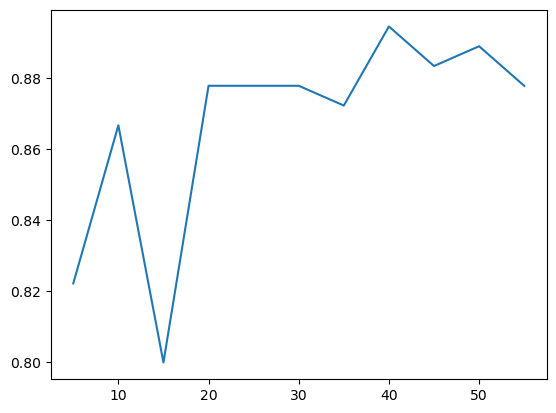

In [242]:
# average accuracy vs percentile of top feature (5 - 55) 
plt.plot(range(5,60,5),accuracy_score_list_lr)

